In [25]:
import json
import pandas as pd
df = pd.read_csv('../Data/PMN_20250605.csv')
df = df[df['abundance'] == 'Elevated'].reset_index(drop = True)

In [26]:
phylogenetic_levels = [
    "phylum",
    "class",
    "order",
    "family",
    "genus",
    "species"
]

In [27]:
for lvl in phylogenetic_levels:
    df.loc[:, lvl] = "na"

spec_dict = json.load(open('../specimens.json'))

for spec in df.spec_name.unique():
    if spec in list(spec_dict.keys()):
        for lvl in phylogenetic_levels:
            if lvl in spec_dict[spec].keys():
                df.loc[df['spec_name'] == spec, lvl] = spec_dict[spec][lvl]

In [28]:
mask = (df["spec_name"] == "Centric Diatom") | (df["phylum"] == "Cyanobacteria")
df = df[mask].reset_index(drop=True)
df

latitude   longitude                   datetime  \
0    45.344840  -91.647710  2010-07-01 00:00:00+00:00   
1    45.344840  -91.647710  2010-07-01 00:00:00+00:00   
2    45.344840  -91.647710  2010-07-01 05:30:40+00:00   
3    45.344840  -91.647710  2010-07-01 05:30:40+00:00   
4    45.344840  -91.647710  2010-07-01 09:29:36+00:00   
..         ...         ...                        ...   
427  26.620800  -81.929500  2018-10-29 09:25:00+00:00   
428  26.620800  -81.929500  2018-11-06 08:50:00+00:00   
429  26.620800  -81.929500  2018-11-12 09:00:00+00:00   
430  43.560696 -116.661273  2018-11-28 10:45:00+00:00   
431  26.620800  -81.929500  2019-07-16 08:45:00+00:00   

                  sample_site           spec_name abundance  water_temp  \
0        WI - Pokegama Lake 2   Oscillatoria spp.  Elevated        23.0   
1        WI - Pokegama Lake 2    Microcystis spp.  Elevated        23.0   
2        WI - Pokegama Lake 2    Microcystis spp.  Elevated        23.0   
3        WI - Pokegama Lake 2   Oscillatoria spp.  Elevated        23.0   
4        WI - Pokegama Lake 2    Microcystis spp.  Elevated        23.0   
..                        ...                 ...       ...         ...   
427       FL - Caloosahatchee      Centric Diatom  Elevated        23.0   
428       FL - Caloosahatchee      Centric Diatom  Elevated        25.0   
429       FL - Caloosahatchee      Centric Diatom  Elevated        26.0   
430  ID - Upper Dam West Dock  Aphanizomenon spp.  Elevated         8.0   
431       FL - Caloosahatchee      Centric Diatom  Elevated        30.0   

     air_temp  salinity                                           comments  \
0         0.0       0.0                                                NaN   
1         0.0       0.0                                                NaN   
2         NaN       NaN                                                NaN   
3         NaN       NaN                                                NaN   
4         NaN       NaN                                                NaN   
..        ...       ...                                                ...   
427      20.0       0.0  Surface bloom of diatoms (Melosira) with water...   
428      26.0       0.0  Diatom bloom still occurring with extremely hi...   
429      31.0       0.0  Visible diatom bloom has greatly decreased but...   
430       4.0       0.0                                                NaN   
431      29.0       0.0  Salinity down to 2 ppt; well into wet, rainy s...   

     ... QA_dissoxygen QA_sample_site  QA_latitude QA_longitude  \
0    ...             1              1            1            1   
1    ...             1              1            1            1   
2    ...             9              1            1            1   
3    ...             9              1            1            1   
4    ...             9              1            1            1   
..   ...           ...            ...          ...          ...   
427  ...             9              1            1            1   
428  ...             9              1            1            1   
429  ...             9              1            1            1   
430  ...             9              1            1            1   
431  ...             9              1            1            1   

            phylum              class            order              family  \
0    Cyanobacteria       Cyanophyceae  Oscillatoriales    Oscillatoriaceae   
1    Cyanobacteria       Cyanophyceae    Chroococcales      Microcystaceae   
2    Cyanobacteria       Cyanophyceae    Chroococcales      Microcystaceae   
3    Cyanobacteria       Cyanophyceae  Oscillatoriales    Oscillatoriaceae   
4    Cyanobacteria       Cyanophyceae    Chroococcales      Microcystaceae   
..             ...                ...              ...                 ...   
427        Gyrista  Bacillariophyceae        Centrales                  na   
428        Gyrista  Bacillariophyceae        Centrales

In [21]:
df.to_csv('../PMN.csv')

In [ ]:
# %% [markdown]
# ## Inspect QA / Mask Variables in Satellite Granules
# Modify the `sample_files` dict below with actual paths to one or more granule files 
# for each sensor. Then run the inspection to list data variables and attributes.

# %%
import xarray as xr
import os

# Replace these with actual local file paths for each sensor type.
# E.g., you might have downloaded a MODIS granule to "../Data/MODIS_file.nc"
sample_files = {
    "MODISA_L2_OC": [
        "../Data/AQUA_MODIS.20240601T192000.L2.OC.nc"
    ],
    "MODIST_L2_OC": [
        # ...
    ],
    "OLCIS3A_L2_EFR_OC": [
        "../Data/S3A_OLCI_EFRNT.20240602T160846.L2.OC.nc"
    ],
    "OLCIS3B_L2_EFR_OC": [
        # ...
    ],
    "PACE_OCI_L2_AOP": [
        "../Data/PACE_OCI.20240601T165222.L2.OC_AOP.V3_0.nc"
    ]
}

def inspect_granule(path):
    """
    Open the granule and list groups and data variables in key groups.
    """
    print(f"\n=== Inspecting: {path} ===")
    if not os.path.exists(path):
        print("  -> File not found. Please check the path.")
        return

    try:
        ds = xr.open_dataset(path, engine="netcdf4", decode_coords="all", decode_times=False)
        # List top-level groups or variables
        print("Top-level variables / groups:")
        for k in ds.data_vars:
            print(f"  - {k} (dims: {ds[k].dims})")
        for coord in ds.coords:
            print(f"  - coord: {coord} (dims: {ds.coords[coord].dims})")
        ds.close()
    except Exception as e:
        print(f"  Failed to open top-level: {e}")

    # Common groups: navigation_data, geophysical_data, sensor_band_parameters, etc.
    groups = ["navigation_data", "geophysical_data", "sensor_band_parameters", "quality_flags", "ancillary_data"]
    for grp in groups:
        try:
            dsg = xr.open_dataset(path, group=grp)
            print(f"\nGroup '{grp}' variables:")
            for var in dsg.data_vars:
                print(f"  - {var} (dims: {dsg[var].dims})")
                # print attributes for hint on usage
                attrs = dsg[var].attrs
                if attrs:
                    print(f"      attrs: { {k: attrs[k] for k in list(attrs)[:3]} } ...")
            dsg.close()
        except Exception as e:
            # group may not exist or open may fail
            #print(f"  Cannot open group '{grp}': {e}")
            pass

    # If there is a general 'quality_flags' variable in geophysical_data, inspect its attrs
    try:
        with xr.open_dataset(path, group="geophysical_data") as dg:
            qnames = [v for v in dg.data_vars if "quality" in v.lower() or "flag" in v.lower()]
            if qnames:
                print("\nPotential QA/flag variables in geophysical_data:")
                for q in qnames:
                    print(f"  - {q}: attrs = {dg[q].attrs}")
            else:
                print("\nNo obvious QA/flag variables found in geophysical_data (check manually).")
    except Exception:
        pass

# %%
# Run inspection for each sensor and sample file
for sensor, paths in sample_files.items():
    print(f"\n##### Sensor: {sensor} #####")
    if not paths:
        print("  (No sample paths provided. Please fill in sample_files.)")
    for p in paths:
        inspect_granule(p)


In [ ]:
# Inspect and Decode l2_flags for QA Masking in Granules (No Markdown Fences)

import xarray as xr
import numpy as np
import os

# Replace with actual sample file paths per sensor
sample_paths = {
    "MODISA_L2_OC": ["../Data/AQUA_MODIS.20240601T192000.L2.OC.nc"],
    "OLCIS3A_L2_EFR_OC": ["../Data/S3A_OLCI_EFRNT.20240602T160846.L2.OC.nc"],
    "PACE_OCI_L2_AOP": ["../Data/PACE_OCI.20240601T165222.L2.OC_AOP.V3_0.nc"]
}

def inspect_and_decode_flags(path, group="geophysical_data"):
    """
    Inspect l2_flags in the given granule, extract flag_masks and meanings,
    and return a dict mapping flag name -> mask (boolean array where flag is set).
    """
    if not os.path.exists(path):
        print(f"File not found: {path}")
        return None
    
    try:
        with xr.open_dataset(path, group=group) as ds:
            if "l2_flags" not in ds:
                print(f"No 'l2_flags' in {group} for {path}")
                return None
            flags = ds["l2_flags"].values
            attrs = ds["l2_flags"].attrs
            flag_masks = attrs.get("flag_masks", None)
            flag_meanings = attrs.get("flag_meanings", None)
            if flag_masks is None or flag_meanings is None:
                print("No flag_masks or flag_meanings in attributes.")
                return None
            
            meanings = flag_meanings.split()
            if len(meanings) != len(flag_masks):
                print("Warning: number of meanings does not match number of masks.")
            
            flag_dict = {}
            for mask, name in zip(flag_masks, meanings):
                mask_uint = np.uint32(mask)
                flag_mask_arr = (flags & mask_uint) != 0
                flag_dict[name] = flag_mask_arr
            return flag_dict
    except Exception as e:
        print(f"Error opening {path}: {e}")
        return None

# Inspect sample granules
for sensor, paths in sample_paths.items():
    for p in paths:
        print(f"\n--- Sensor: {sensor}, Granule: {p} ---")
        flag_dict = inspect_and_decode_flags(p)
        if flag_dict is None:
            continue
        for name, mask_arr in flag_dict.items():
            count = np.sum(mask_arr)
            print(f"Flag '{name}': {count} pixels set")
        undesired = [
            "ATMFAIL",
            "ATMWARN",
            "LAND",
            "CLDICE",
            "SEAICE",
            "STRAYLIGHT",
            "NAVWARN",
            "NAVFAIL",
            "PRODFAIL",
            "PRODWARN",
            "HISOLZEN",
            "HILT",
            "FILTER",
            "BOWTIEDEL",
            "HIPOL"
        ]
        valid_mask = np.ones_like(next(iter(flag_dict.values())), dtype=bool)
        for name in undesired:
            if name in flag_dict:
                valid_mask &= ~flag_dict[name]
        print(f"After excluding {undesired}, valid pixels: {np.sum(valid_mask)} / {valid_mask.size}")

def get_valid_mask(flags_array, flag_masks, flag_meanings, undesired_flags):
    """
    flags_array: numpy array of l2_flags
    flag_masks: array of integer bit masks from attributes
    flag_meanings: space-separated string of flag names
    undesired_flags: list of flag names to exclude
    Returns: boolean array where True = valid pixel (none of undesired flags set)
    """
    meanings = flag_meanings.split()
    valid = np.ones_like(flags_array, dtype=bool)
    for mask, name in zip(flag_masks, meanings):
        if name in undesired_flags:
            mask_uint = np.uint32(mask)
            valid &= (flags_array & mask_uint) == 0
    return valid

# Example integration snippet (illustrative):
# with xr.open_dataset(path, group="geophysical_data") as ds:
#     band = ds[var_name].values
#     flags = ds["l2_flags"].values
#     flag_masks = ds["l2_flags"].attrs["flag_masks"]
#     flag_meanings = ds["l2_flags"].attrs["flag_meanings"]
#     undesired = ["LAND", "CLDICE", "HIGLINT", "SEAICE", "ATMFAIL", "NAVWARN"]
#     qa_mask = get_valid_mask(flags, flag_masks, flag_meanings, undesired)
#     overall_mask = (
#         qa_mask
#         & np.isfinite(band)
#         & (lat >= bbox[1]) & (lat <= bbox[3])
#         & (lon >= bbox[0]) & (lon <= bbox[2])
#     )
#     # proceed with lat_valid = lat[overall_mask], etc.

print("Inspection and helper functions loaded. Update sample_paths and run to inspect granules.")



In [ ]:
# Testing QA Mask Application in process_granule_modis

# This Jupyter snippet compares pixel counts before and after QA masking for a MODIS granule.
# Update `granule_path` to point to an actual MODIS granule file you have locally.

import xarray as xr
import numpy as np
import os

# --- Helper: original process_granule_modis without QA mask ---
def process_granule_modis_noqa(path, wave_modis, lat_bins, lon_bins, cache_dir, bbox):
    """
    Simplified version: same as original but without QA masking.
    """
    base = os.path.basename(path)
    bbox_str = "_".join(f"{coord:.5f}" for coord in bbox)
    cache_file = os.path.join(cache_dir, f"{base}_noqa_{bbox_str}.npz")
    if os.path.exists(cache_file):
        return cache_file

    try:
        with xr.open_dataset(path, group="navigation_data") as nav:
            lat = nav["latitude"].values
            lon = nav["longitude"].values

        with xr.open_dataset(path, group="geophysical_data") as rrs_ds:
            lat_idx_list = []
            lon_idx_list = []
            ch_idx_list = []
            val_list = []
            for ch_idx, wl in enumerate(wave_modis):
                var_name = f"Rrs_{int(round(wl))}"
                if var_name not in rrs_ds:
                    continue
                band = rrs_ds[var_name].values
                mask = (
                    np.isfinite(band)
                    & (lat >= bbox[1]) & (lat <= bbox[3])
                    & (lon >= bbox[0]) & (lon <= bbox[2])
                )
                if not np.any(mask):
                    continue
                lat_valid = lat[mask]
                lon_valid = lon[mask]
                val_valid = band[mask]
                lat_idx = np.searchsorted(lat_bins, lat_valid) - 1
                lon_idx = np.searchsorted(lon_bins, lon_valid) - 1
                lat_idx_list.extend(lat_idx.tolist())
                lon_idx_list.extend(lon_idx.tolist())
                ch_idx_list.extend([ch_idx] * len(val_valid))
                val_list.extend(val_valid.tolist())
        np.savez_compressed(
            cache_file,
            lat_idx=np.array(lat_idx_list, dtype=np.int16),
            lon_idx=np.array(lon_idx_list, dtype=np.int16),
            ch_idx=np.array(ch_idx_list, dtype=np.int16),
            val=np.array(val_list, dtype=np.float32),
        )
        return cache_file
    except Exception as e:
        print(f"Error in process_granule_modis_noqa: {e}")
        return None

# --- Helper: updated process_granule_modis with QA mask (assumes you have this defined) ---
# Copy or import your updated function here.
def process_granule_modis_withqa(path, wave_modis, lat_bins, lon_bins, cache_dir, bbox):
    """
    Updated version applying QA mask; insert your updated function here.
    """
    base = os.path.basename(path)
    bbox_str = "_".join(f"{coord:.5f}" for coord in bbox)
    cache_file = os.path.join(cache_dir, f"{base}_qa_{bbox_str}.npz")
    if os.path.exists(cache_file):
        return cache_file

    try:
        with xr.open_dataset(path, group="navigation_data") as nav:
            lat = nav["latitude"].values
            lon = nav["longitude"].values

        with xr.open_dataset(path, group="geophysical_data") as rrs_ds:
            # Prepare QA masks
            if "l2_flags" in rrs_ds:
                flags = rrs_ds["l2_flags"].values
                flag_masks = rrs_ds["l2_flags"].attrs.get("flag_masks", None)
                flag_meanings = rrs_ds["l2_flags"].attrs.get("flag_meanings", "")
                if flag_masks is not None:
                    names = flag_meanings.split()
                    mask_map = {name: np.uint32(m) for name, m in zip(names, flag_masks)}
                else:
                    mask_map = {}
            else:
                flags = None
                mask_map = {}

            # Define undesired flags
            undesired = [
                "LAND", "CLDICE", "HIGLINT", "MODGLINT",
                "STRAYLIGHT", "ATMFAIL", "ATMWARN", "NAVFAIL", "NAVWARN",
                "SEAICE", "HISOLZEN", "HISATZEN", "COASTZ", "ABSAER",
                "MAXAERITER", "FILTER", "BOWTIEDEL", "HIPOL", "PRODFAIL", "PRODWARN"
            ]

            lat_idx_list = []
            lon_idx_list = []
            ch_idx_list = []
            val_list = []

            for ch_idx, wl in enumerate(wave_modis):
                var_name = f"Rrs_{int(round(wl))}"
                if var_name not in rrs_ds:
                    continue
                band = rrs_ds[var_name].values
                mask = (
                    np.isfinite(band)
                    & (lat >= bbox[1]) & (lat <= bbox[3])
                    & (lon >= bbox[0]) & (lon <= bbox[2])
                )
                if flags is not None and mask_map:
                    qa_mask = np.ones_like(band, dtype=bool)
                    for name in undesired:
                        if name in mask_map:
                            qa_mask &= (flags & mask_map[name]) == 0
                    mask &= qa_mask
                if not np.any(mask):
                    continue
                lat_valid = lat[mask]
                lon_valid = lon[mask]
                val_valid = band[mask]
                lat_idx = np.searchsorted(lat_bins, lat_valid) - 1
                lon_idx = np.searchsorted(lon_bins, lon_valid) - 1
                lat_idx_list.extend(lat_idx.tolist())
                lon_idx_list.extend(lon_idx.tolist())
                ch_idx_list.extend([ch_idx] * len(val_valid))
                val_list.extend(val_valid.tolist())
        np.savez_compressed(
            cache_file,
            lat_idx=np.array(lat_idx_list, dtype=np.int16),
            lon_idx=np.array(lon_idx_list, dtype=np.int16),
            ch_idx=np.array(ch_idx_list, dtype=np.int16),
            val=np.array(val_list, dtype=np.float32),
        )
        return cache_file
    except Exception as e:
        print(f"Error in process_granule_modis_withqa: {e}")
        return None

# --- Test snippet ---
granule_path = "../Data/AQUA_MODIS.20240603T190001.L2.OC.nc"  # UPDATE this path
if not os.path.exists(granule_path):
    print("Please set granule_path to a real file.")
else:
    # Open navigation to derive bbox
    with xr.open_dataset(granule_path, group="navigation_data") as nav:
        lat = nav["latitude"].values
        lon = nav["longitude"].values
    # Define bbox as min/max extent (for testing)
    bbox = (float(np.nanmin(lon)), float(np.nanmin(lat)), float(np.nanmax(lon)), float(np.nanmax(lat)))
    # Define resolution and bins
    resolution = 0.001  # e.g., 0.01 degrees for testing
    lat_bins = np.arange(bbox[1], bbox[3] + resolution, resolution)
    lon_bins = np.arange(bbox[0], bbox[2] + resolution, resolution)

    # Retrieve wave_modis: use get_reference_wavelengths or known array
    # For testing, open granule to extract wavelengths:
    with xr.open_dataset(granule_path, group="sensor_band_parameters") as ds:
        wave_modis = ds["wavelength"].values  # or "wavelength_3d" if needed
    wave_modis = np.array(wave_modis)

    # Ensure cache directory exists
    cache_dir = "./test_cache"
    os.makedirs(cache_dir, exist_ok=True)

    # Run without QA
    cache_noqa = process_granule_modis_noqa(granule_path, wave_modis, lat_bins, lon_bins, cache_dir, bbox)
    # Run with QA
    cache_qa = process_granule_modis_withqa(granule_path, wave_modis, lat_bins, lon_bins, cache_dir, bbox)

    # Load caches and compare
    if cache_noqa and cache_qa:
        data_noqa = np.load(cache_noqa)
        data_qa = np.load(cache_qa)
        counts_noqa = len(data_noqa["val"])
        counts_qa = len(data_qa["val"])
        print(f"Total valid samples (no QA): {counts_noqa}")
        print(f"Total valid samples (with QA): {counts_qa}")
        # Optionally examine per-band counts
        # Build per-band counts
        import collections
        band_counts_noqa = collections.Counter(data_noqa["ch_idx"])
        band_counts_qa = collections.Counter(data_qa["ch_idx"])
        print("Per-band counts (no QA):", band_counts_noqa)
        print("Per-band counts (with QA):", band_counts_qa)

        # Optionally visualize spatial distribution of retained vs dropped:
        # Create 2D grid count arrays
        nlat = len(lat_bins)-1
        nlon = len(lon_bins)-1
        grid_noqa = np.zeros((nlat, nlon), dtype=int)
        grid_qa = np.zeros((nlat, nlon), dtype=int)
        for li, lj in zip(data_noqa["lat_idx"], data_noqa["lon_idx"]):
            if 0 <= li < nlat and 0 <= lj < nlon:
                grid_noqa[li, lj] += 1
        for li, lj in zip(data_qa["lat_idx"], data_qa["lon_idx"]):
            if 0 <= li < nlat and 0 <= lj < nlon:
                grid_qa[li, lj] += 1
        # Show simple stats
        print("Grid cells with any data (no QA):", np.sum(grid_noqa>0))
        print("Grid cells with any data (with QA):", np.sum(grid_qa>0))
    else:
        print("Failed to generate cache files for comparison. Check errors above.")



In [ ]:
import xarray as xr
import numpy as np

granule_path = "../Data/PACE_OCI.20240602T190528.L2.OC_AOP.V3_0.nc"  # set correctly
# Open navigation_data
ds_nav = xr.open_dataset(granule_path, group="navigation_data")
lat = ds_nav["latitude"].values
lon = ds_nav["longitude"].values
print("lat shape:", lat.shape, "lon shape:", lon.shape)
print("lat min/max:", np.nanmin(lat), np.nanmax(lat))
print("lon min/max:", np.nanmin(lon), np.nanmax(lon))
ds_nav.close()


In [ ]:
import xarray as xr
import numpy as np

# Open geophysical_data and list Rrs variables
with xr.open_dataset(granule_path, group="geophysical_data") as ds_geo:
    bands = [v for v in ds_geo.data_vars if v.lower().startswith("rrs_")]
    print("Available Rrs bands:", bands)
    # For each band, count finite pixels
    for var in bands:
        band = ds_geo[var].values
        finite = np.isfinite(band)
        print(f"{var}: total pixels = {band.size}, finite = {np.sum(finite)}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Example: Plot retention given ndarray_all and metadata ---
# Assumes ndarray_all: shape (n_days, nlat, nlon, n_bands)
# and metadata["date_list"]: list of date strings matching axis 0 of ndarray_all.

# Replace these with your actual variables if different.
# For demonstration, check existence:
try:
    ndarray_all  # noqa: F821
    metadata     # noqa: F821
except NameError:
    print("Please ensure you have 'ndarray_all' and 'metadata' from aggregate_sensors.")
else:
    # Compute daily retention: fraction of spatial cells with any valid band
    n_days = ndarray_all.shape[0]
    retention = np.zeros(n_days, dtype=float)
    for i in range(n_days):
        arr = ndarray_all[i]  # shape (nlat, nlon, n_bands)
        valid_any = np.any(~np.isnan(arr), axis=-1)  # shape (nlat, nlon)
        retention[i] = np.sum(valid_any) / valid_any.size

    # Parse dates
    date_strs = metadata.get("date_list", [])
    if len(date_strs) != n_days:
        print("Warning: metadata['date_list'] length does not match ndarray_all time dimension.")
    dates = pd.to_datetime(date_strs)

    # Plot
    plt.figure()
    plt.plot(dates, retention)
    plt.xlabel("Date")
    plt.ylabel("Retention fraction")
    plt.title("Daily Pixel Retention")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [1]:
import os
print(os.path.getsize("../Data/AQUA_MODIS.20100727T200500.L2.OC.nc"))

25713296


In [6]:
from netCDF4 import Dataset

path = "../Data/AQUA_MODIS.20100727T200500.L2.OC.nc"
ds = Dataset(path, "r")

print(ds.groups.keys())  # Some files nest everything inside a group like 'geophysical_data'

# Recursively print all variables
def print_vars(group, prefix=""):
    for var in group.variables:
        print(f"{prefix}{var} shape={group.variables[var].shape}")
    for subgroup in group.groups:
        print_vars(group.groups[subgroup], prefix + subgroup + "/")

print_vars(ds)


dict_keys(['sensor_band_parameters', 'scan_line_attributes', 'geophysical_data', 'navigation_data', 'processing_control'])
sensor_band_parameters/wavelength shape=(24,)
sensor_band_parameters/vcal_gain shape=(16,)
sensor_band_parameters/vcal_offset shape=(16,)
sensor_band_parameters/F0 shape=(16,)
sensor_band_parameters/aw shape=(16,)
sensor_band_parameters/bbw shape=(16,)
sensor_band_parameters/k_oz shape=(16,)
sensor_band_parameters/k_no2 shape=(16,)
sensor_band_parameters/Tau_r shape=(16,)
scan_line_attributes/year shape=(2030,)
scan_line_attributes/day shape=(2030,)
scan_line_attributes/msec shape=(2030,)
scan_line_attributes/detnum shape=(2030,)
scan_line_attributes/mside shape=(2030,)
scan_line_attributes/slon shape=(2030,)
scan_line_attributes/clon shape=(2030,)
scan_line_attributes/elon shape=(2030,)
scan_line_attributes/slat shape=(2030,)
scan_line_attributes/clat shape=(2030,)
scan_line_attributes/elat shape=(2030,)
scan_line_attributes/csol_z shape=(2030,)
geophysical_data/a

In [7]:
from netCDF4 import Dataset

path = "../Data/S3A_OLCI_EFRNT.20181021T154828.L2.OC.nc"  # replace this with a valid file path
ds = Dataset(path, "r")

# Print top-level variables and groups
print("Top-level variables:", ds.variables.keys())
print("Groups:", ds.groups.keys())

# Optionally check variable shapes in main group
for key in ds.variables:
    print(f"{key}: {ds.variables[key].shape}")


Top-level variables: dict_keys([])
Groups: dict_keys(['sensor_band_parameters', 'scan_line_attributes', 'geophysical_data', 'navigation_data', 'processing_control'])


In [8]:
for grp_name, grp in ds.groups.items():
    print(f"\nGroup: {grp_name}")
    for var_name, var in grp.variables.items():
        print(f"  {var_name}: {var.shape}")



Group: sensor_band_parameters
  wavelength: (21,)
  vcal_gain: (21,)
  vcal_offset: (21,)
  F0: (21,)
  aw: (21,)
  bbw: (21,)
  k_oz: (21,)
  k_no2: (21,)
  Tau_r: (21,)

Group: scan_line_attributes
  year: (4091,)
  day: (4091,)
  msec: (4091,)
  detnum: (4091,)
  mside: (4091,)
  slon: (4091,)
  clon: (4091,)
  elon: (4091,)
  slat: (4091,)
  clat: (4091,)
  elat: (4091,)
  csol_z: (4091,)

Group: geophysical_data
  aot_865: (4091, 4865)
  angstrom: (4091, 4865)
  Rrs_400: (4091, 4865)
  Rrs_412: (4091, 4865)
  Rrs_443: (4091, 4865)
  Rrs_490: (4091, 4865)
  Rrs_510: (4091, 4865)
  Rrs_560: (4091, 4865)
  Rrs_620: (4091, 4865)
  Rrs_665: (4091, 4865)
  Rrs_674: (4091, 4865)
  Rrs_681: (4091, 4865)
  Rrs_709: (4091, 4865)
  chlor_a: (4091, 4865)
  Kd_490: (4091, 4865)
  l2_flags: (4091, 4865)

Group: navigation_data
  longitude: (4091, 4865)
  latitude: (4091, 4865)
  cntl_pt_cols: (4865,)
  cntl_pt_rows: (4091,)
  tilt: (4091,)

Group: processing_control


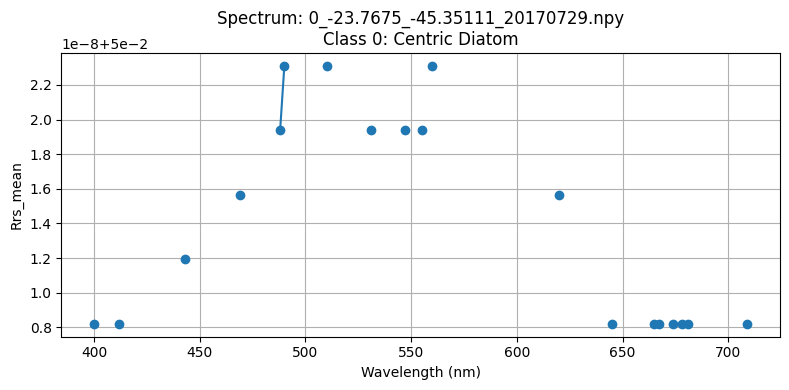

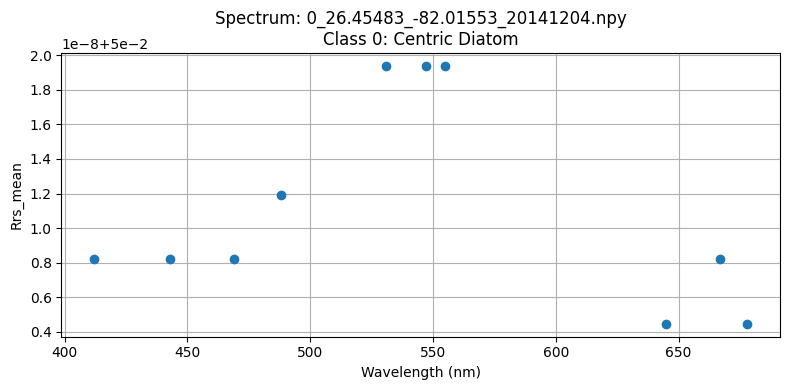

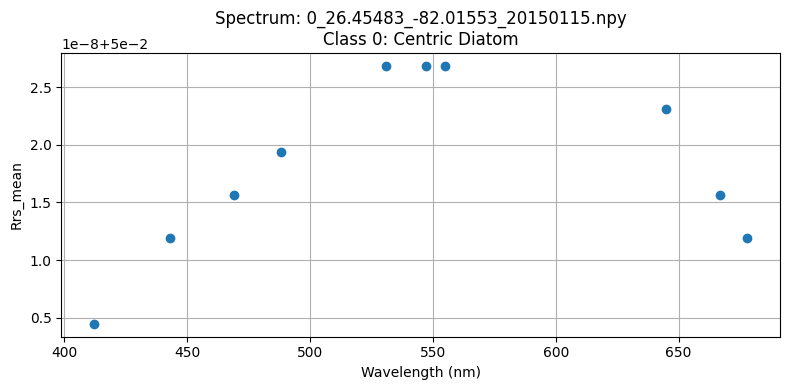

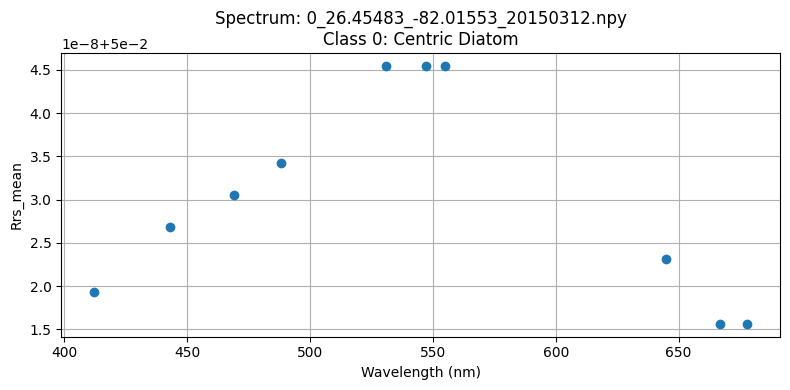

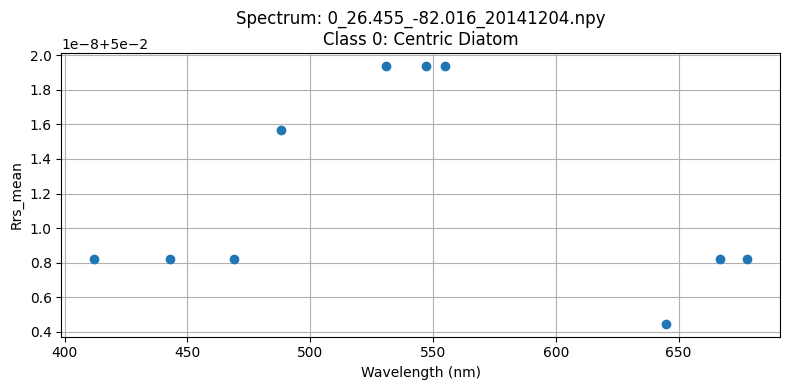

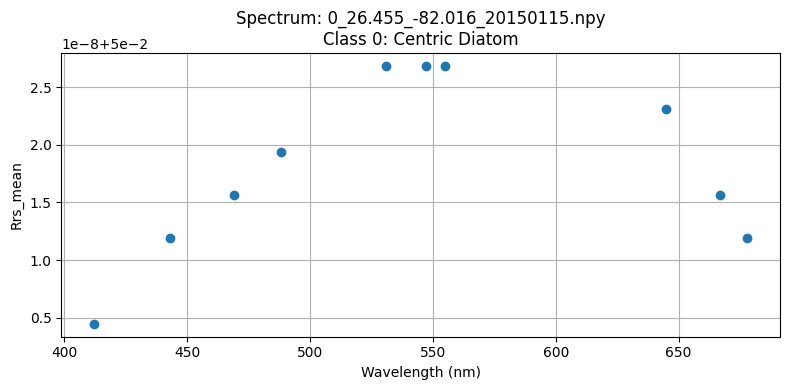

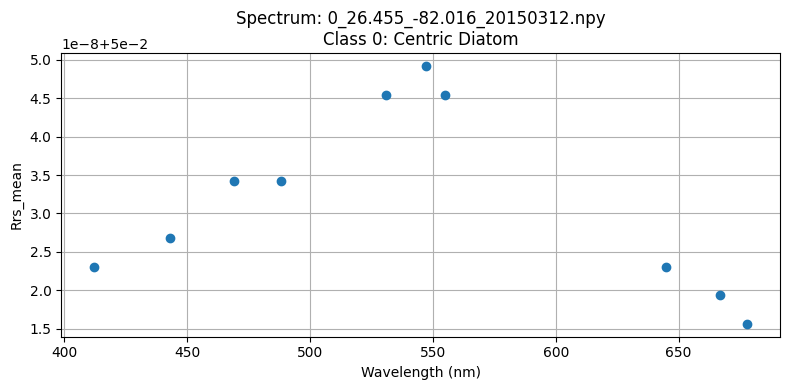

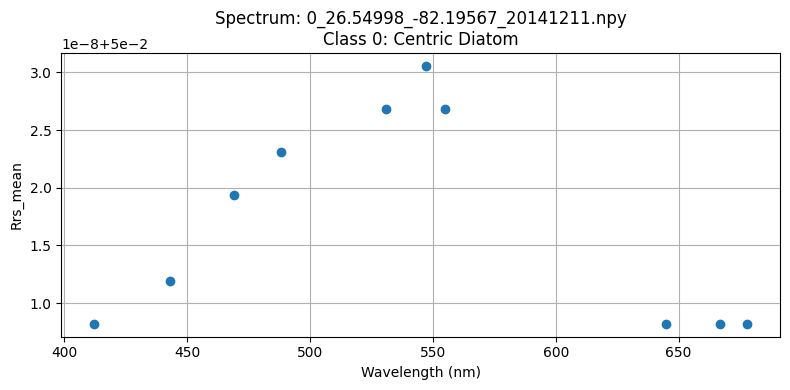

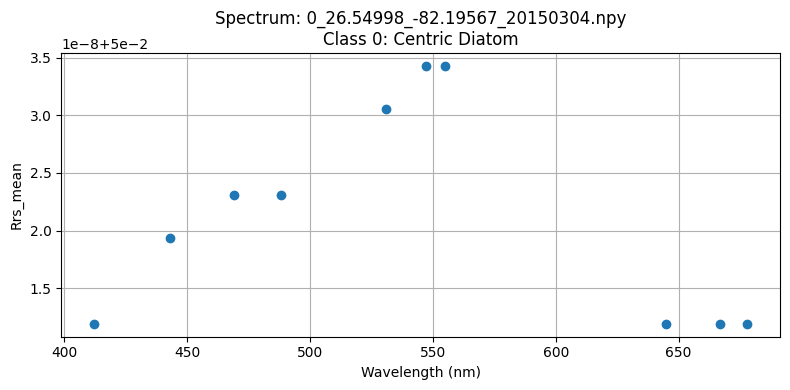

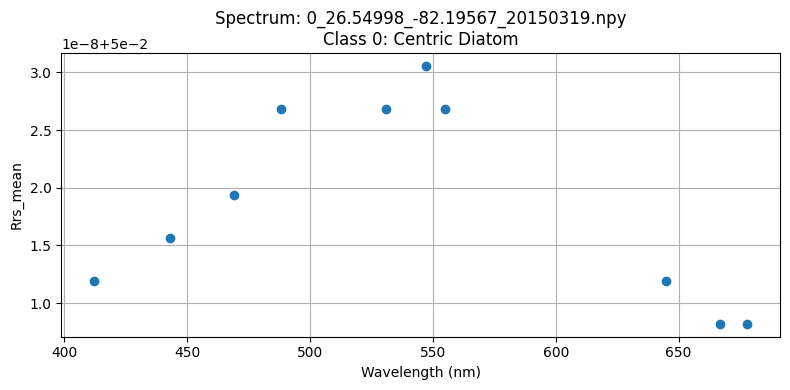

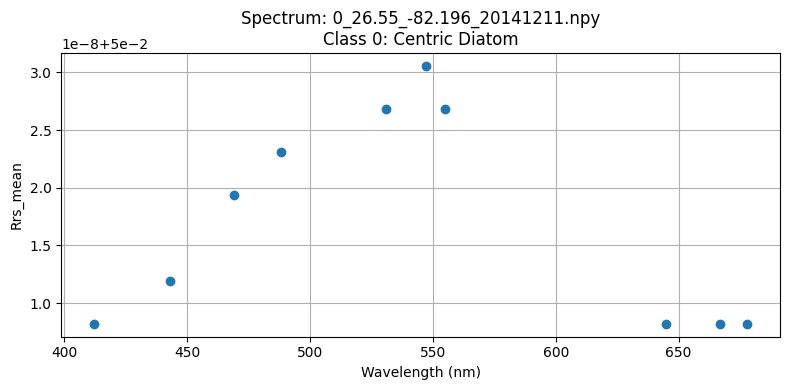

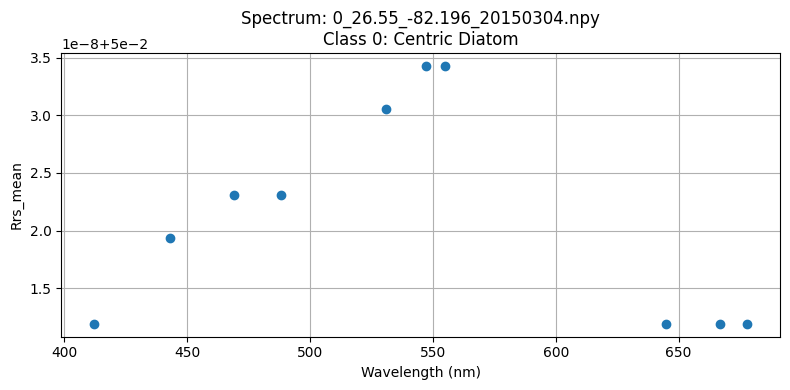

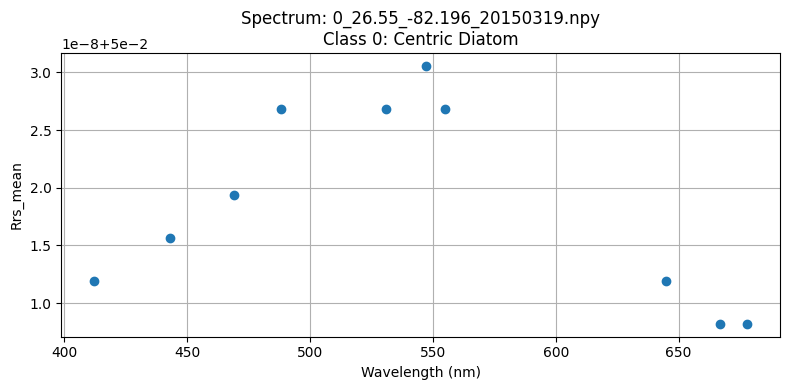

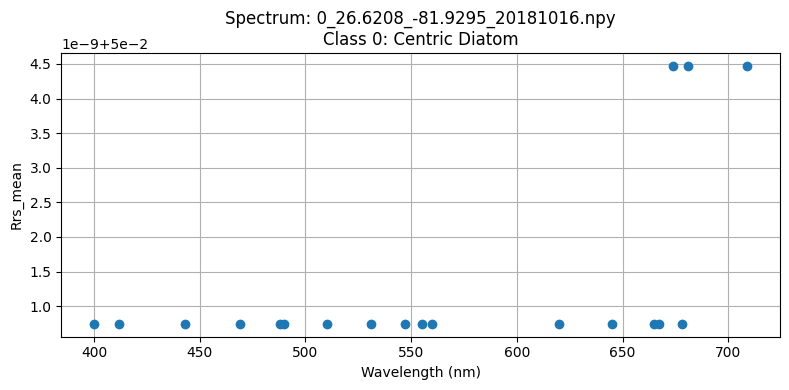

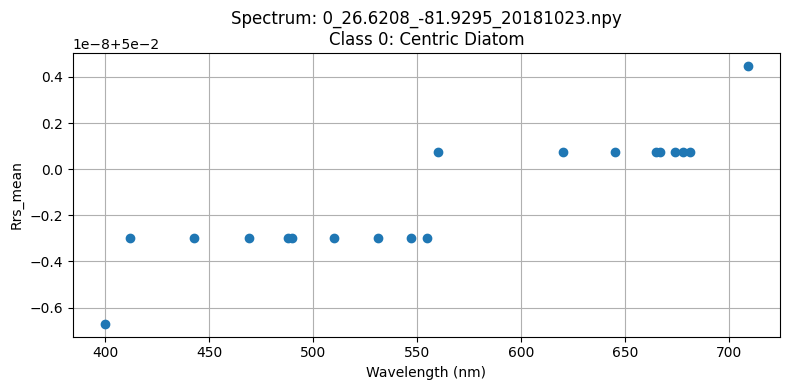

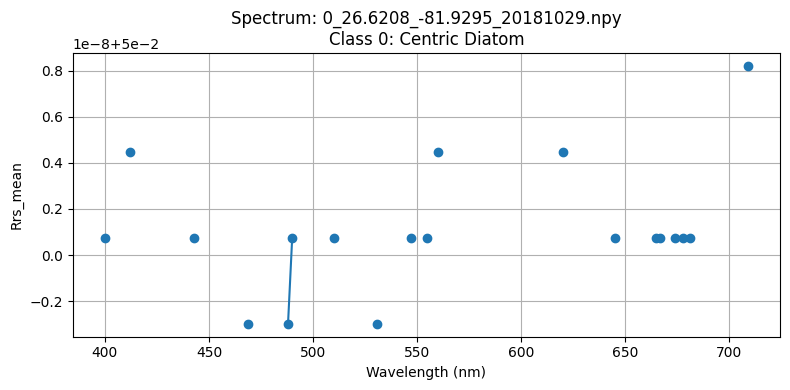

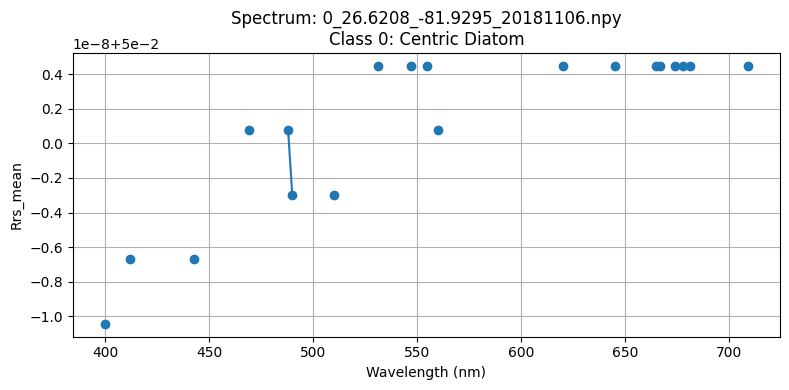

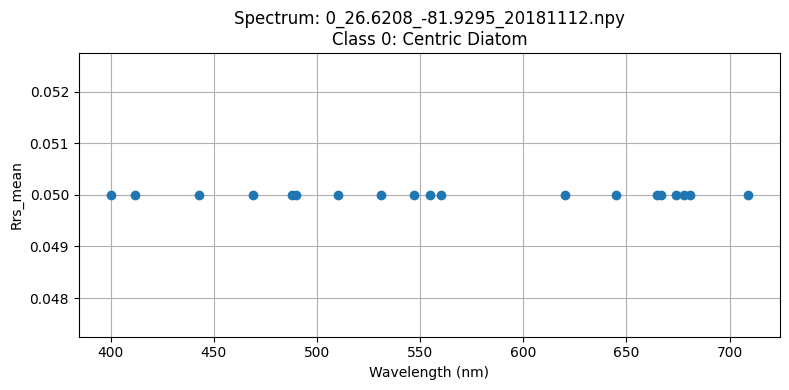

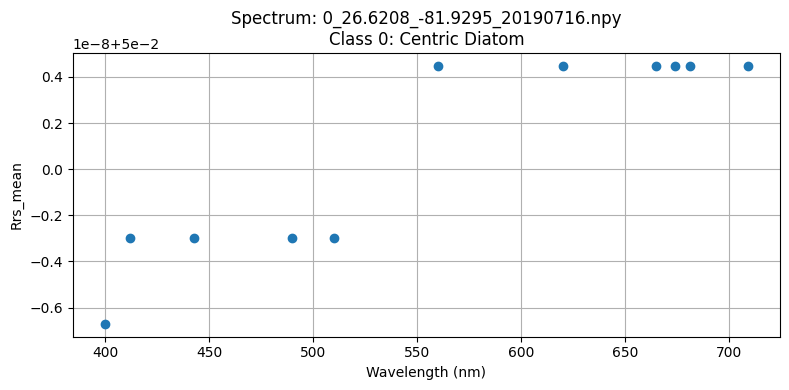

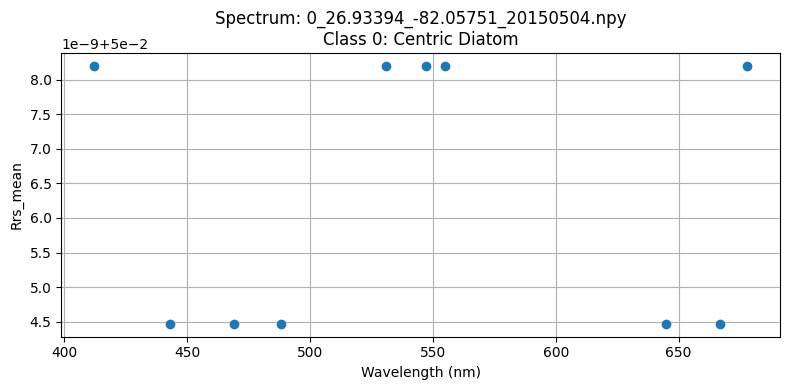

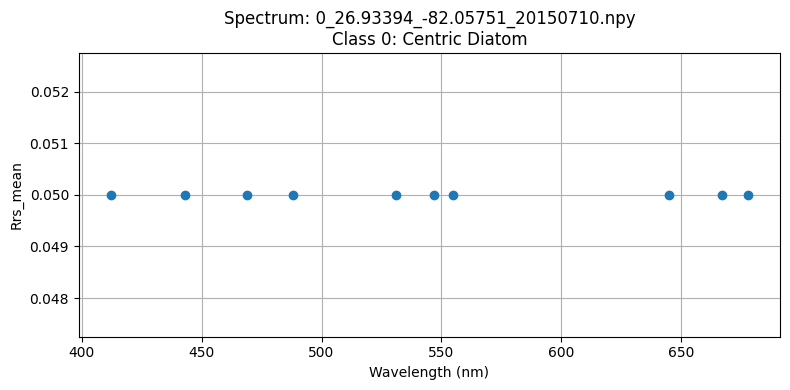

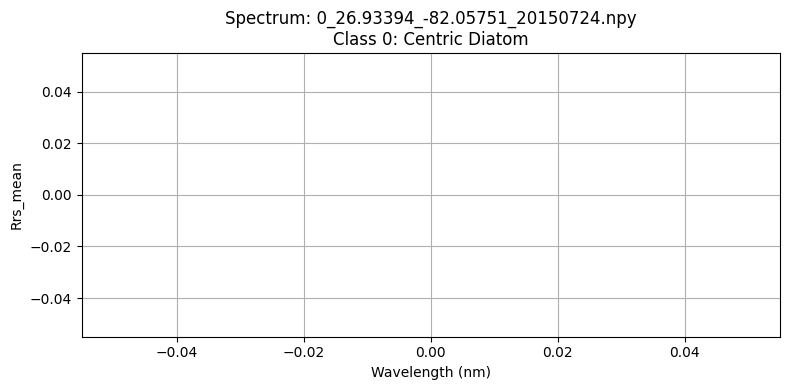

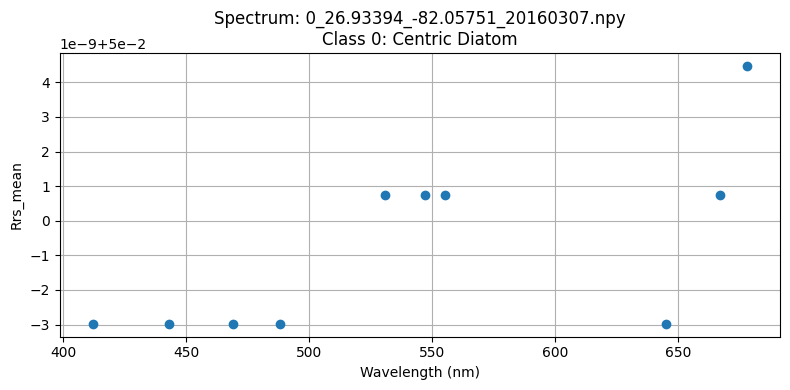

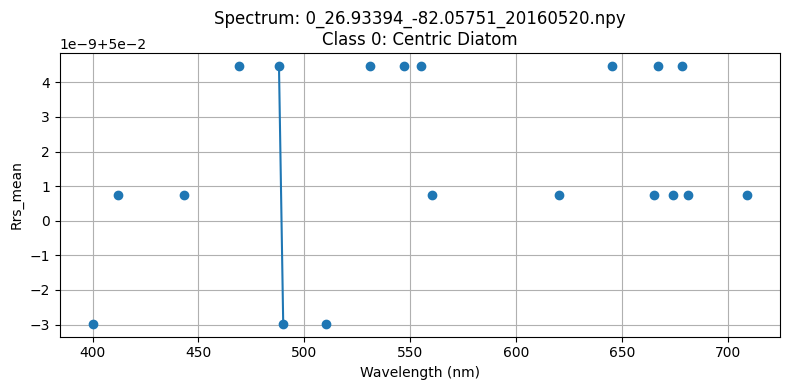

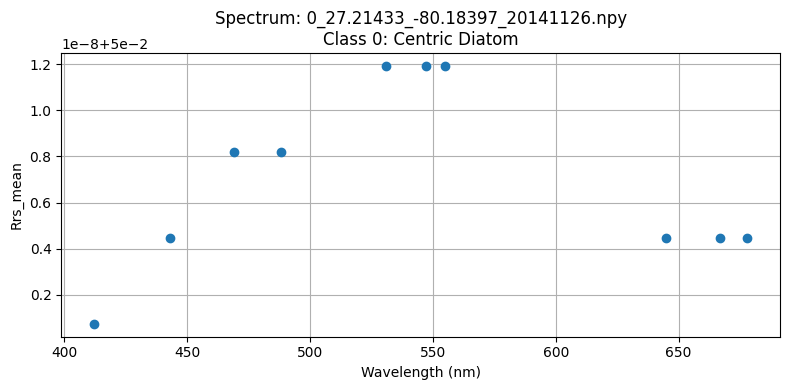

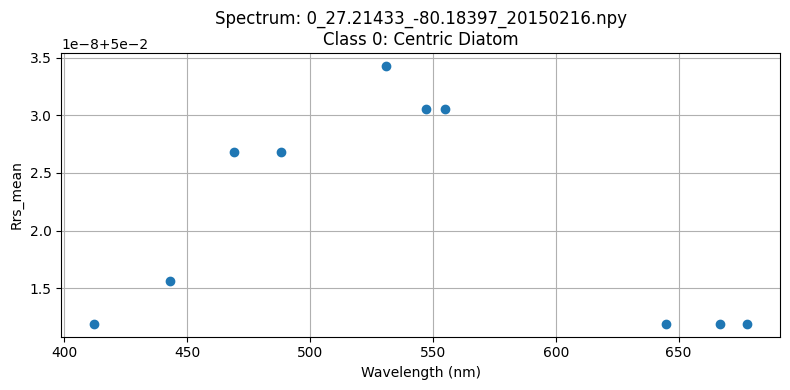

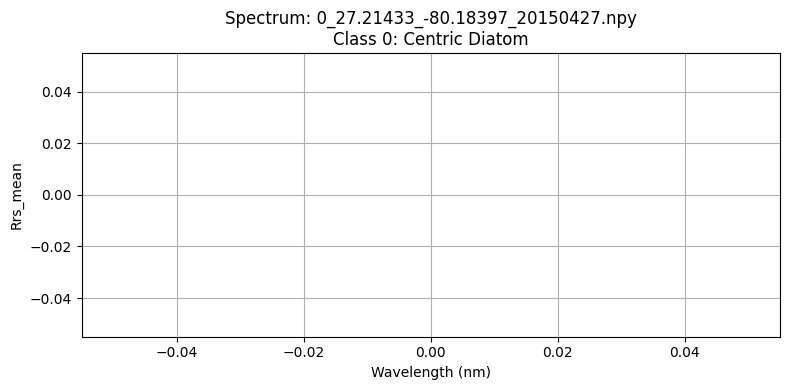

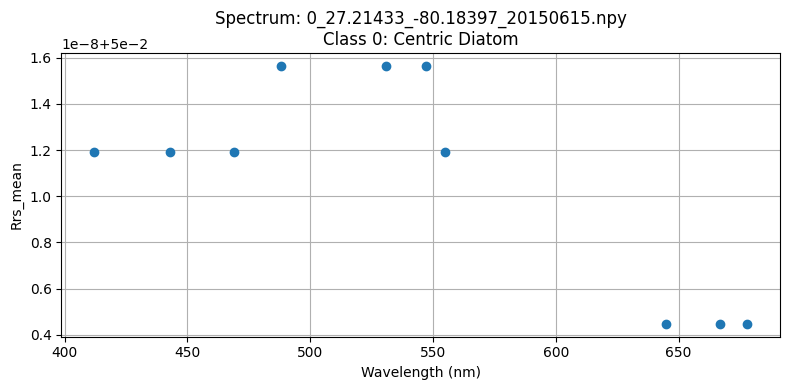

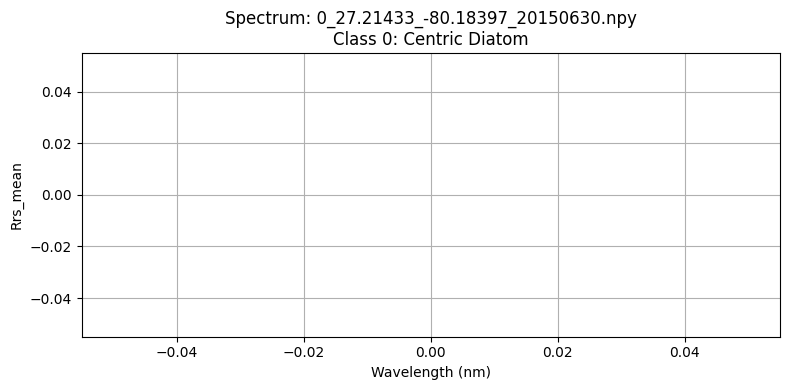

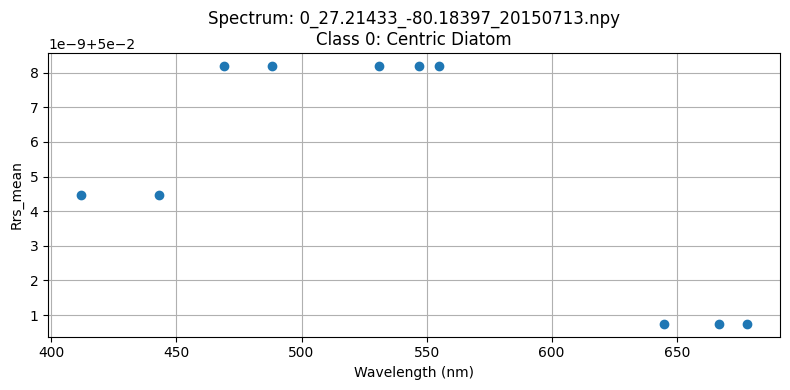

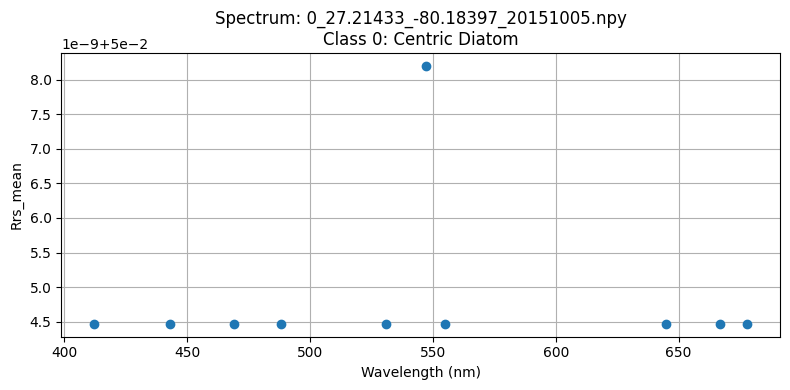

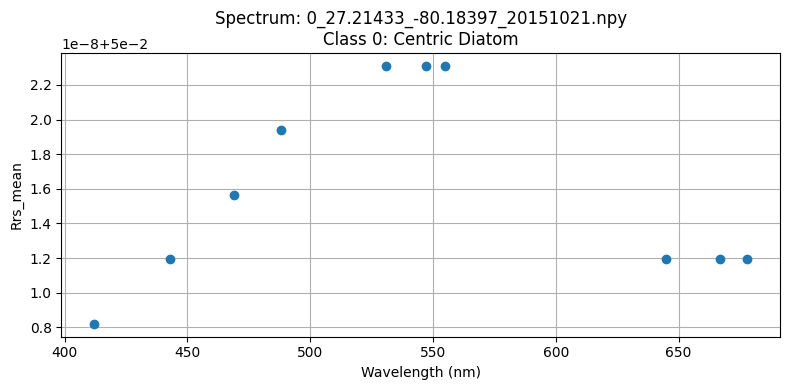

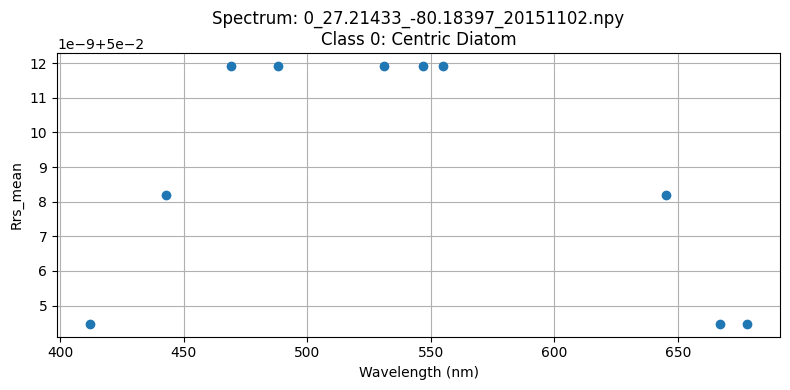

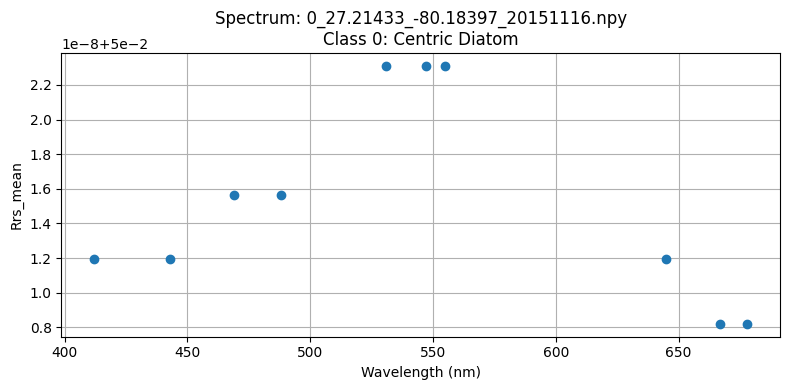

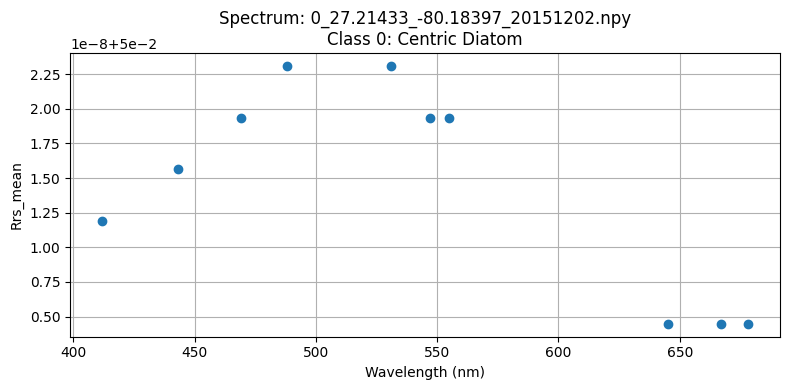

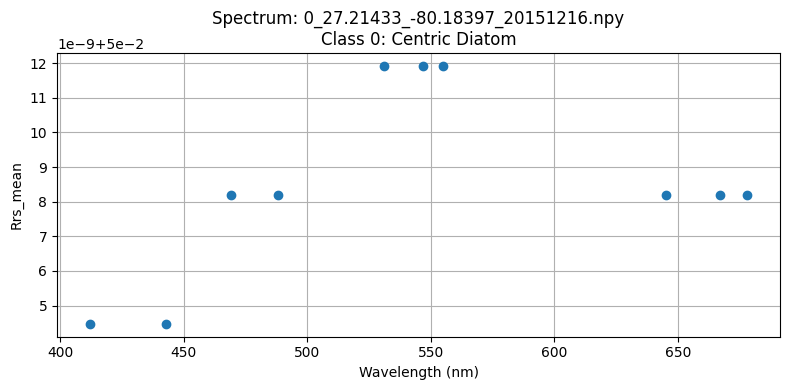

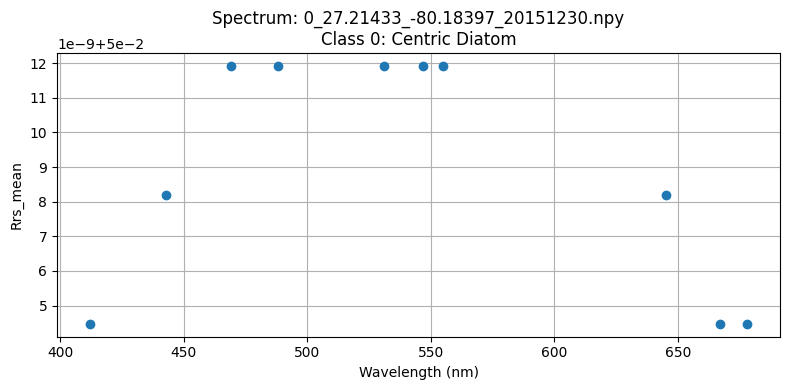

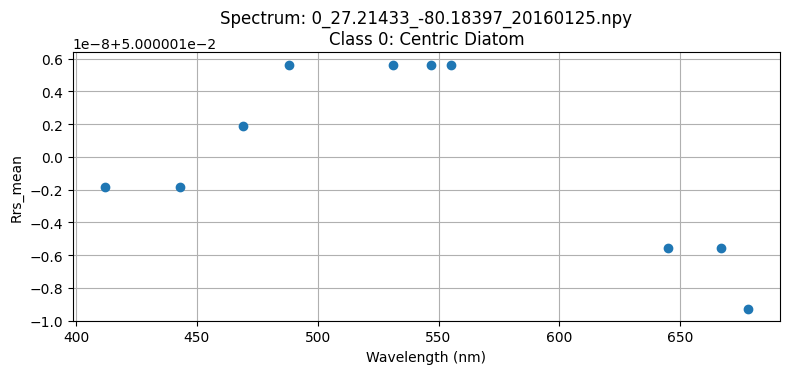

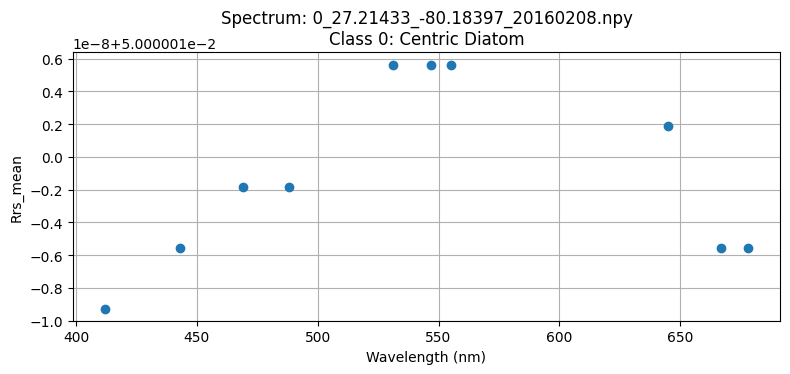

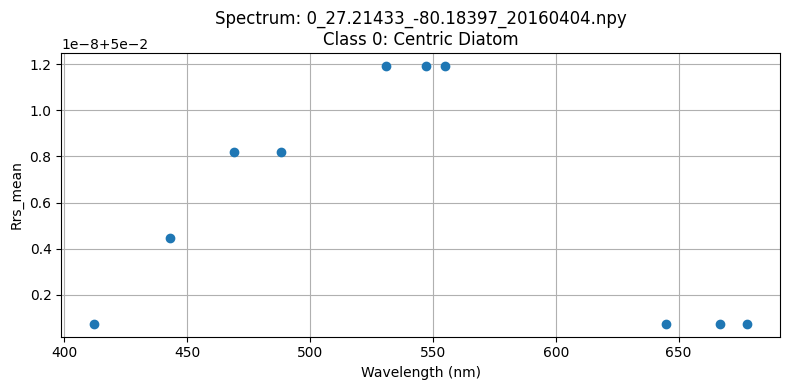

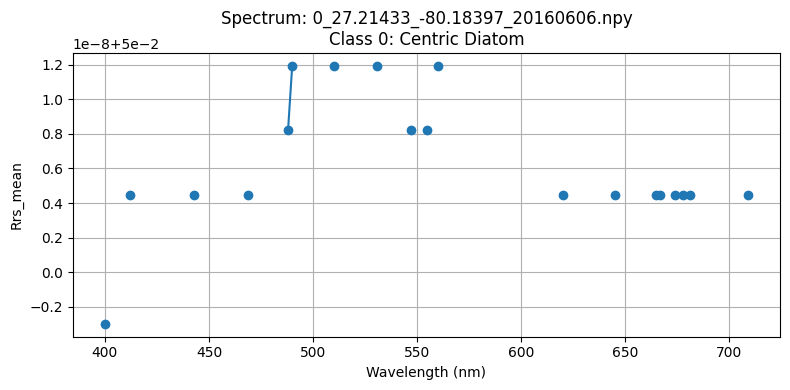

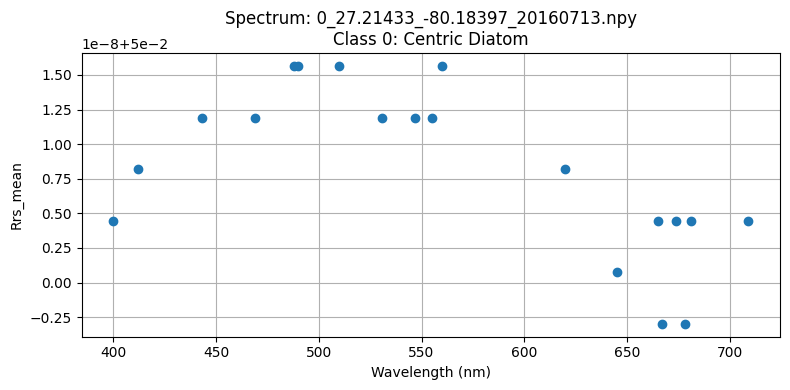

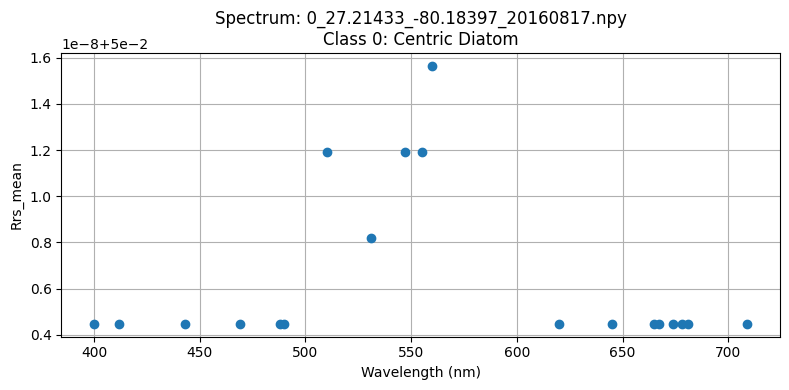

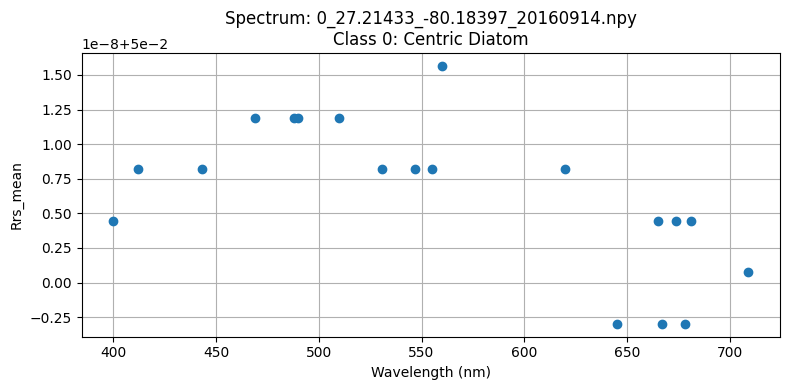

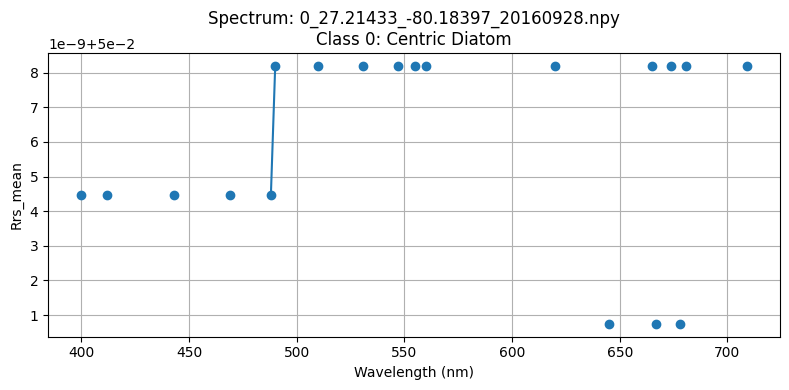

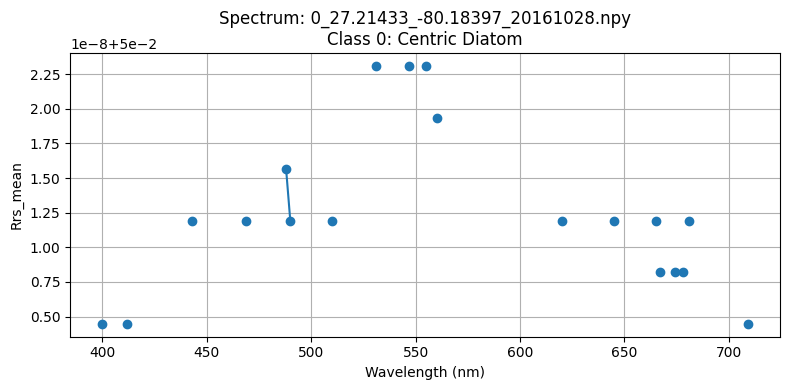

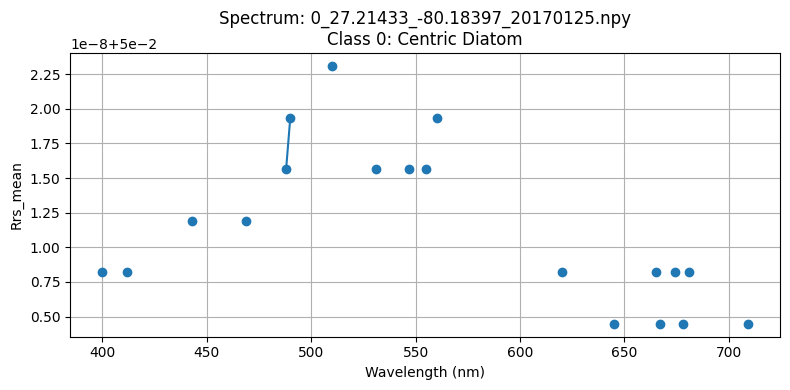

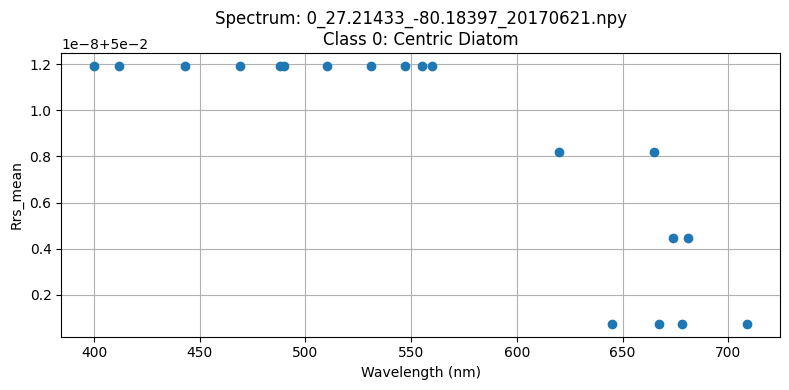

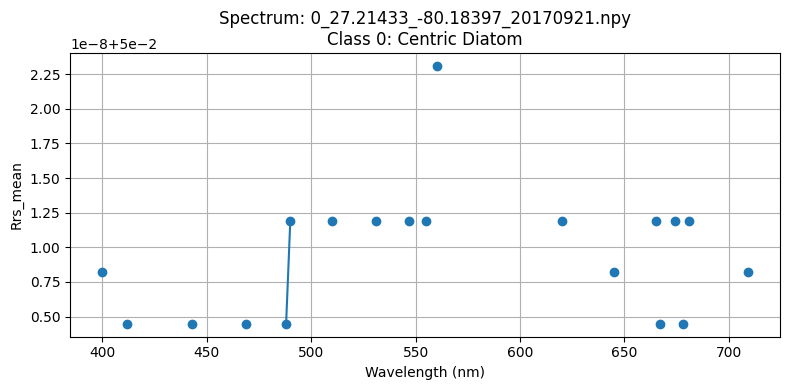

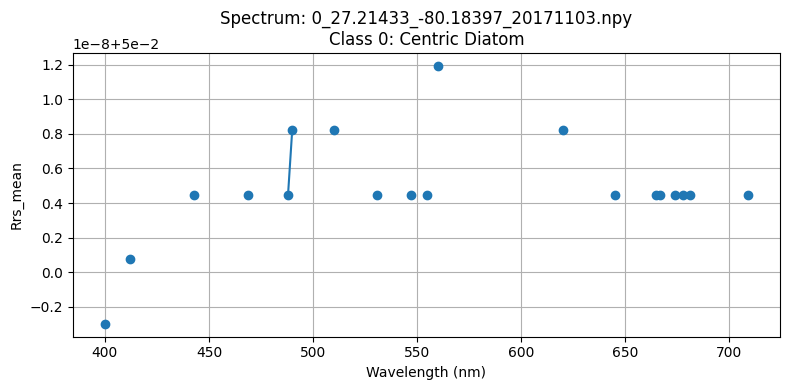

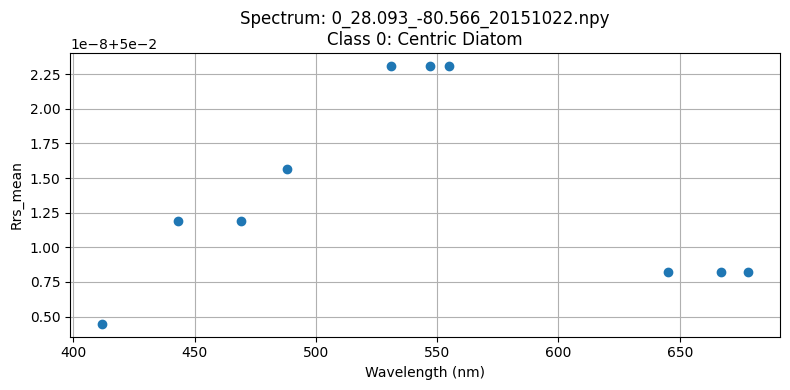

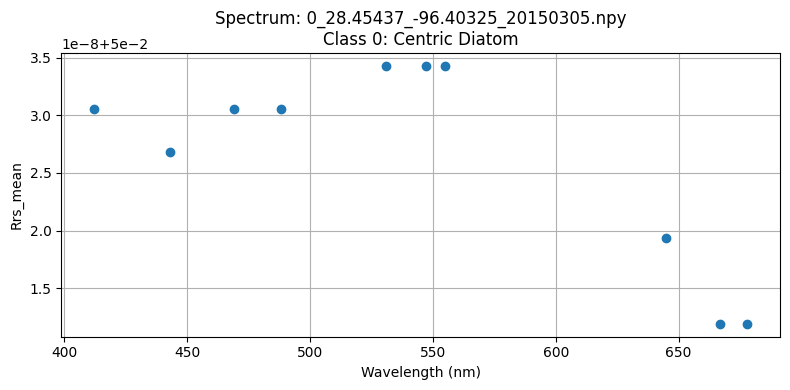

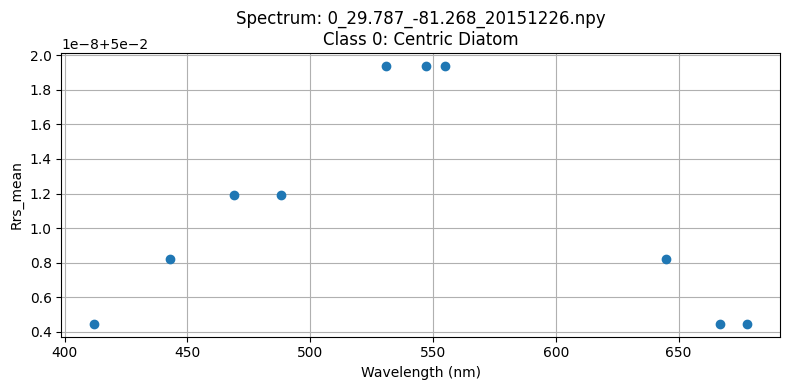

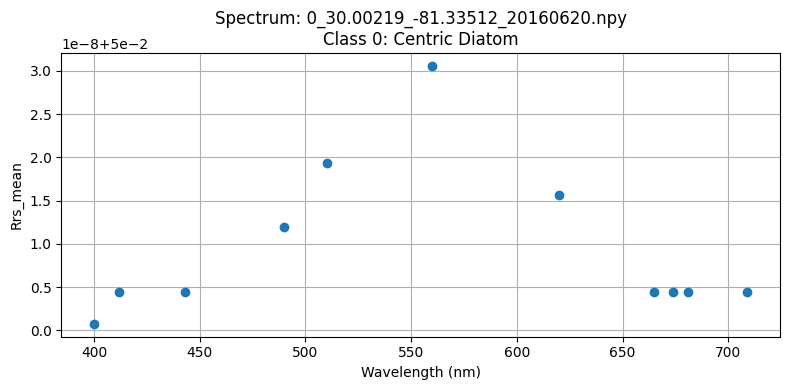

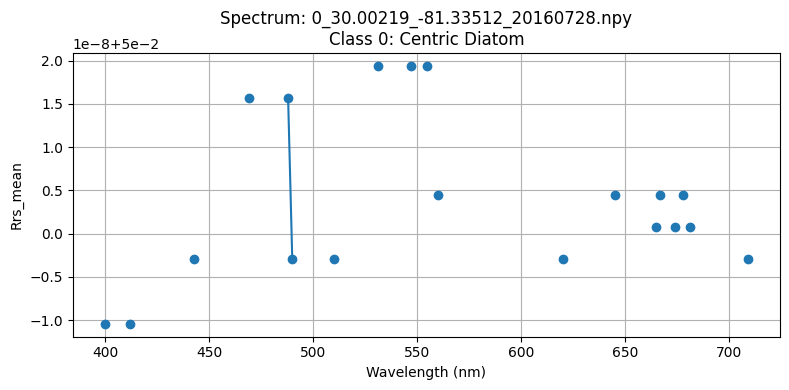

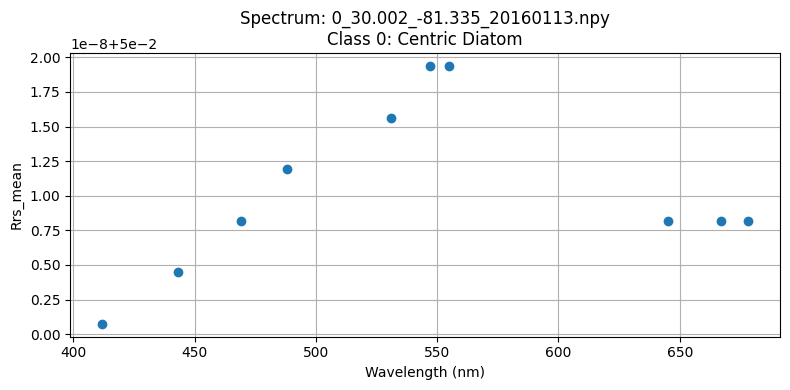

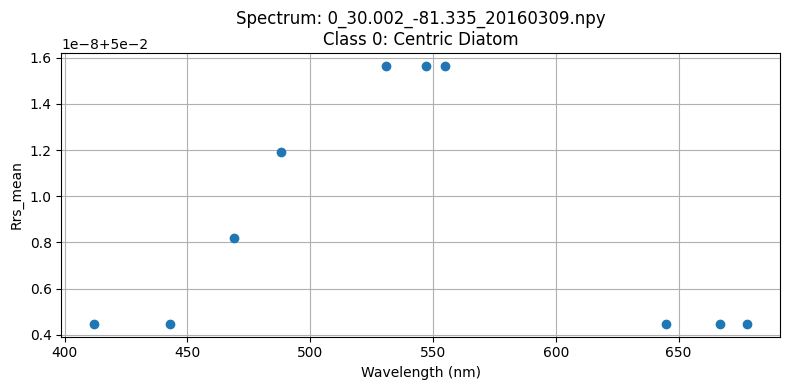

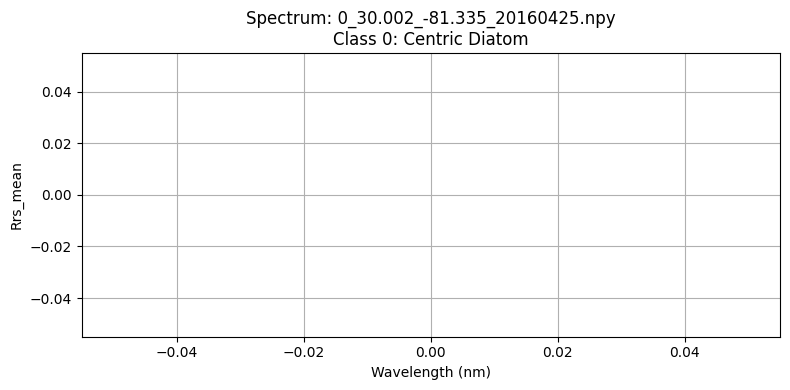

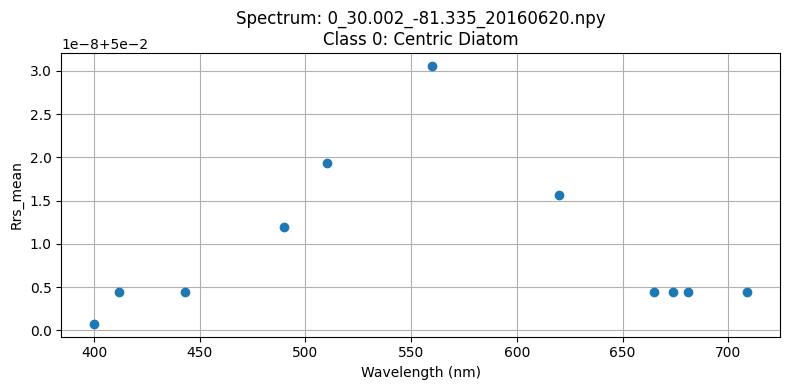

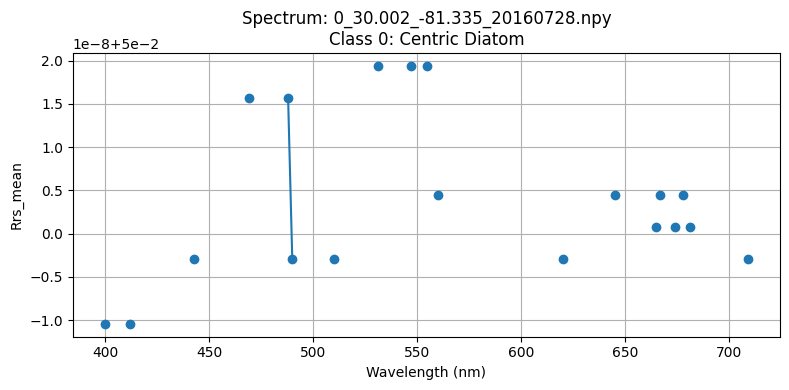

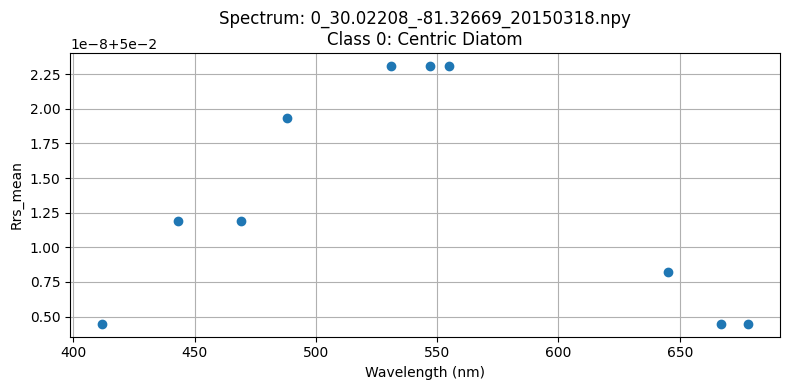

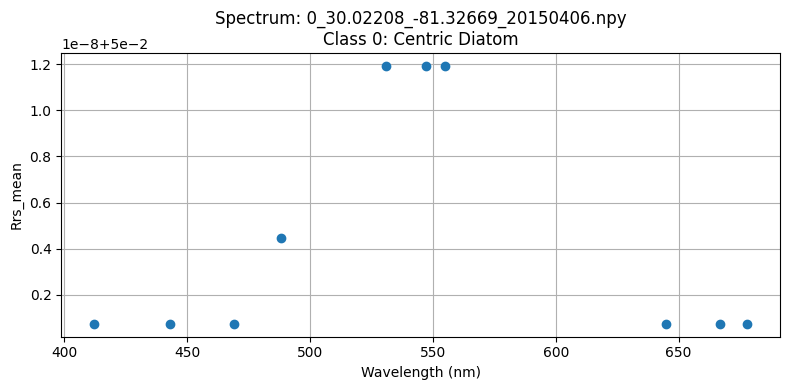

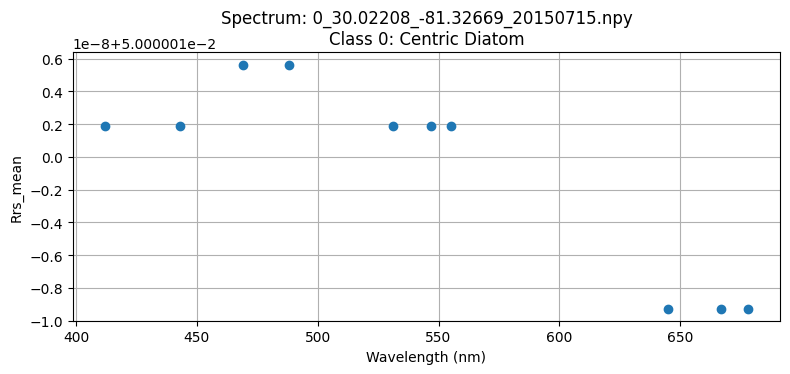

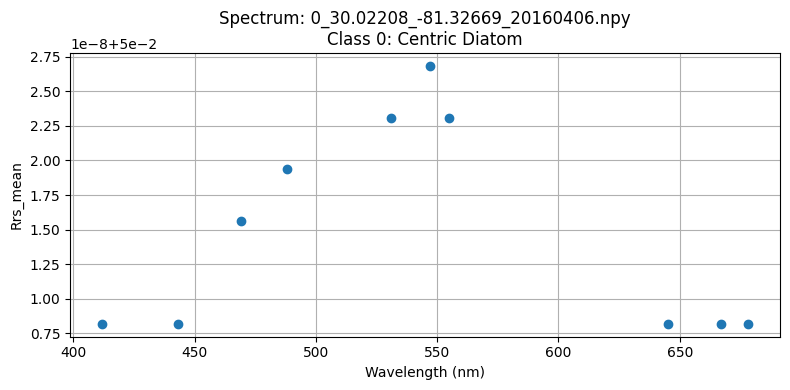

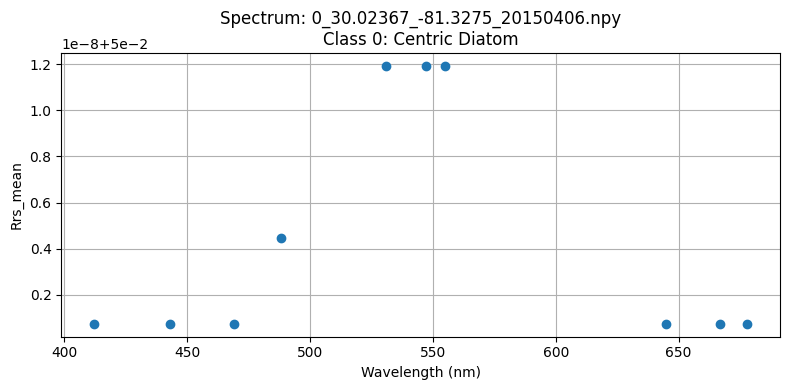

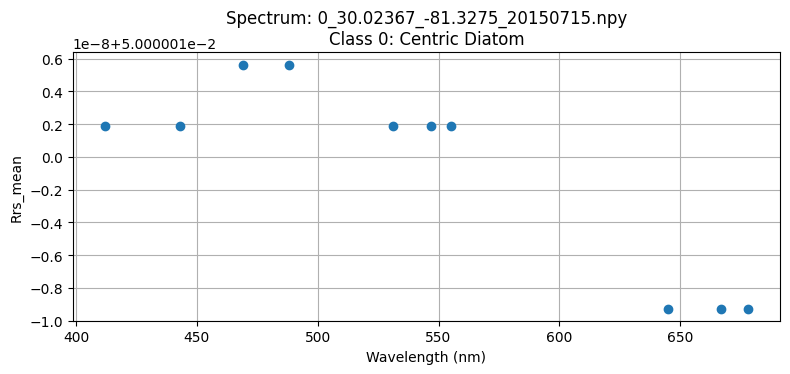

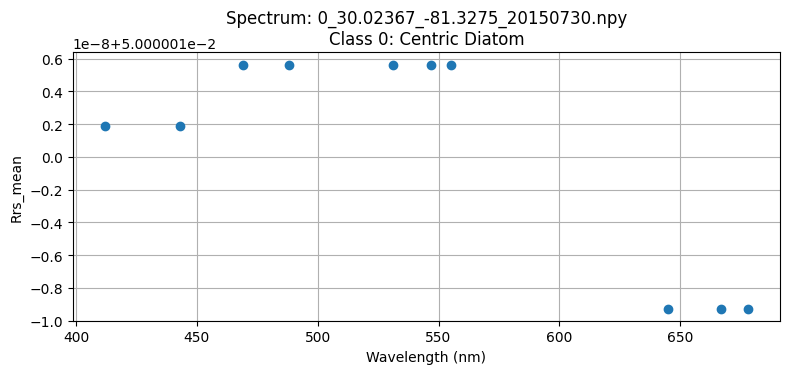

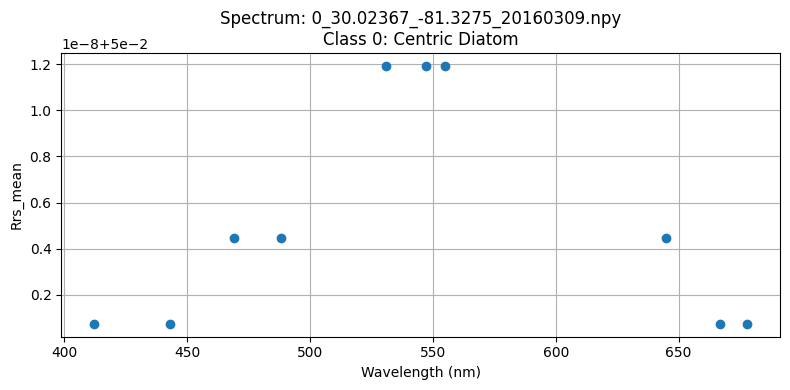

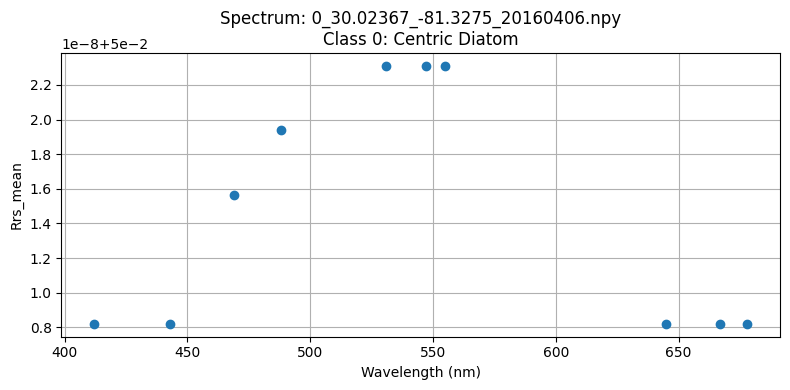

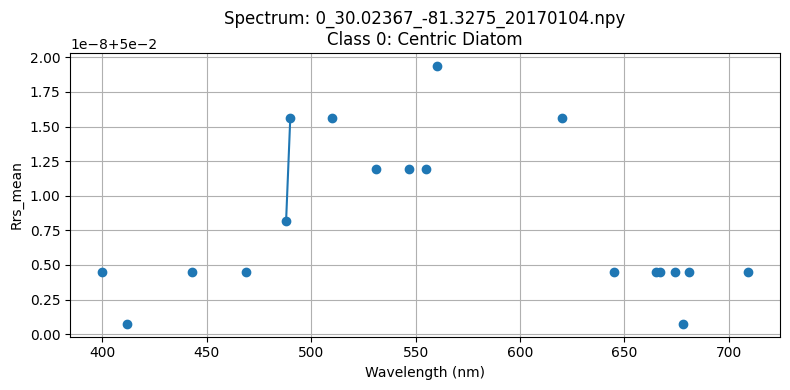

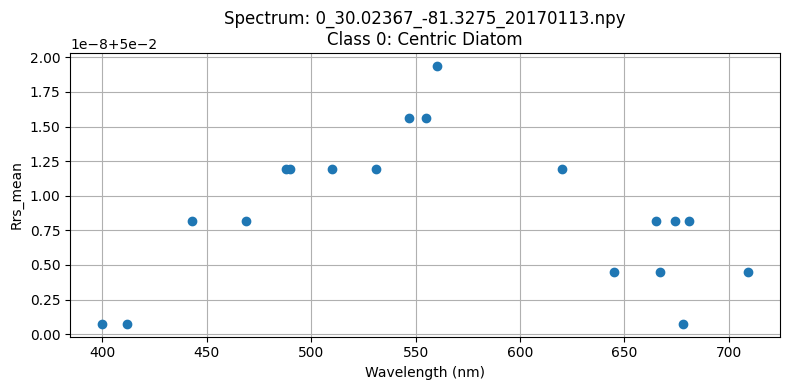

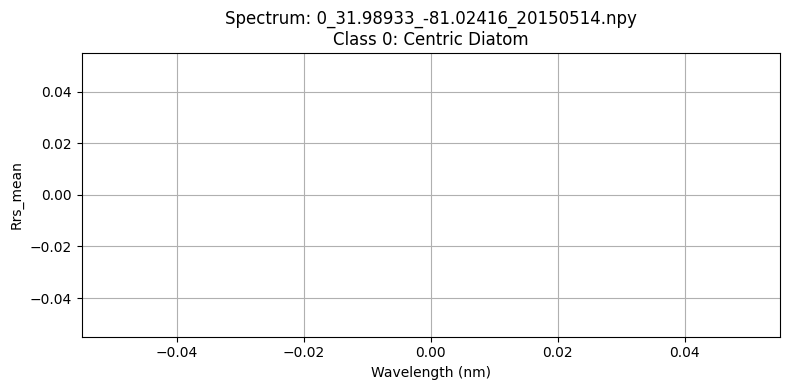

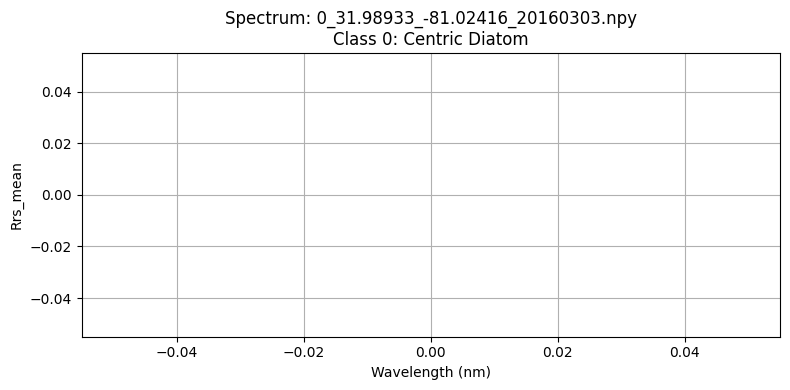

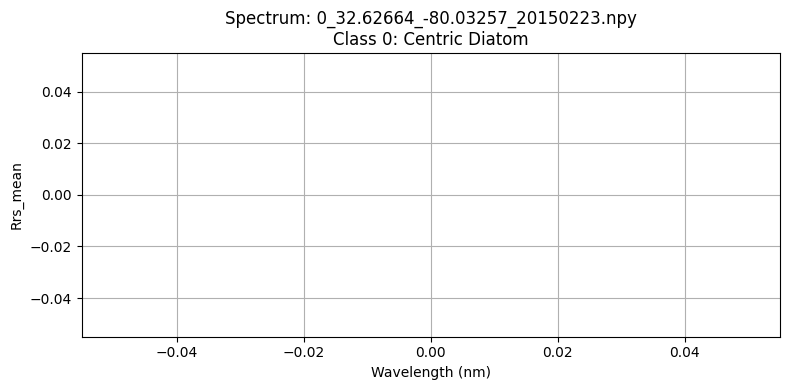

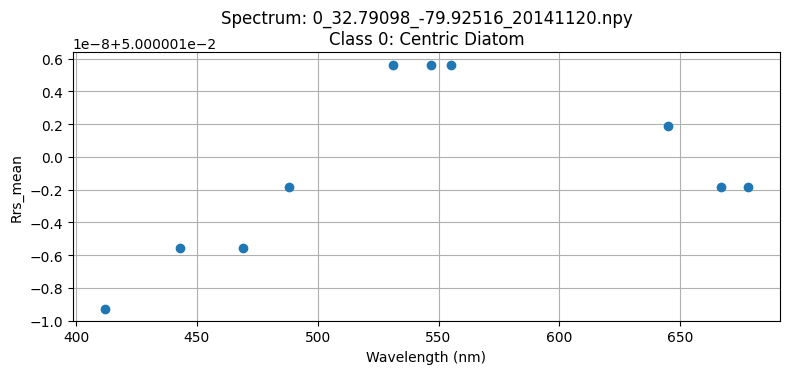

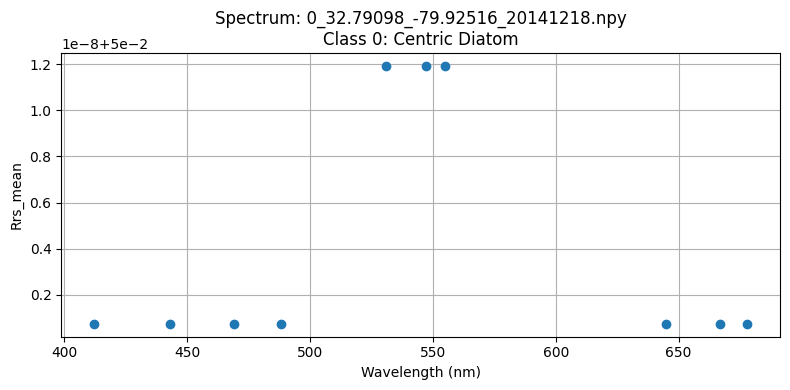

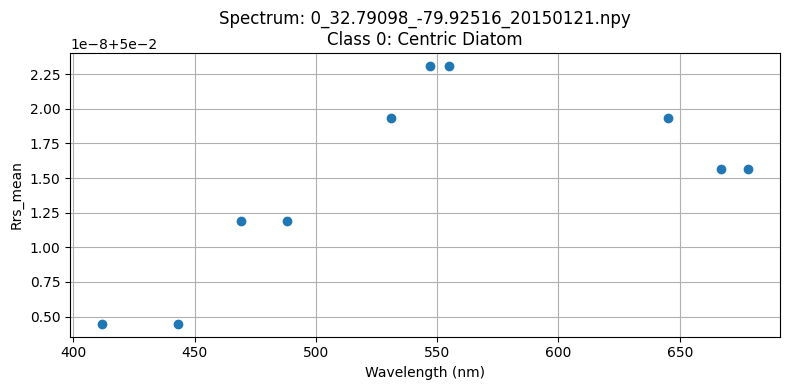

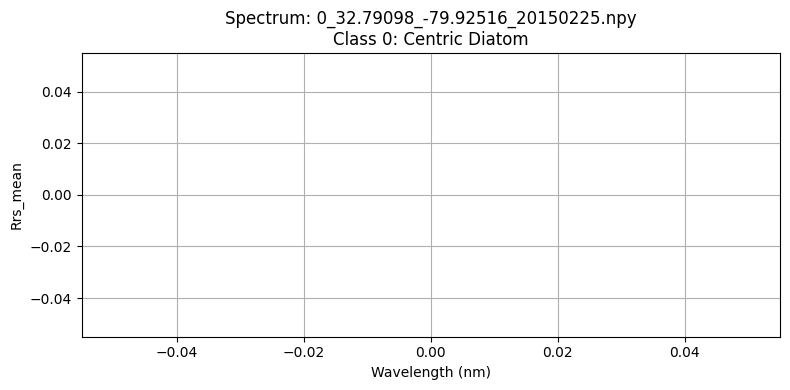

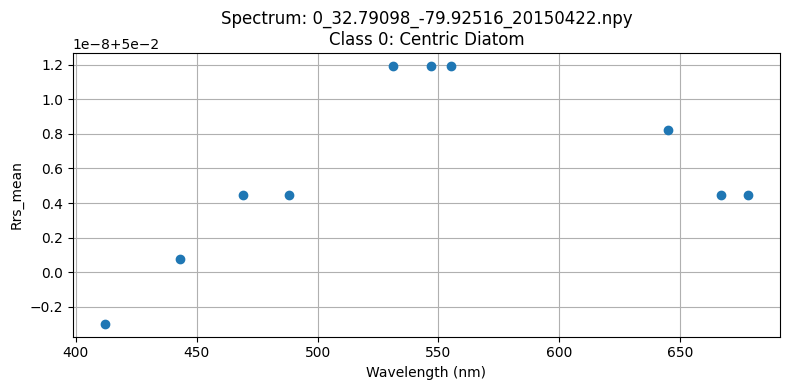

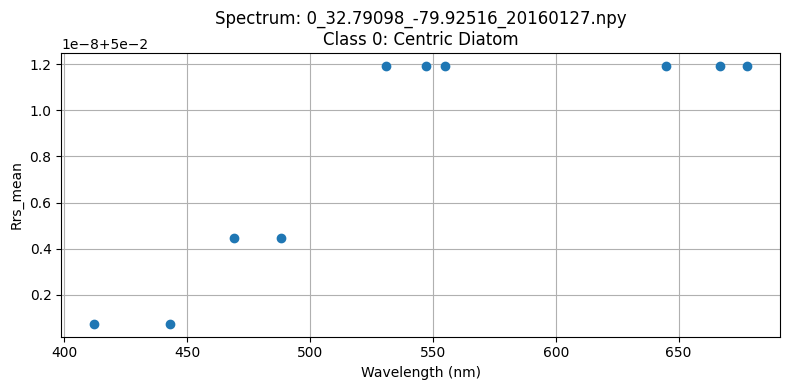

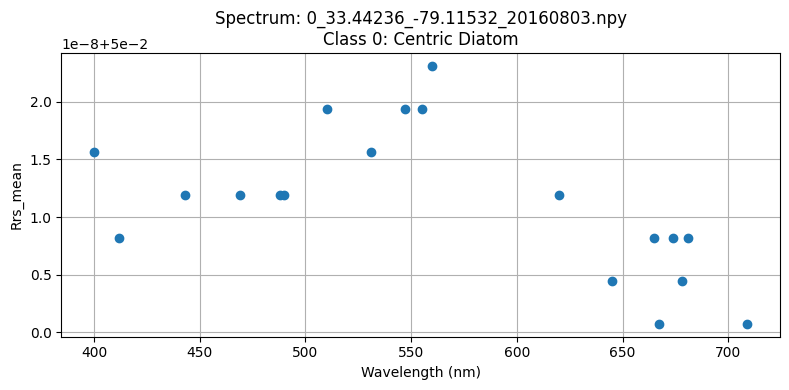

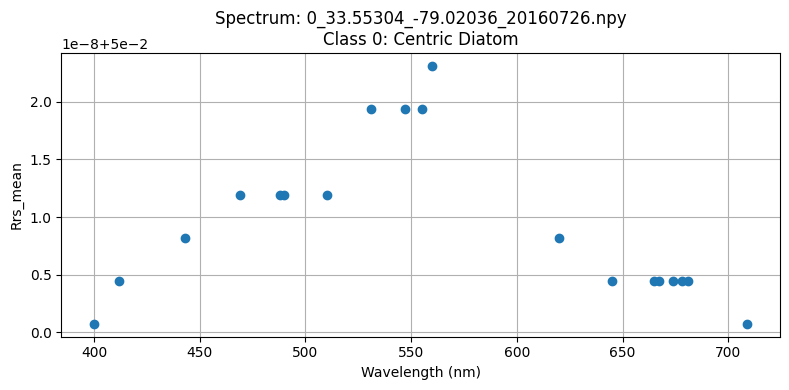

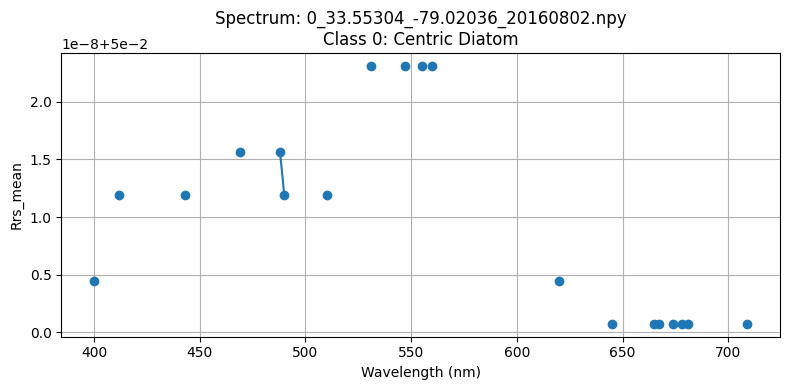

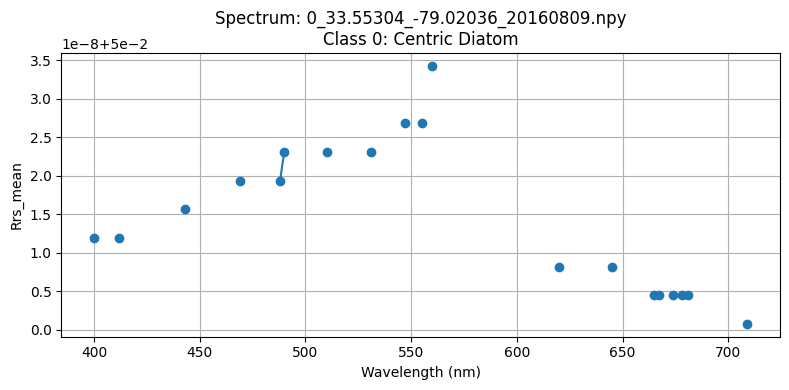

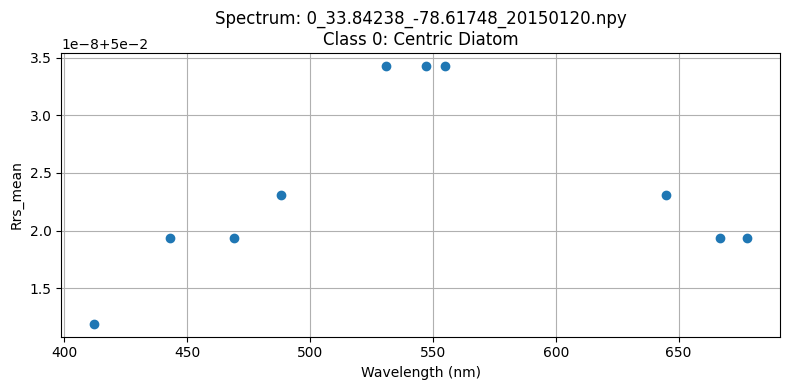

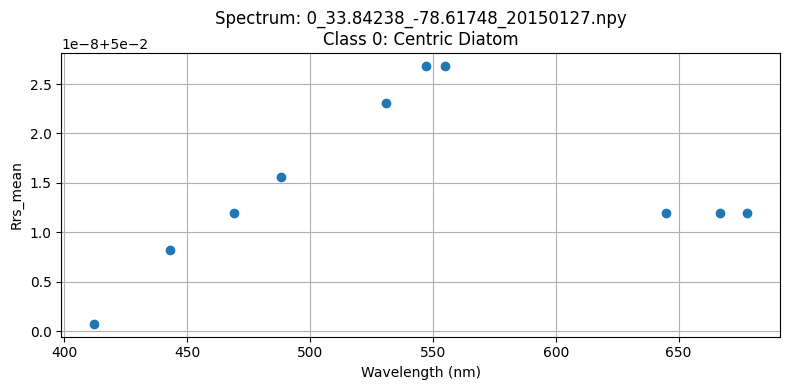

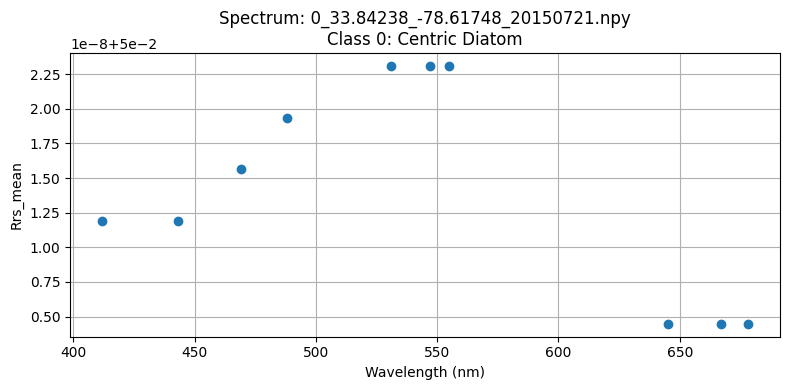

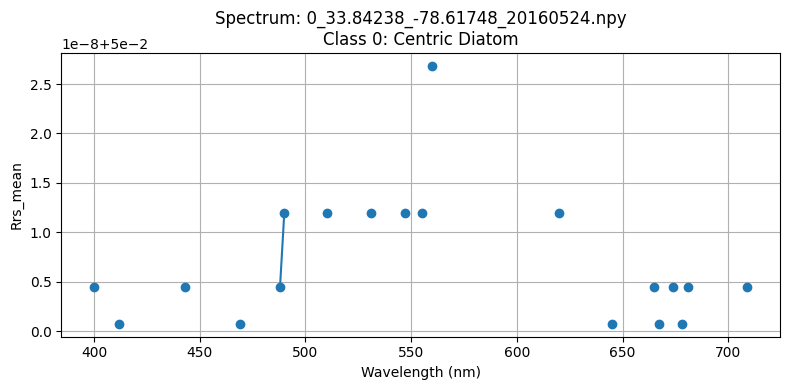

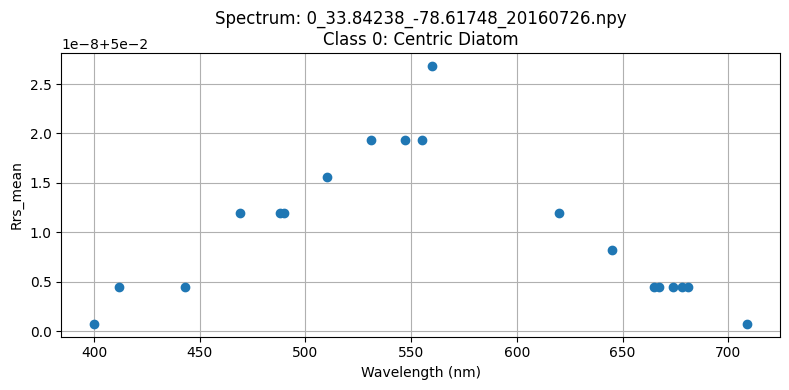

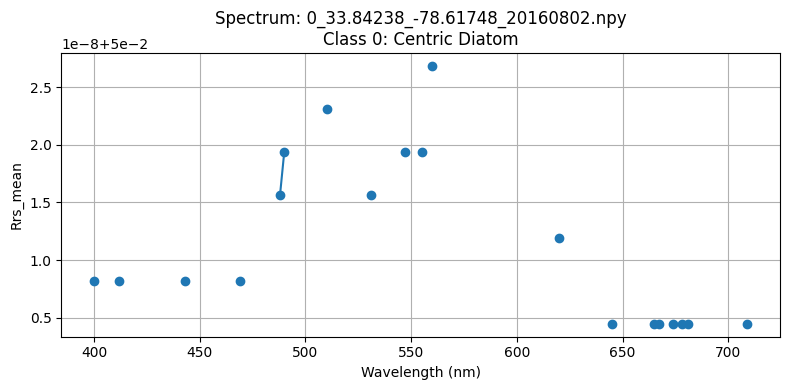

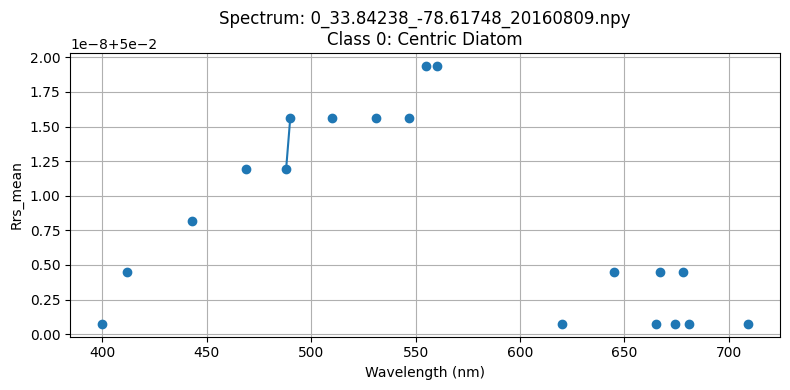

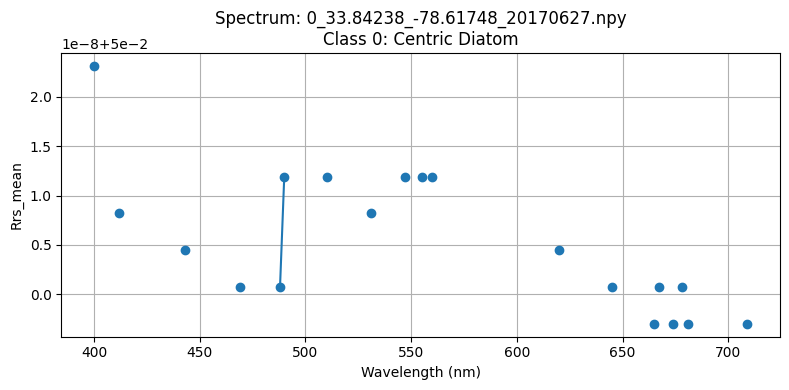

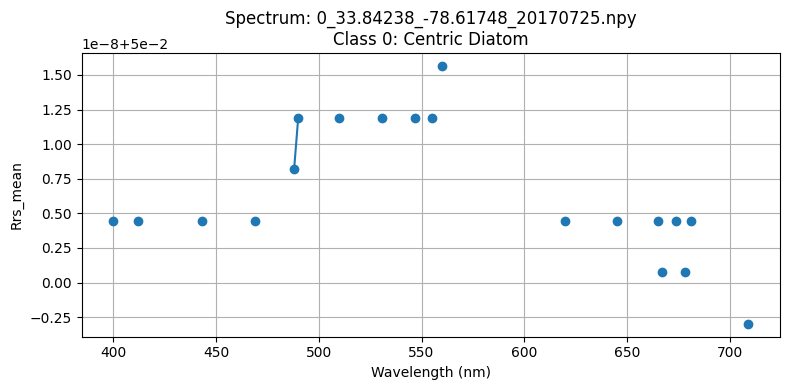

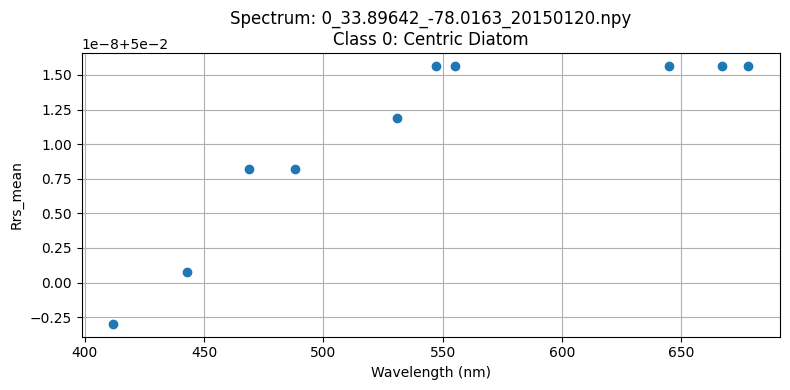

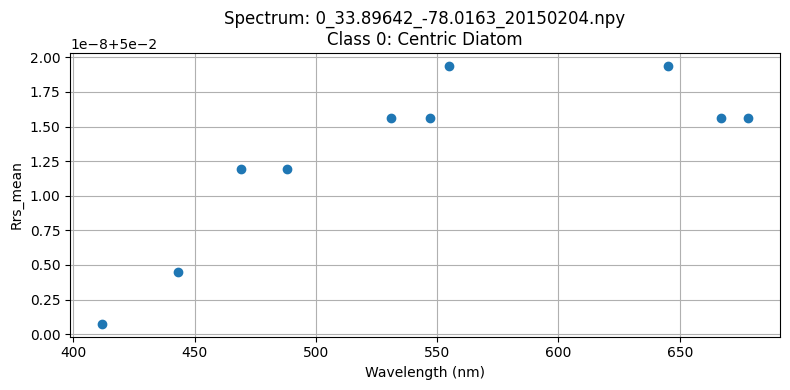

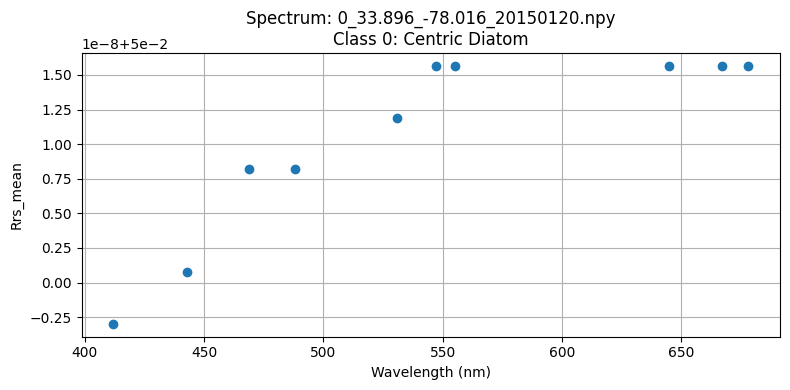

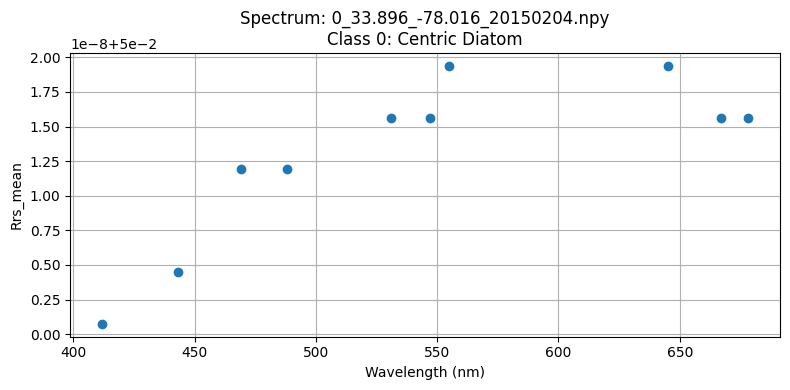

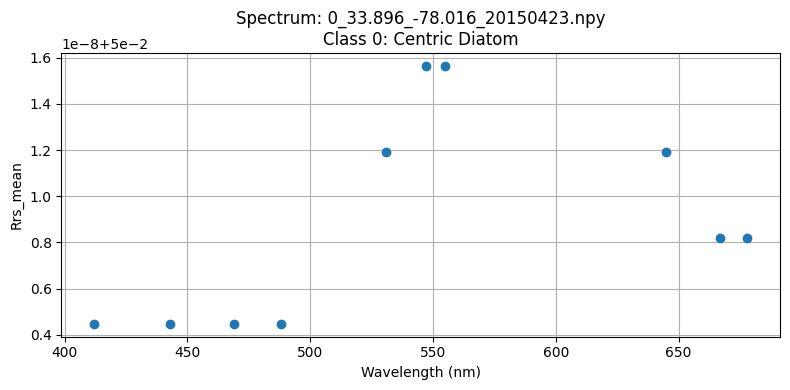

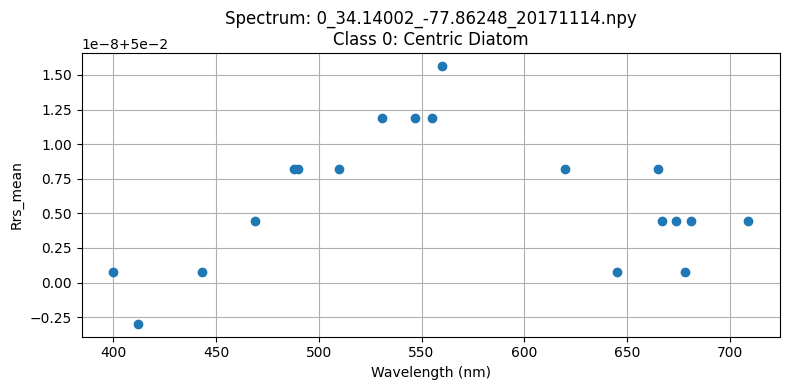

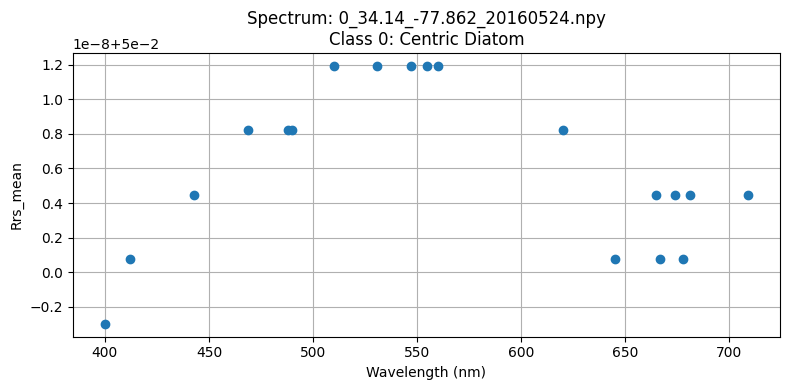

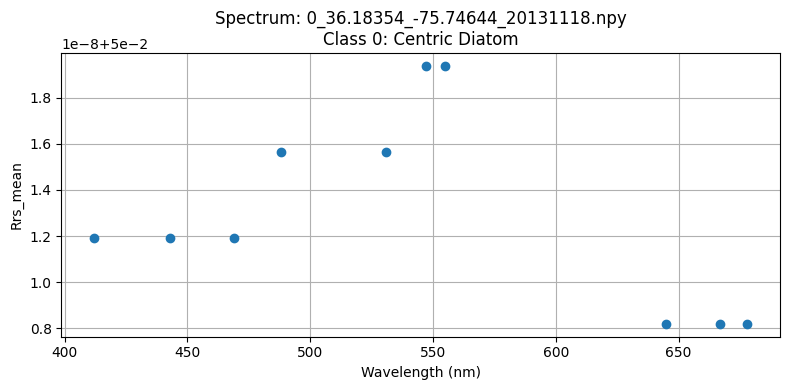

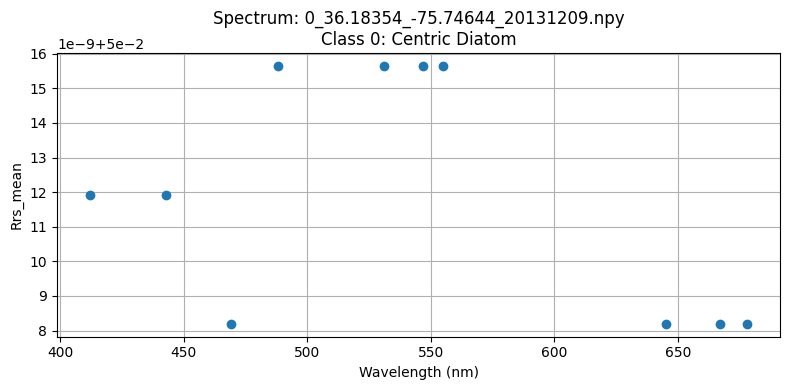

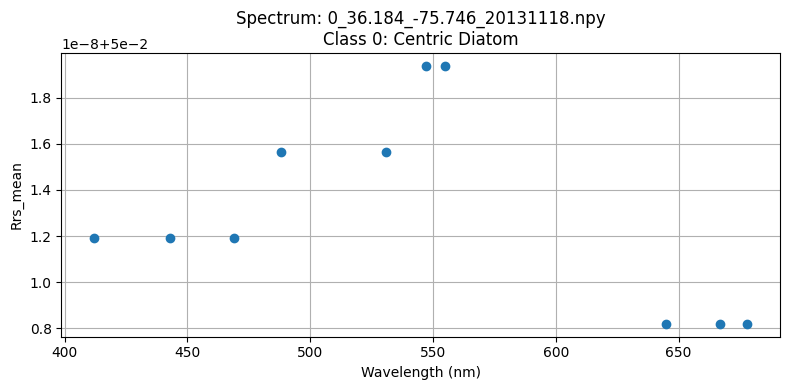

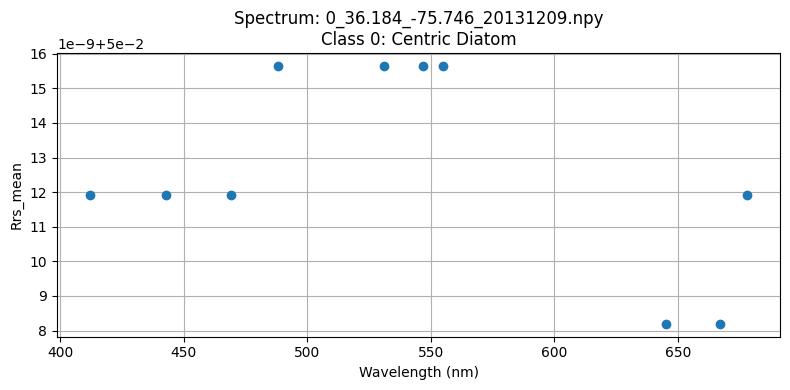

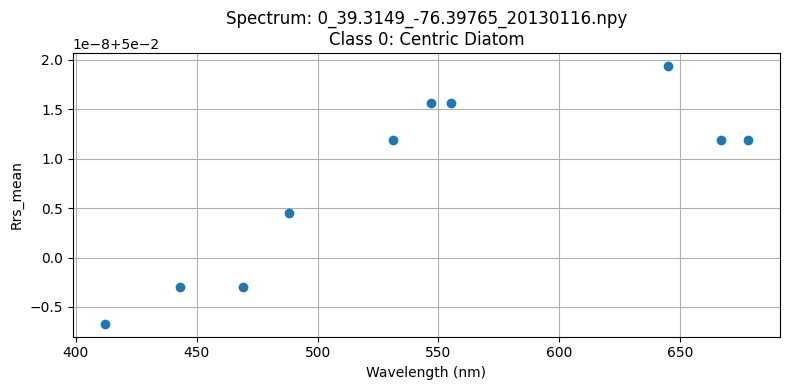

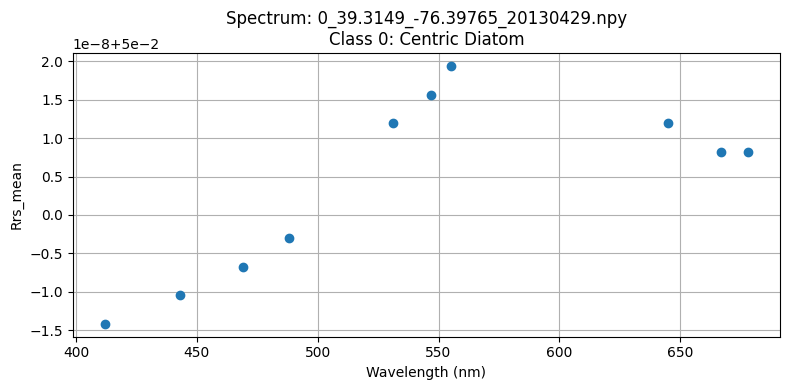

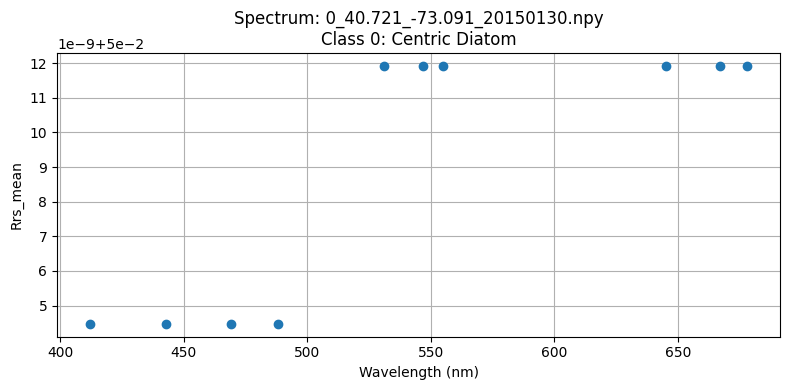

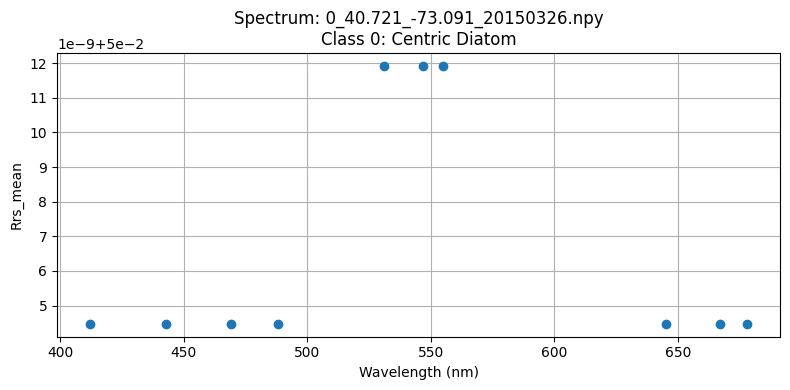

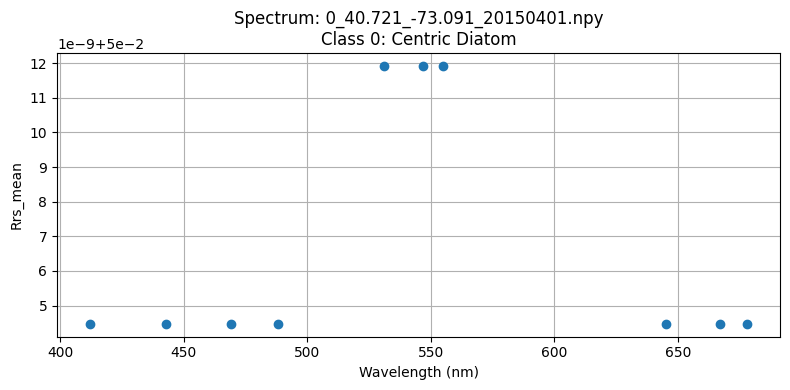

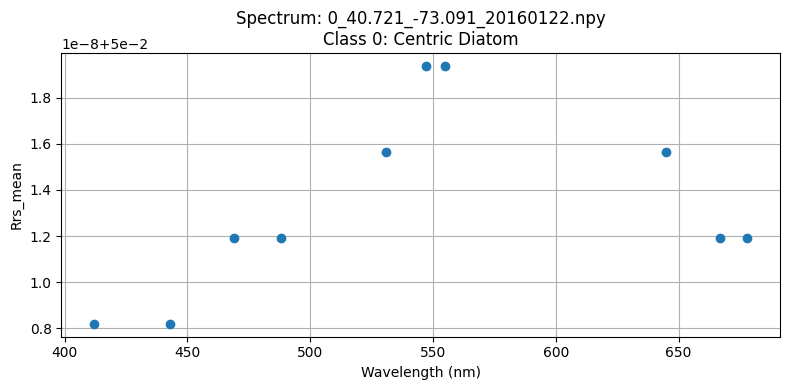

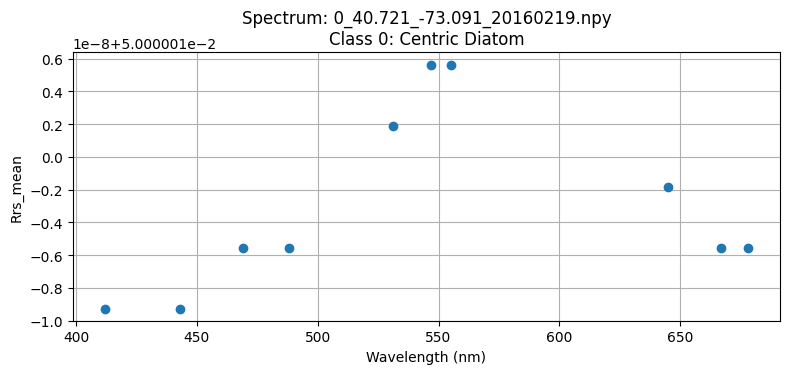

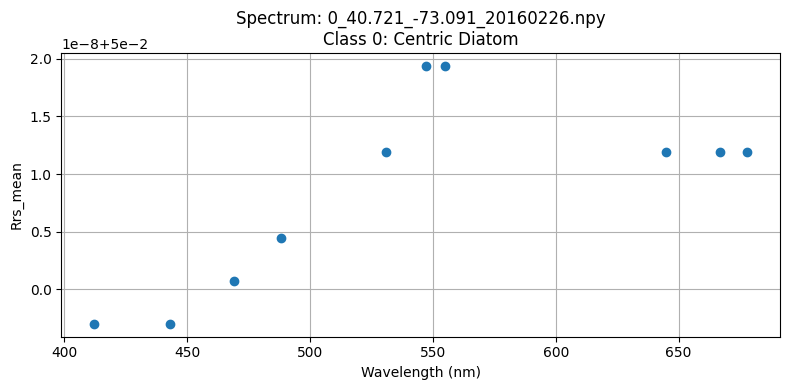

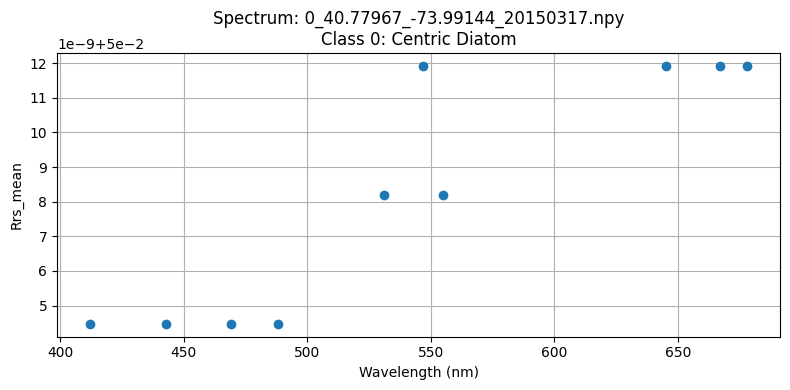

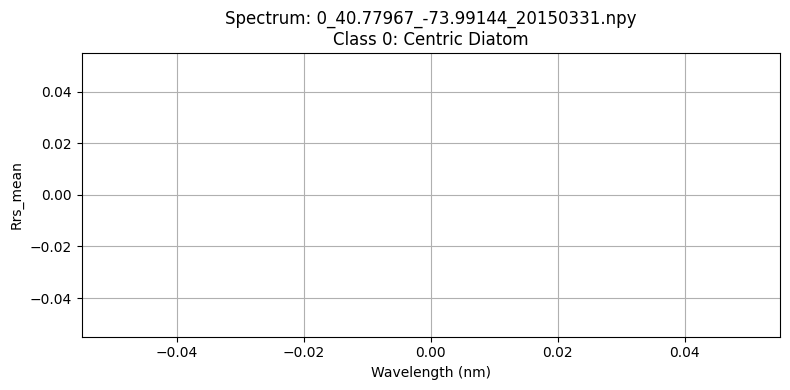

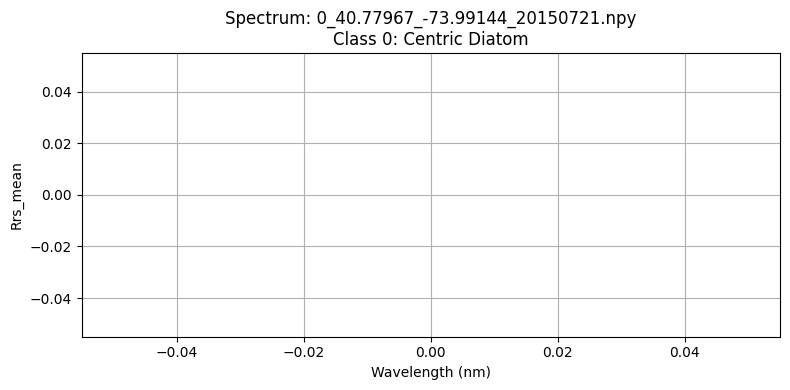

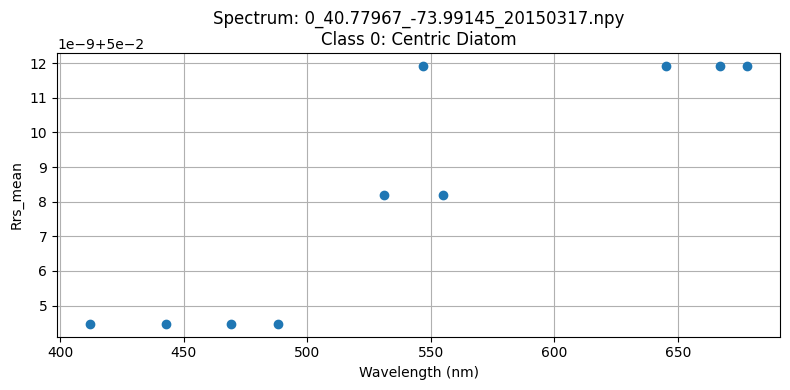

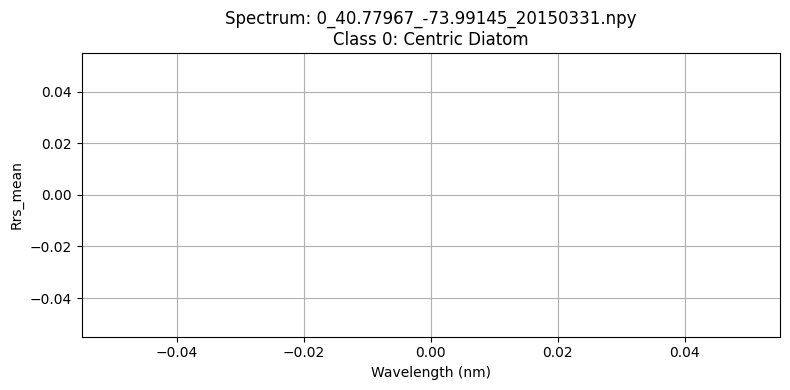

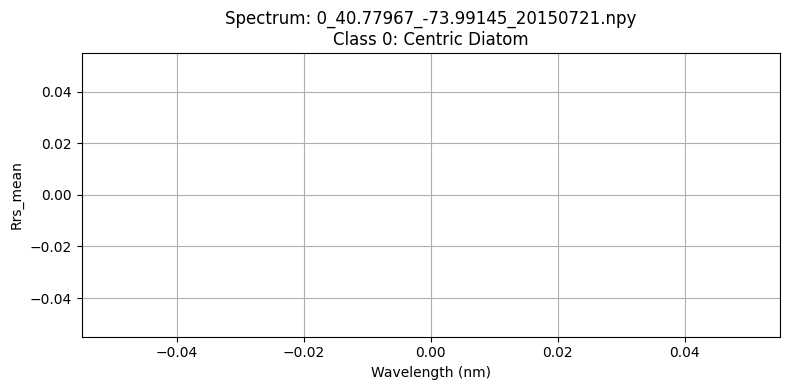

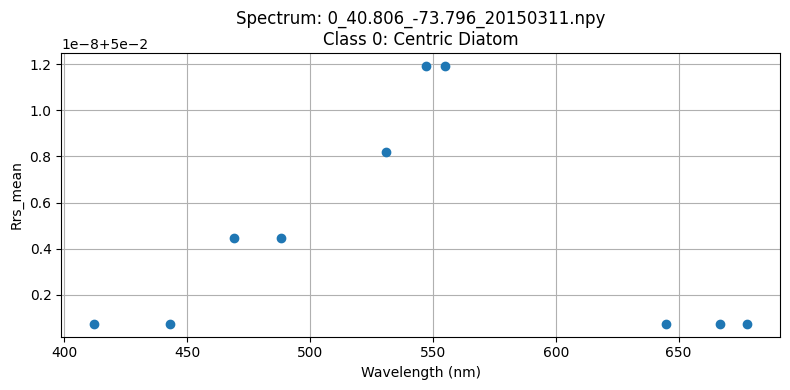

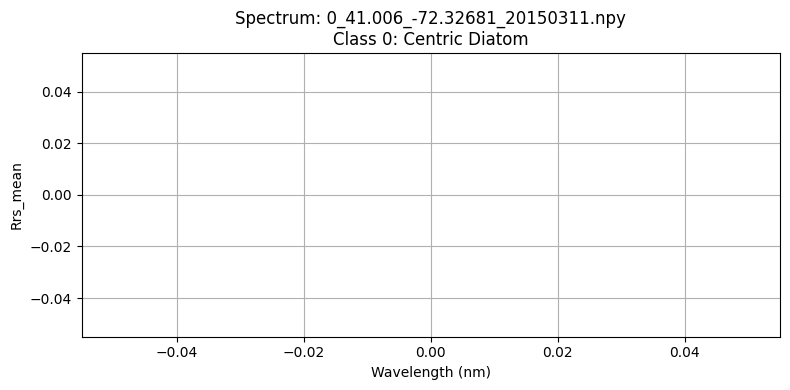

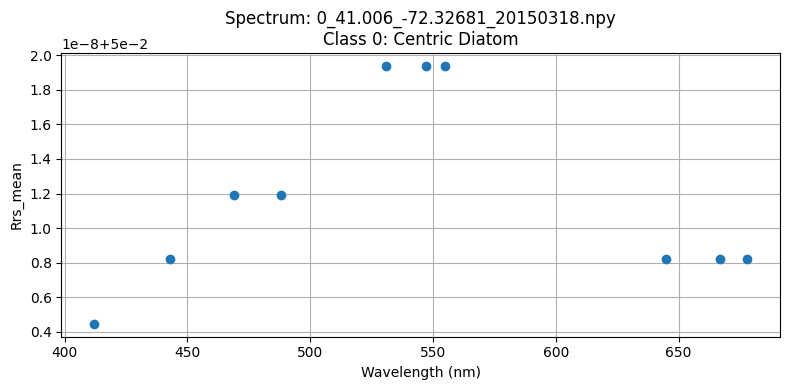

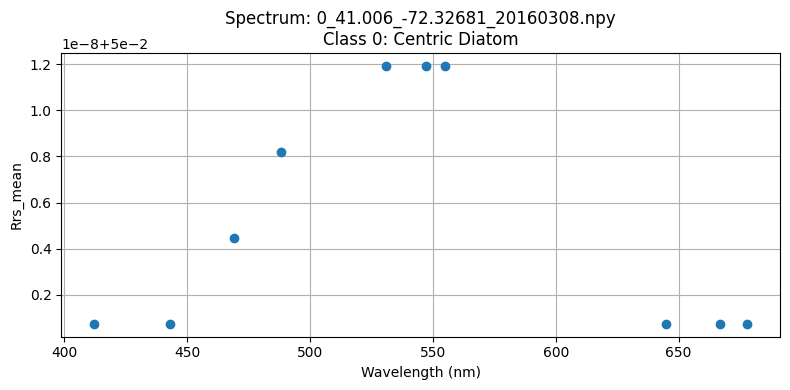

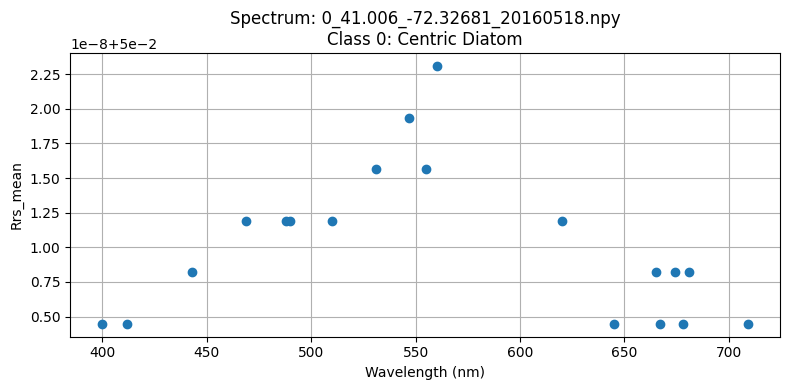

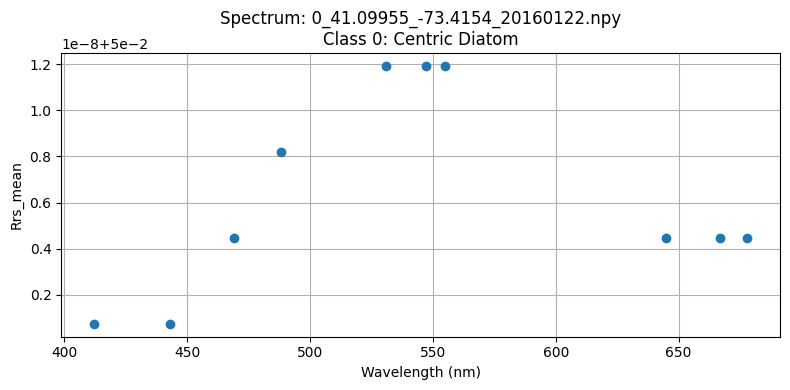

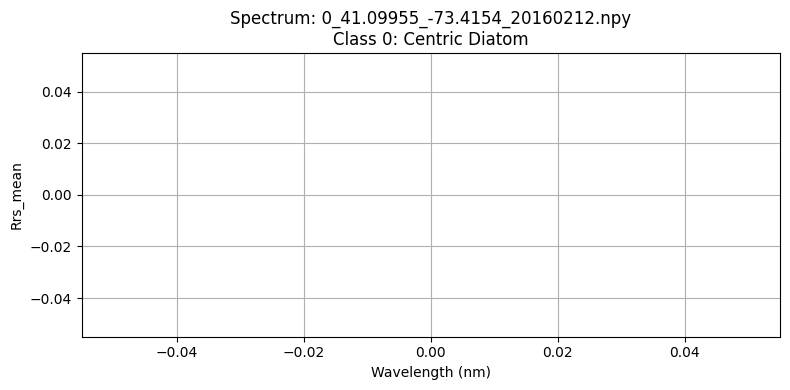

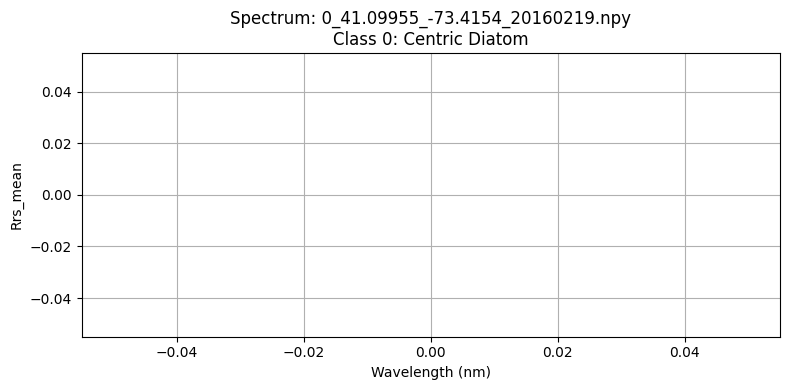

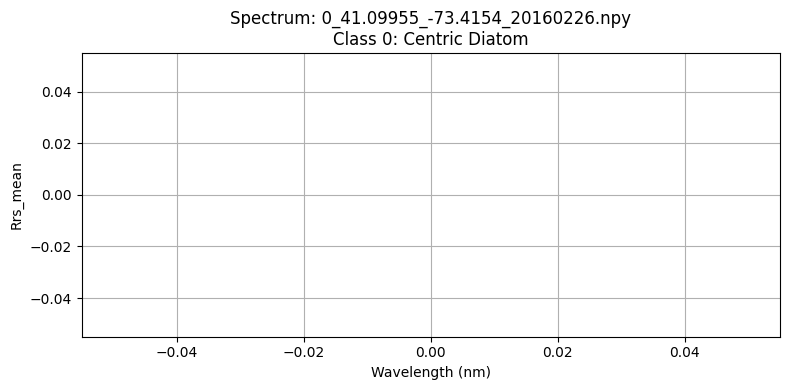

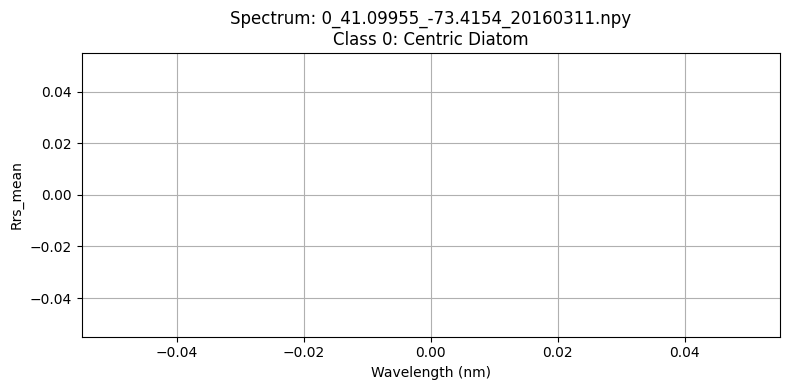

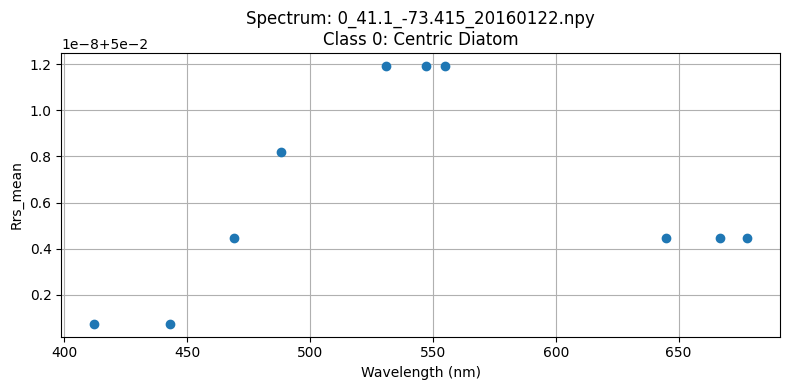

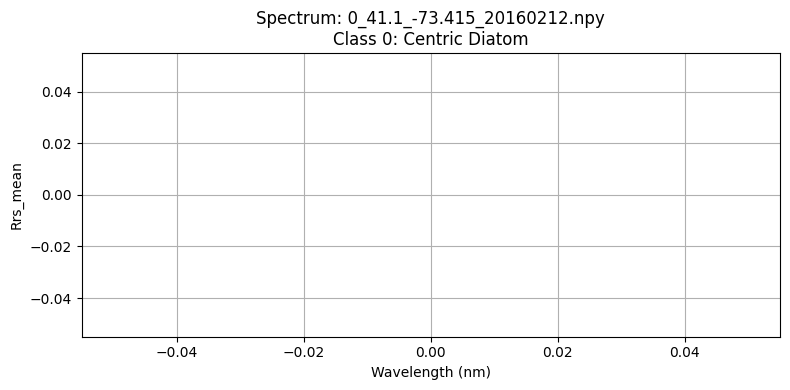

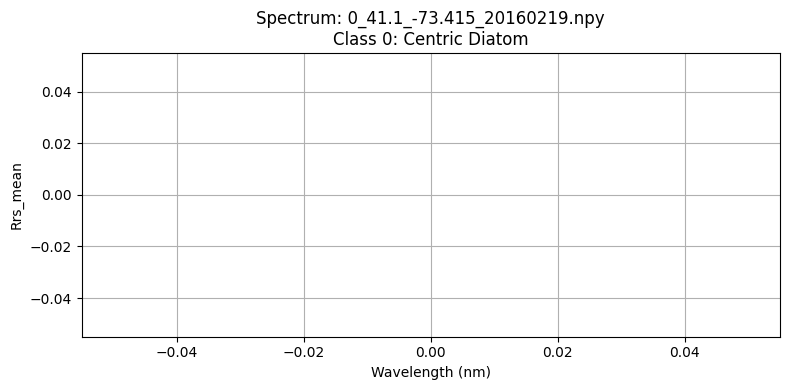

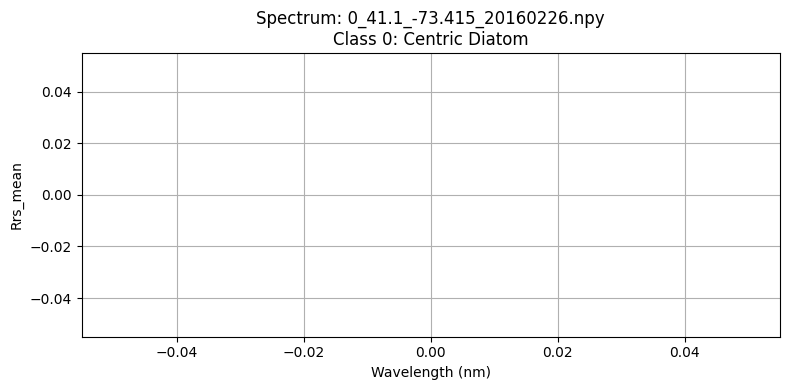

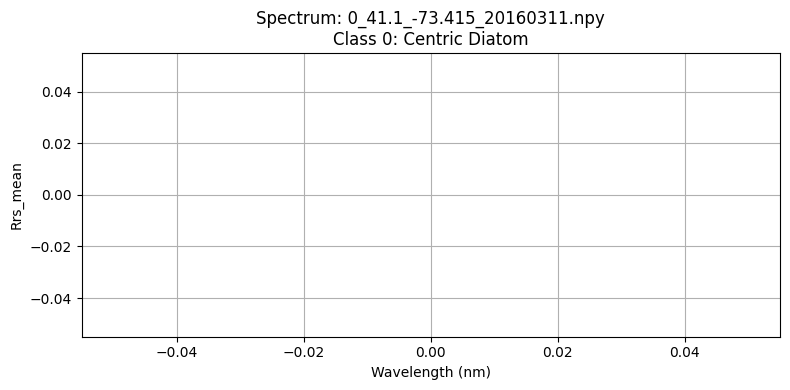

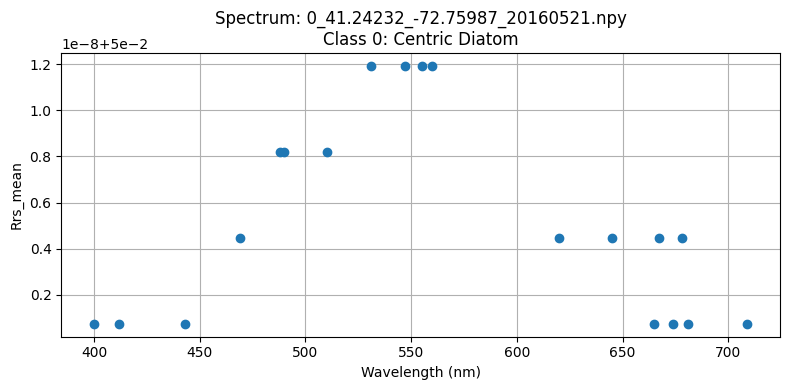

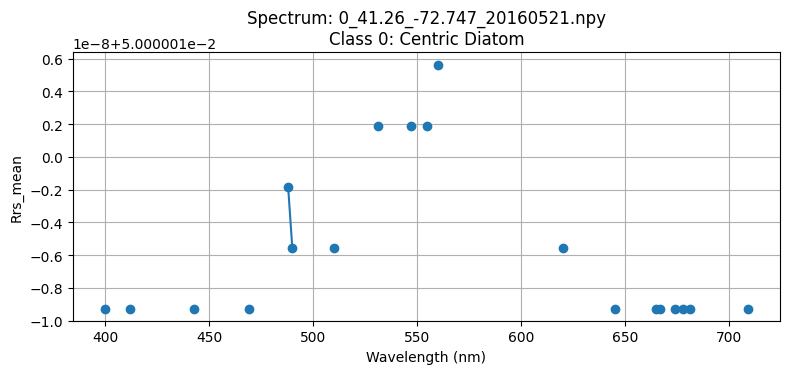

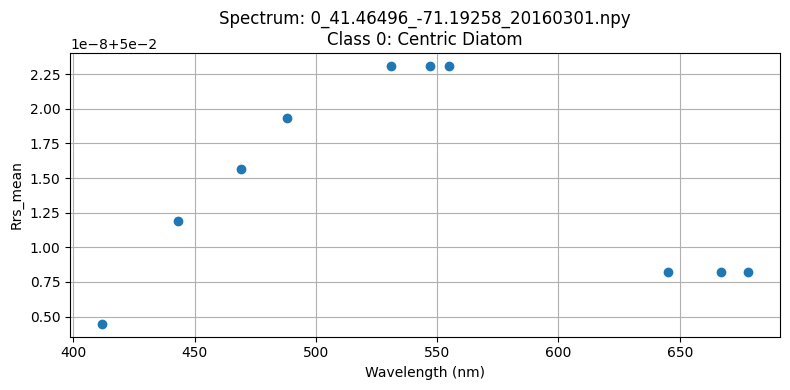

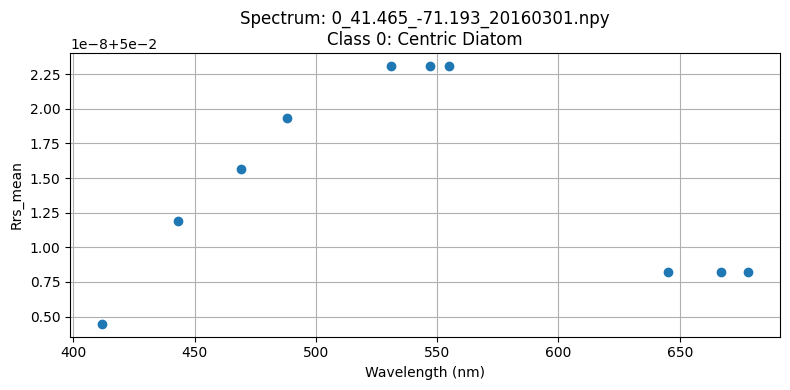

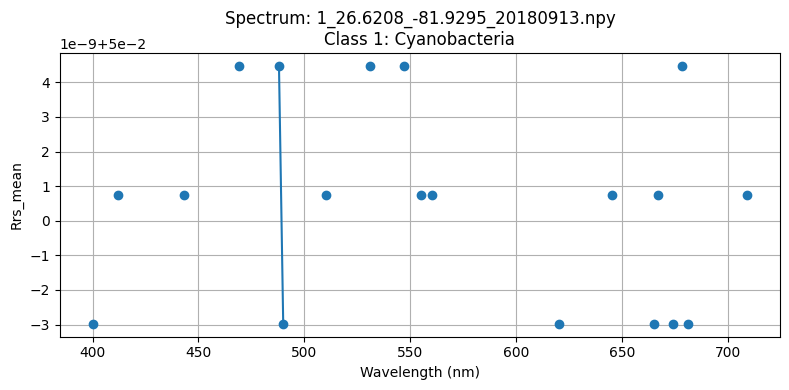

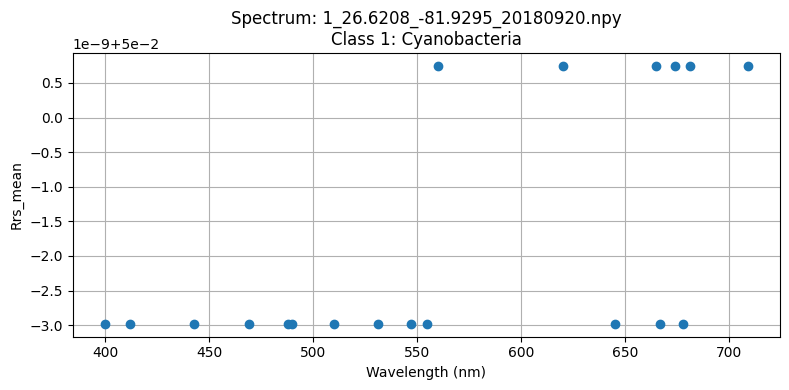

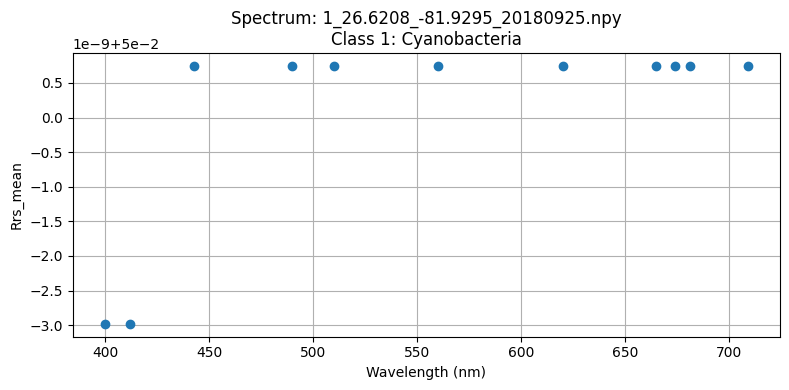

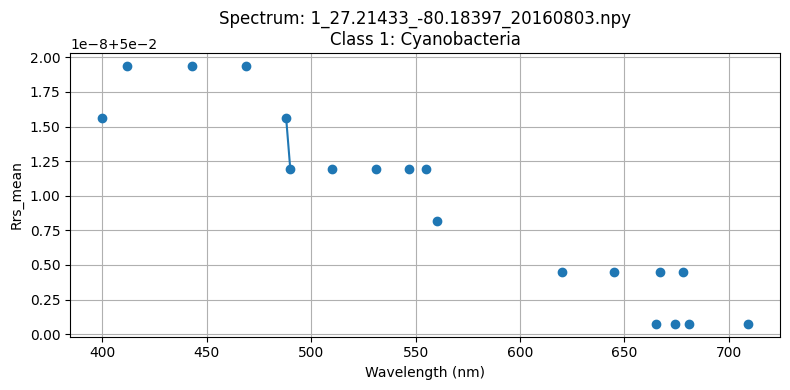

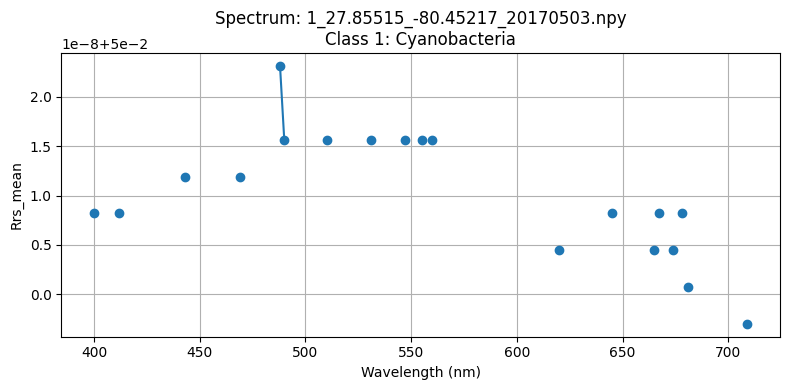

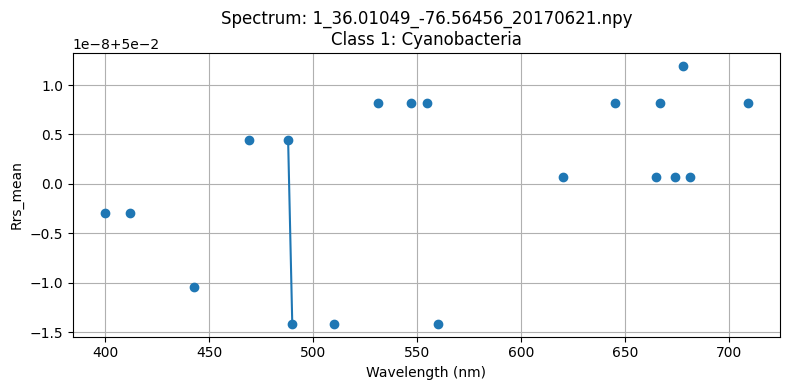

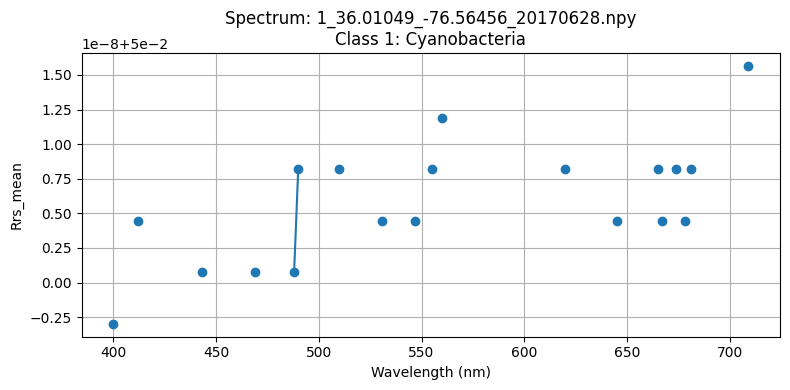

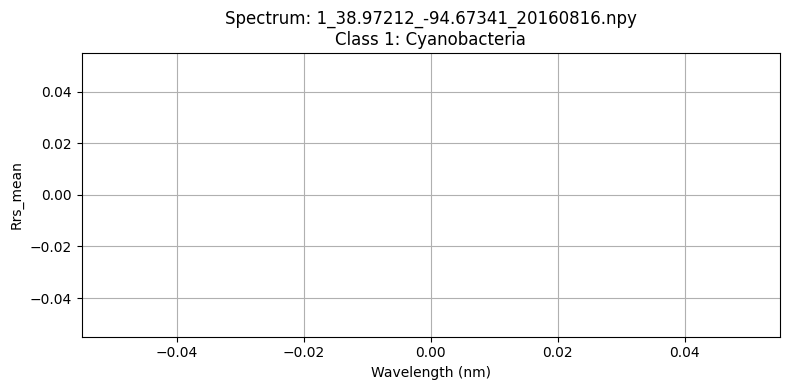

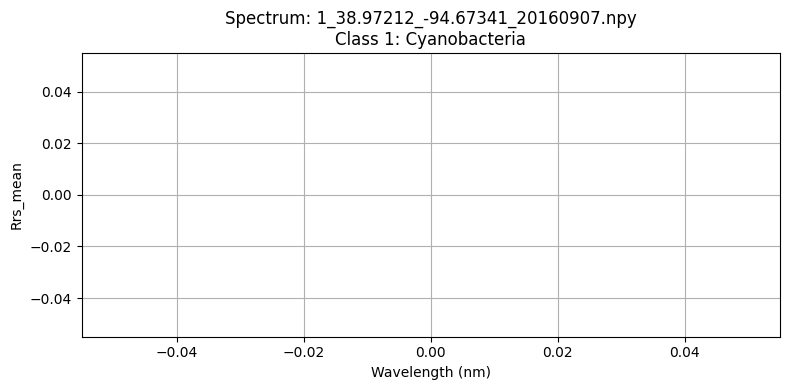

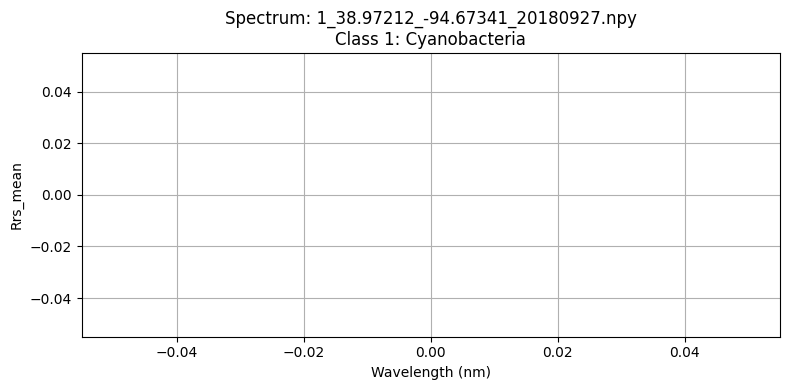

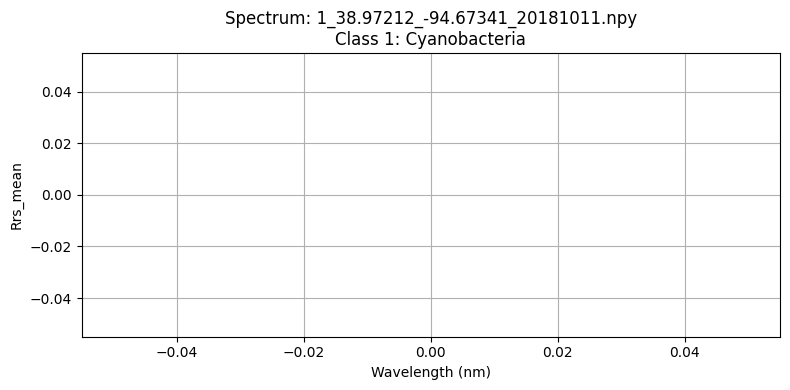

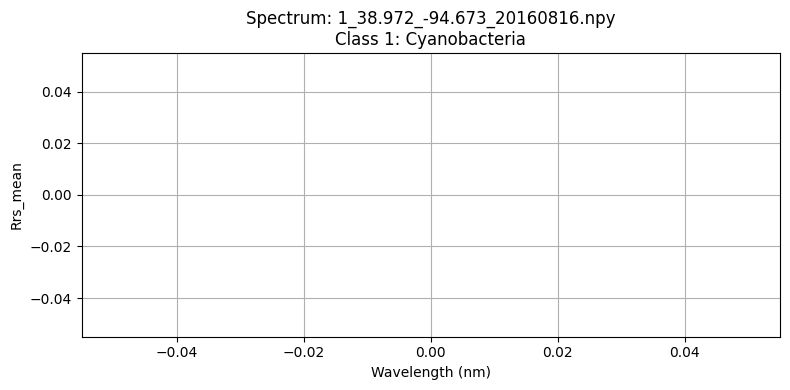

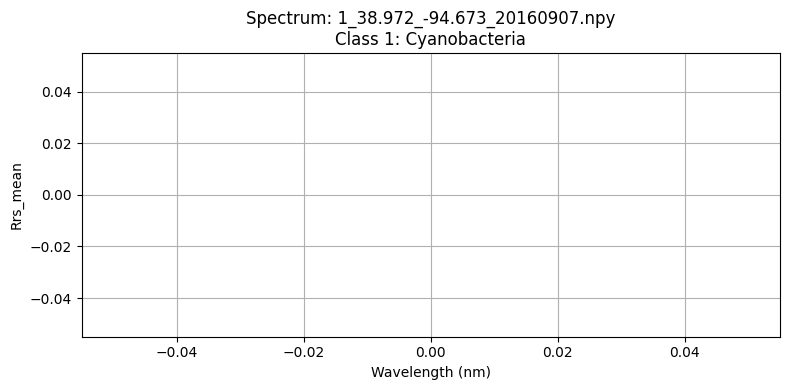

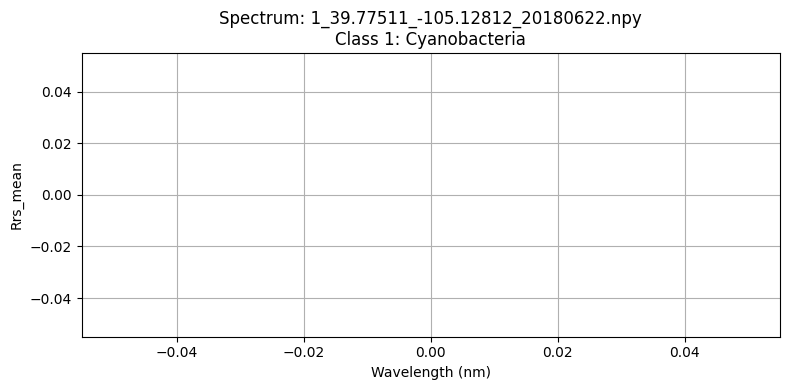

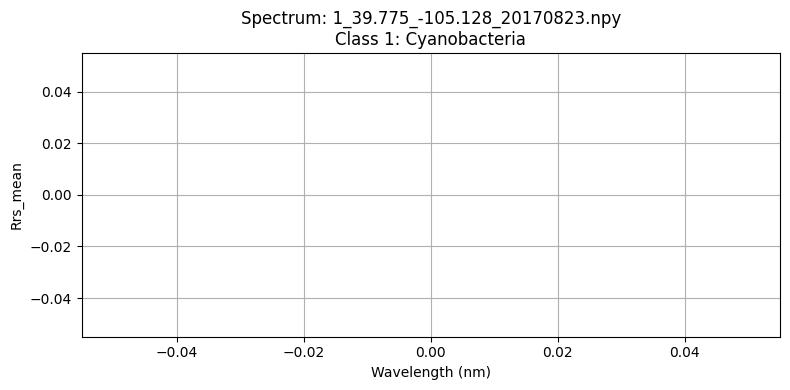

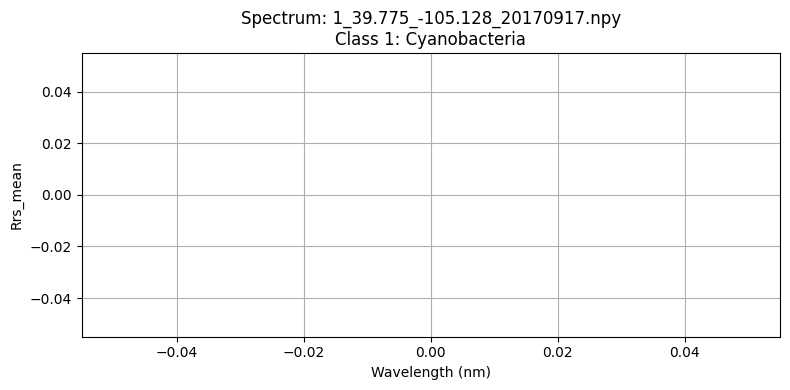

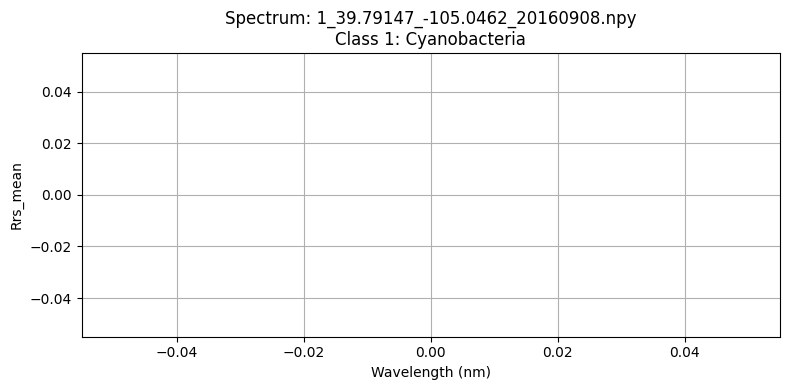

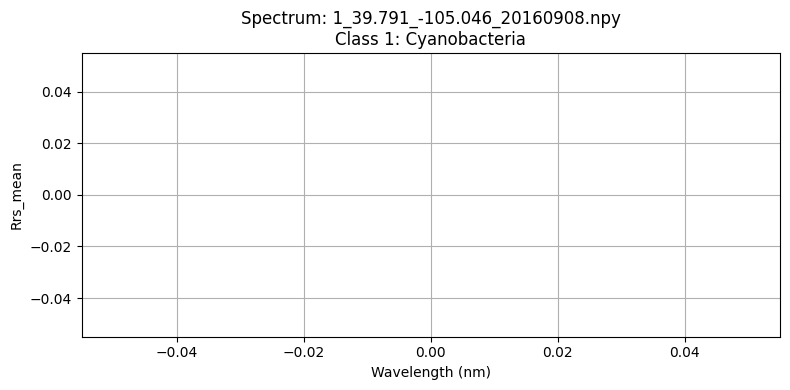

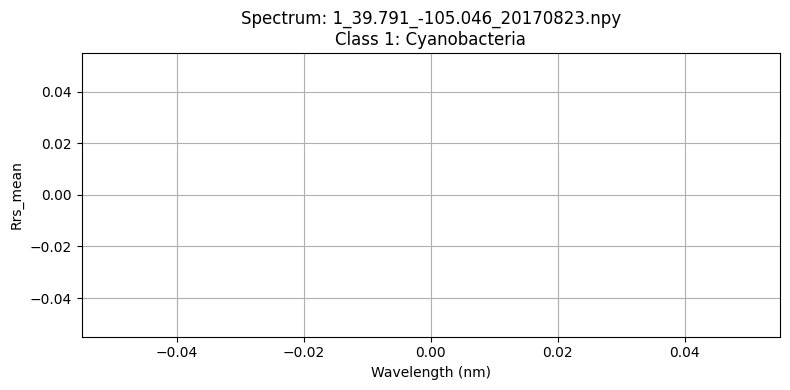

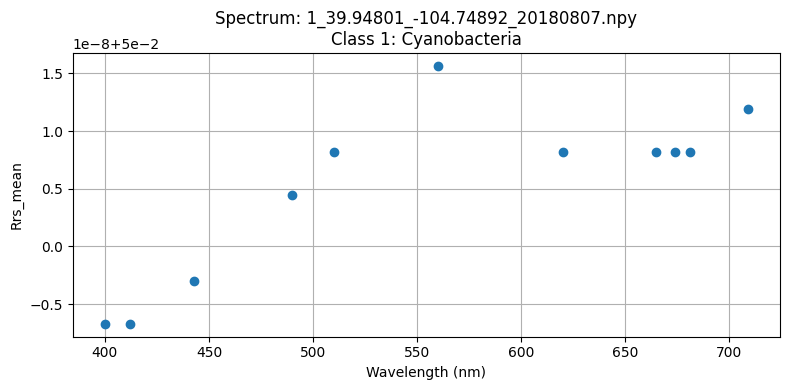

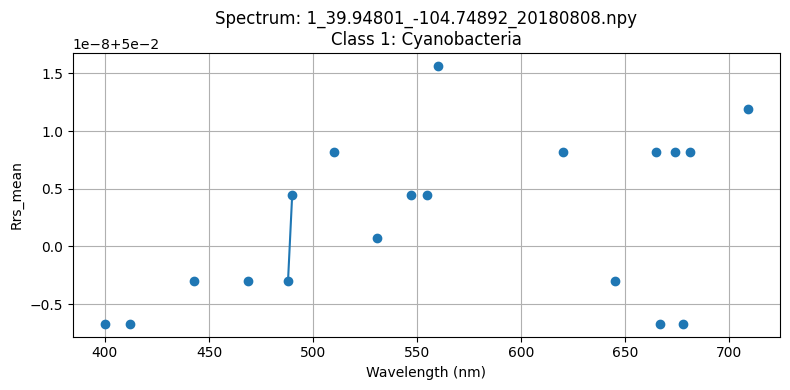

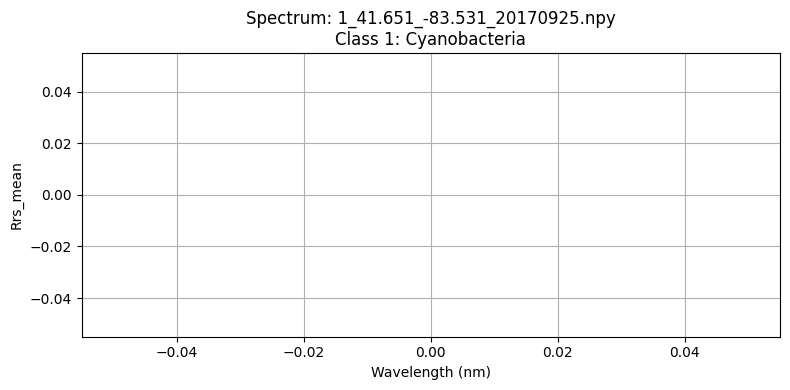

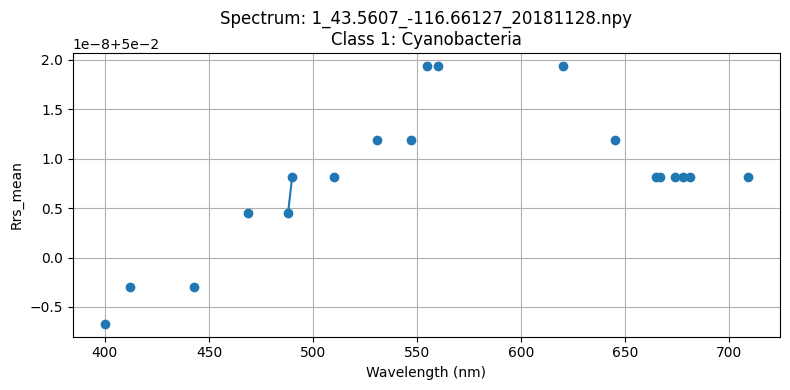

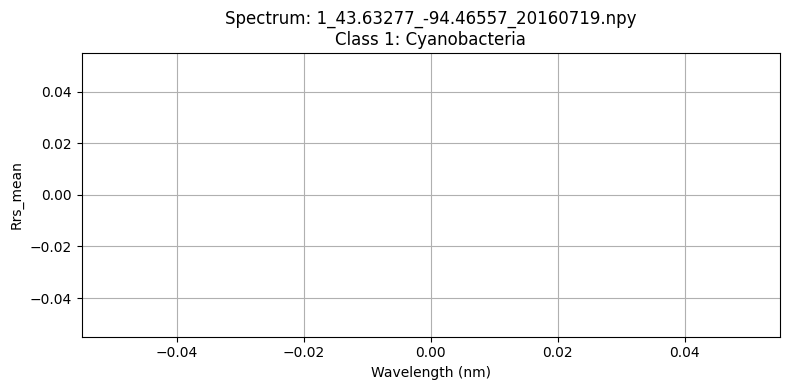

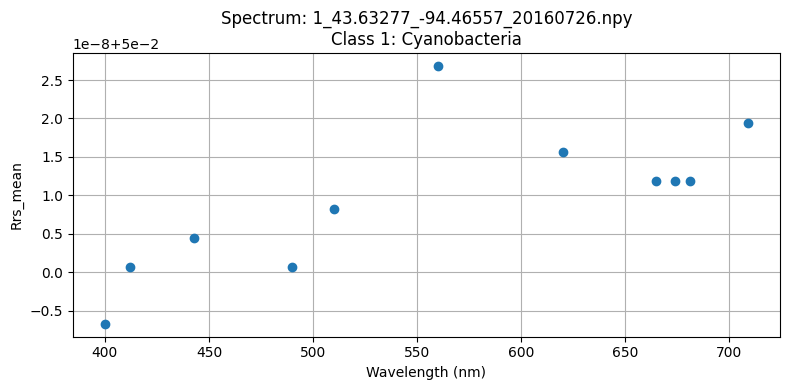

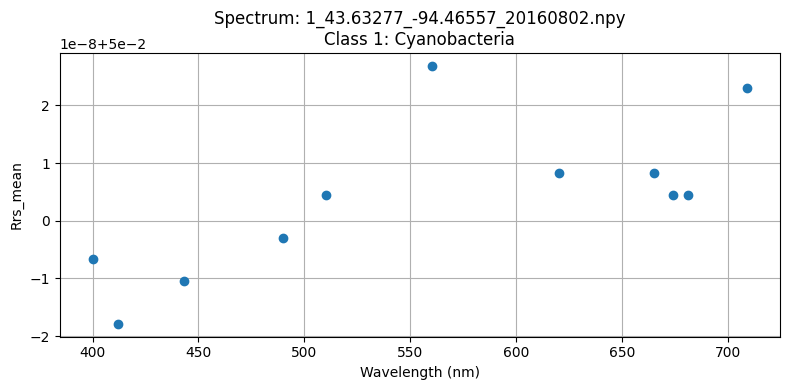

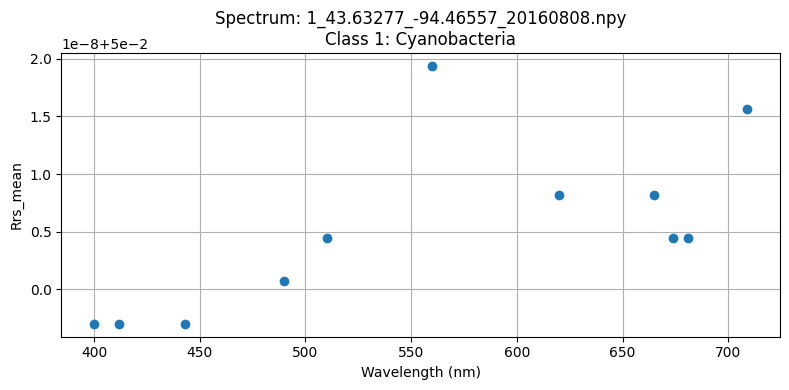

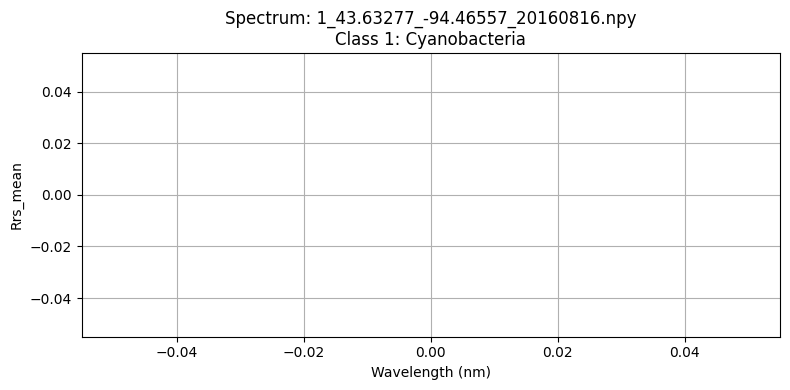

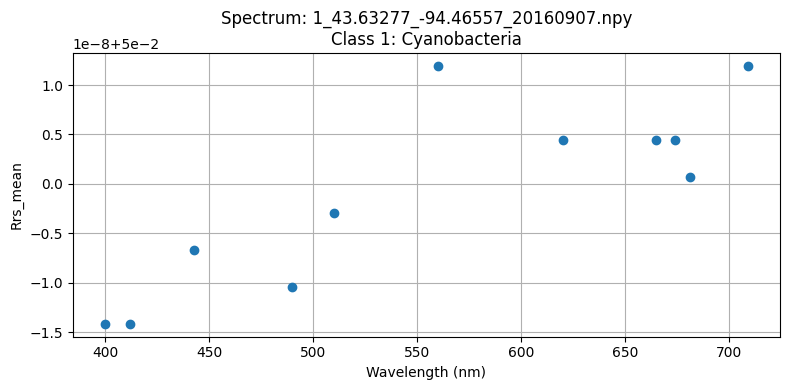

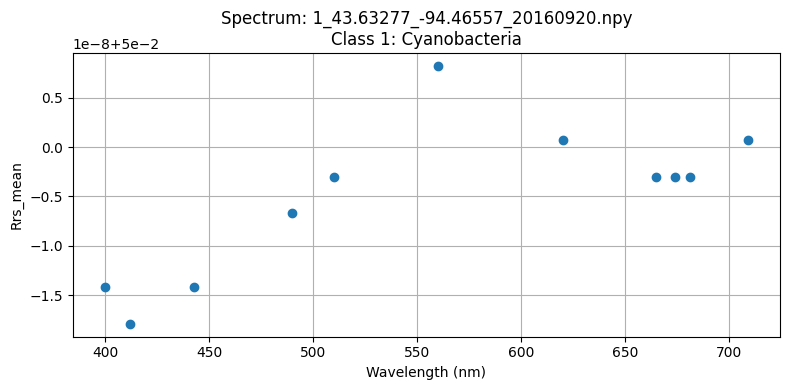

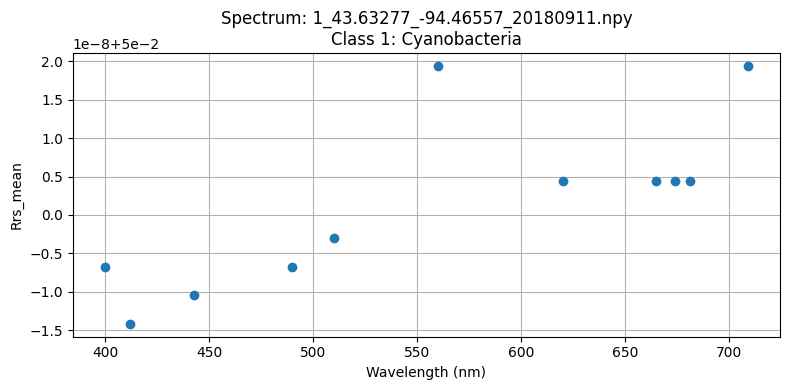

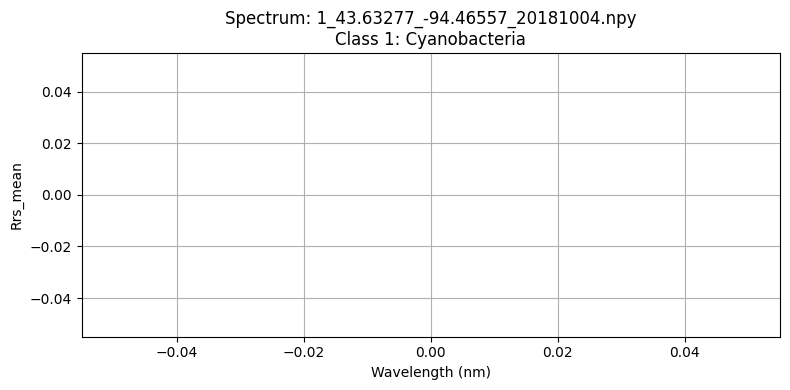

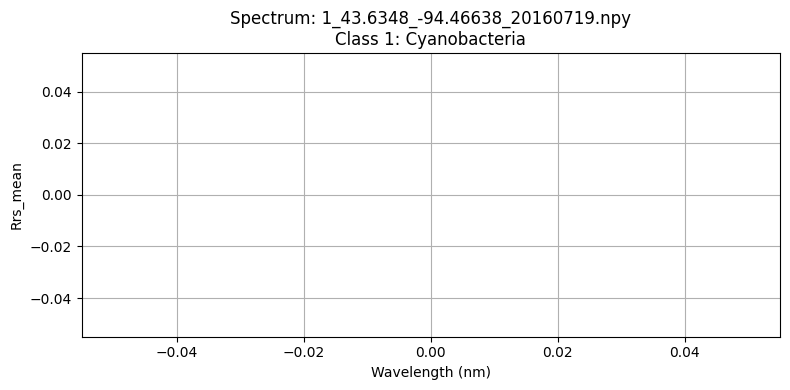

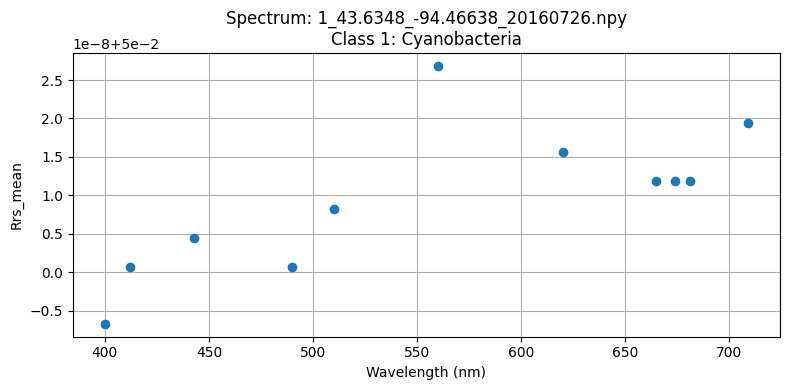

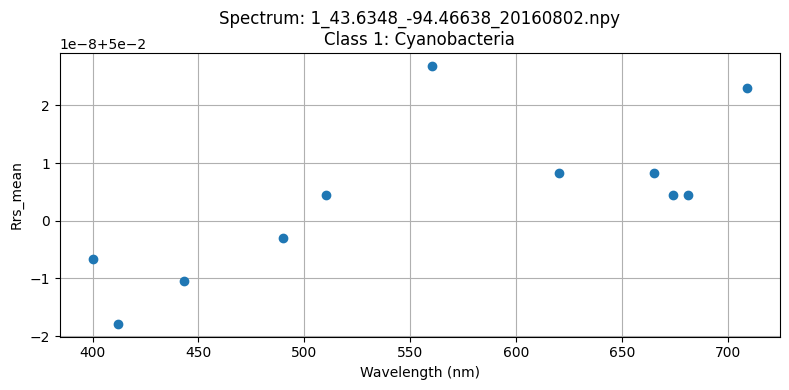

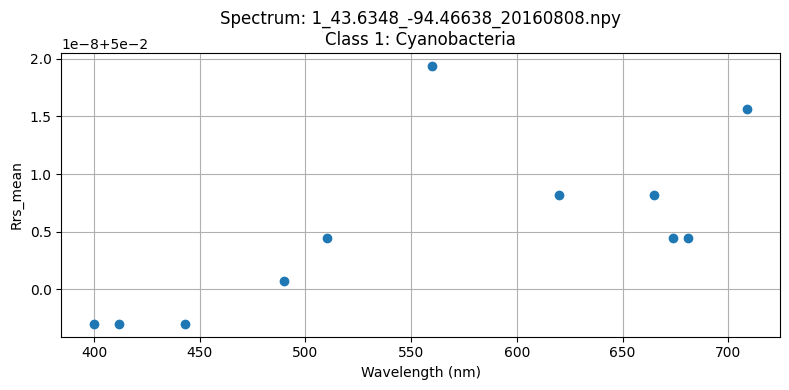

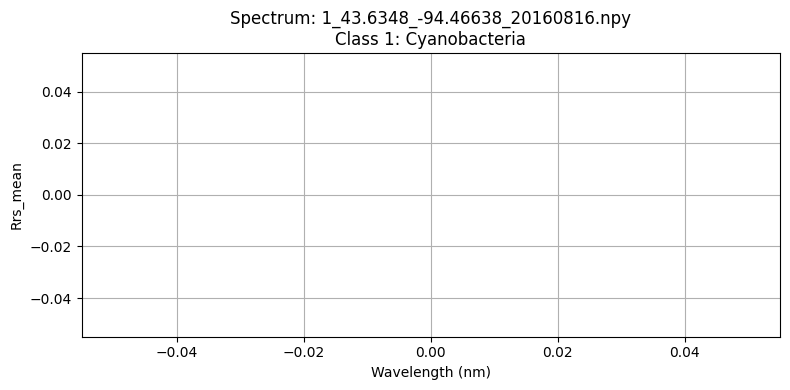

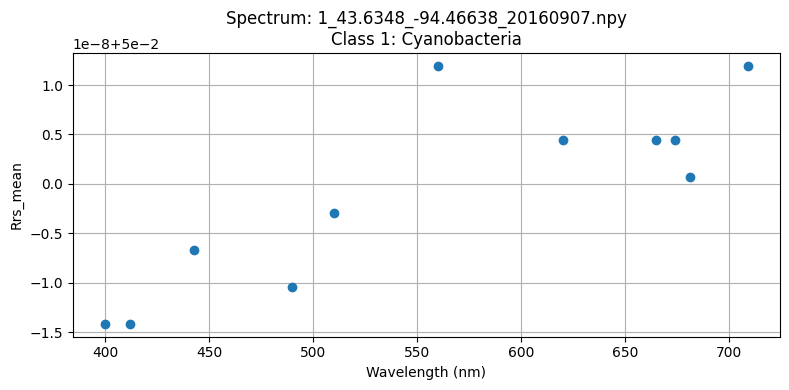

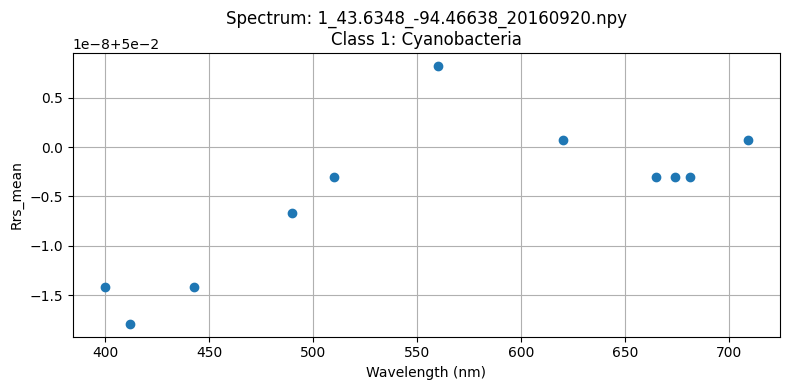

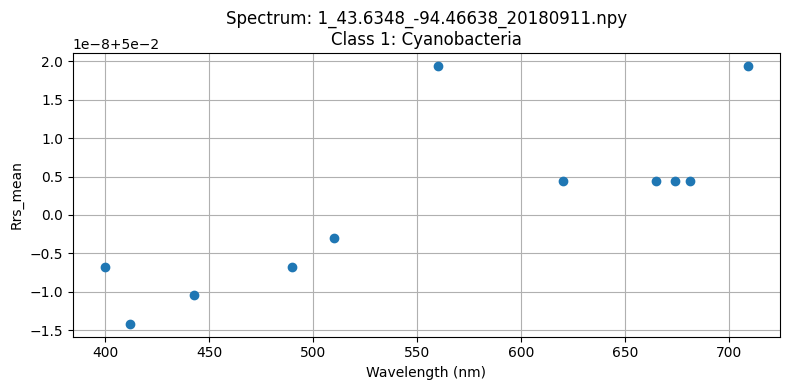

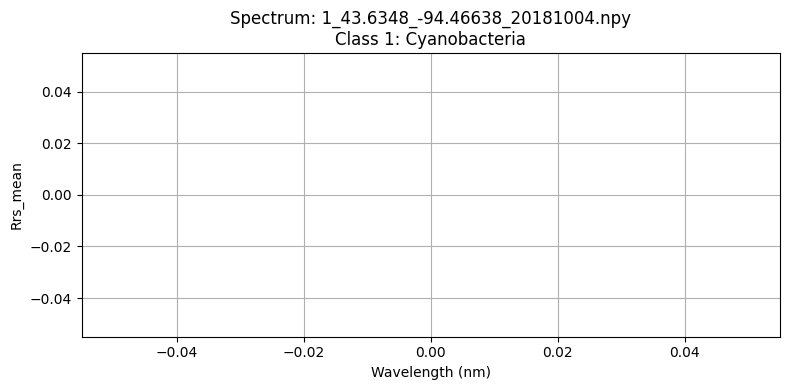

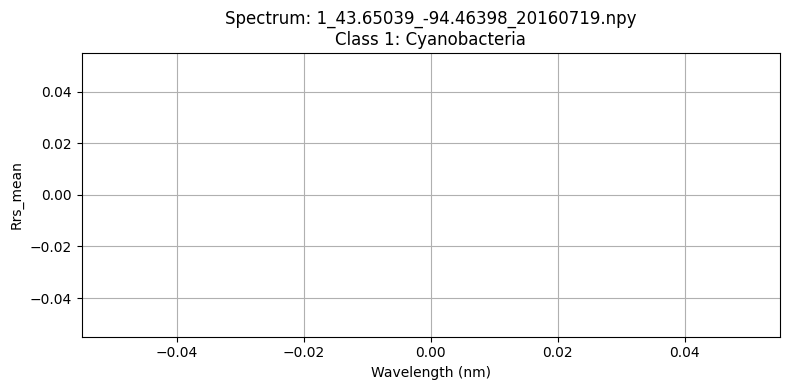

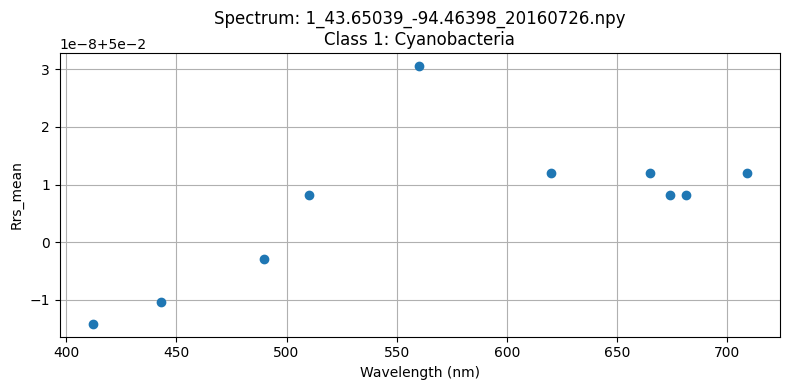

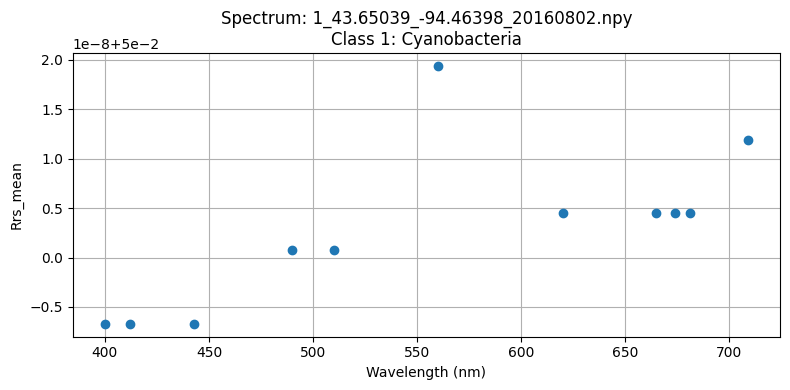

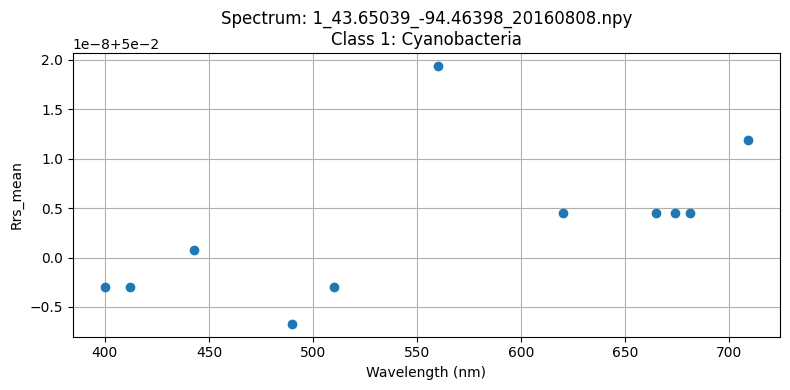

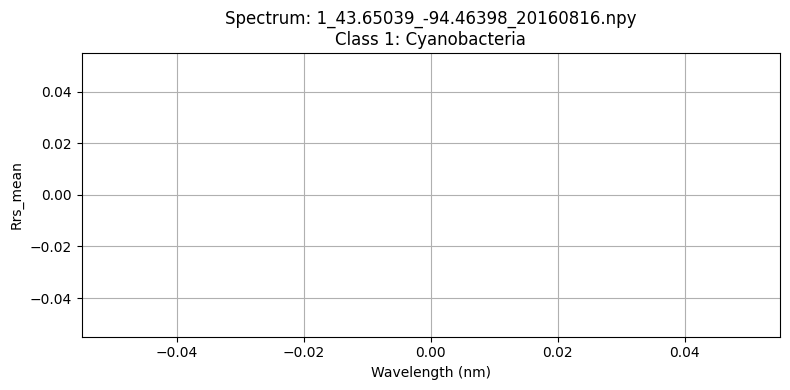

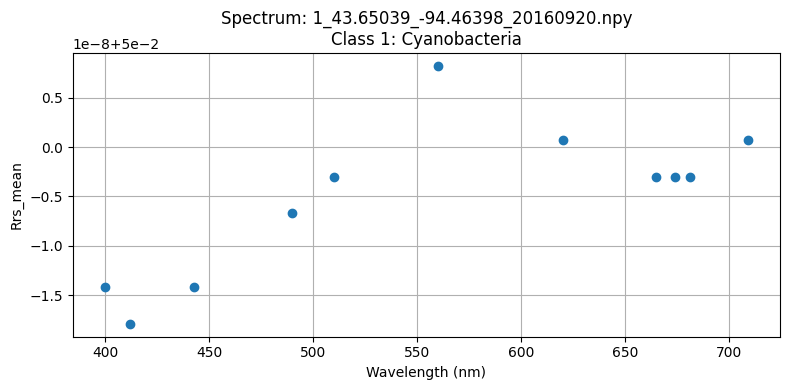

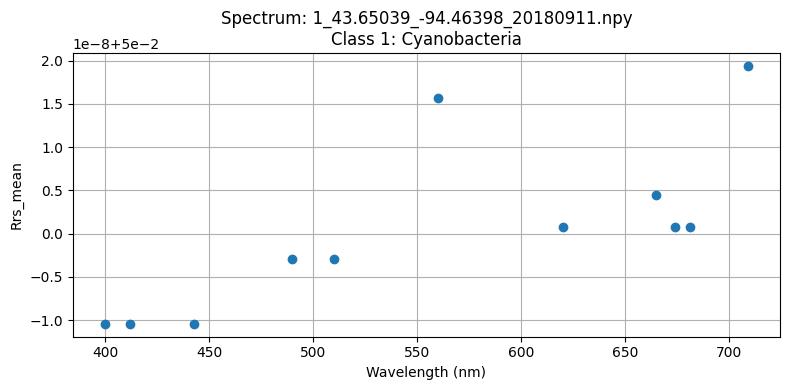

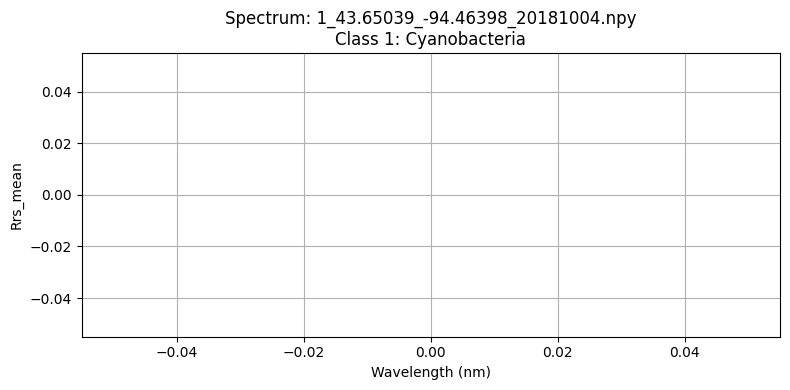

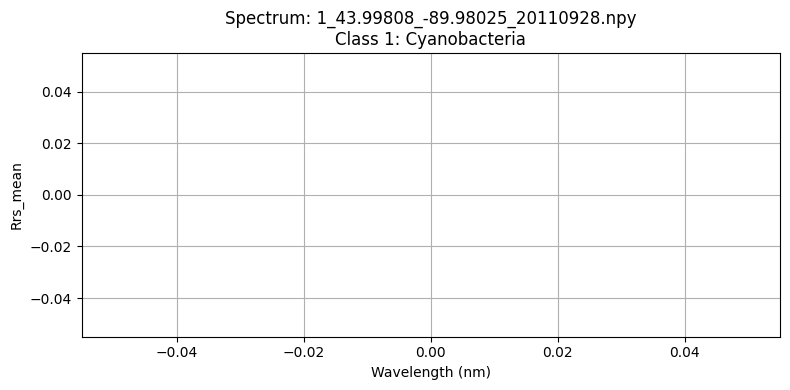

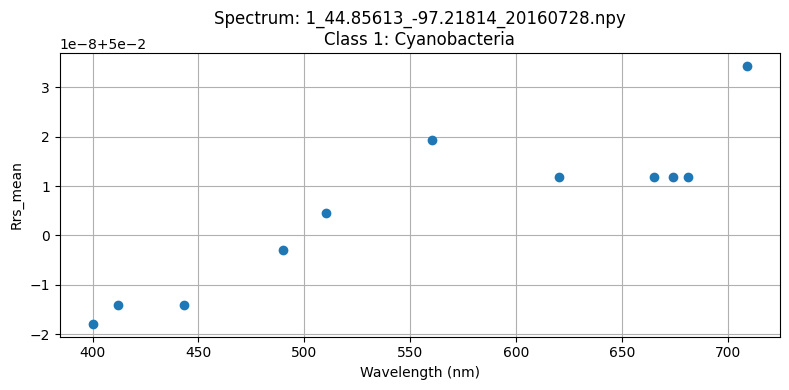

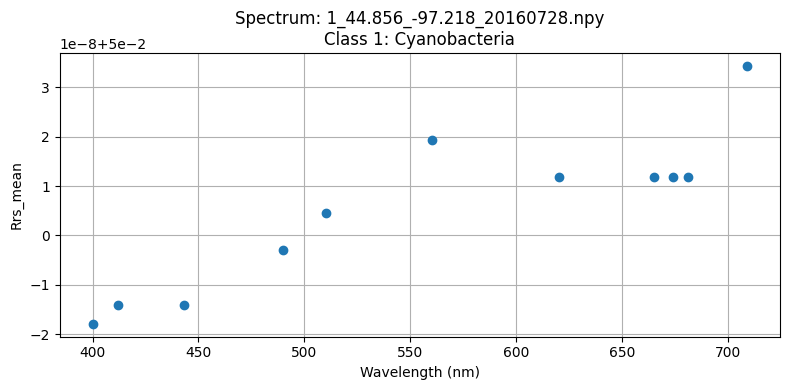

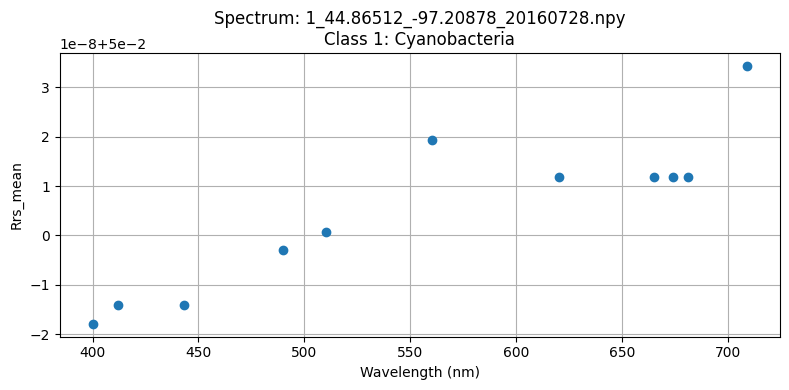

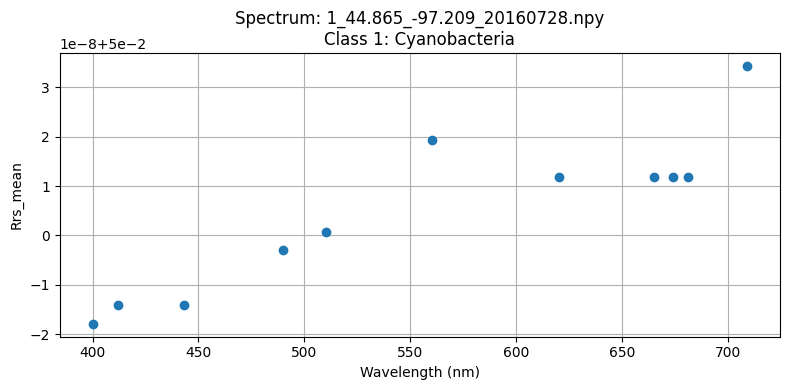

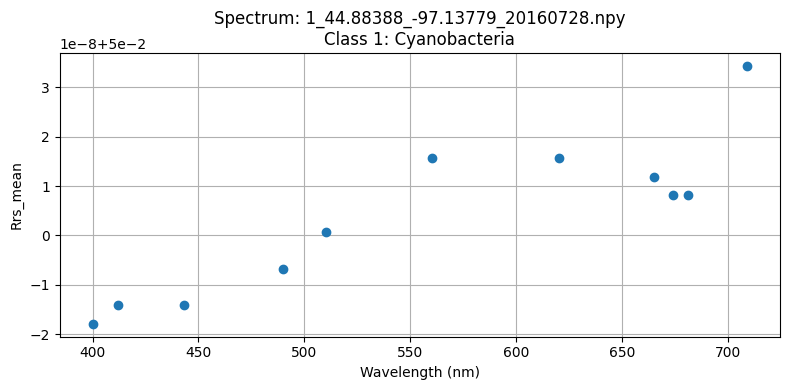

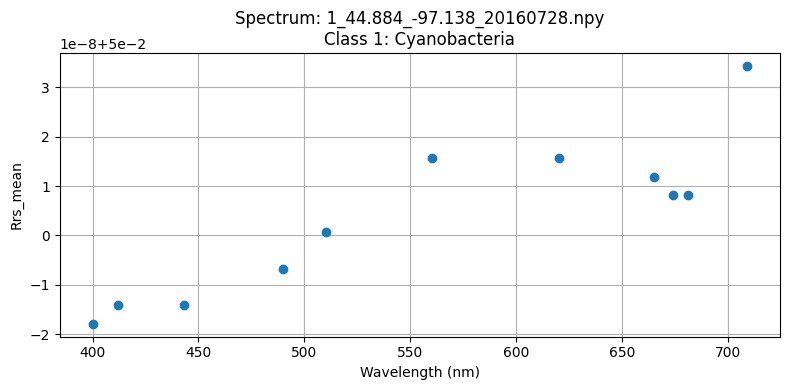

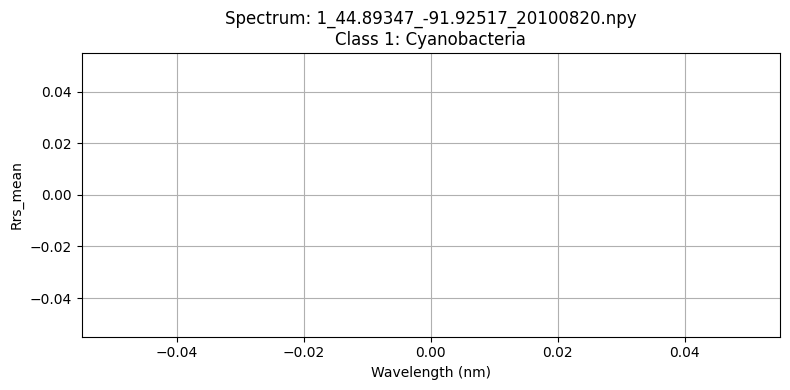

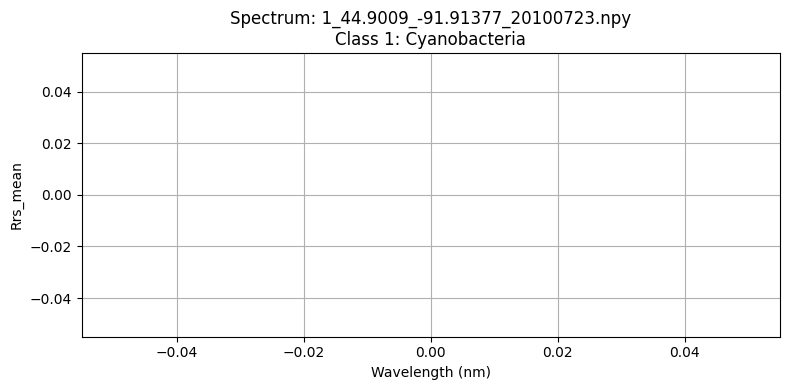

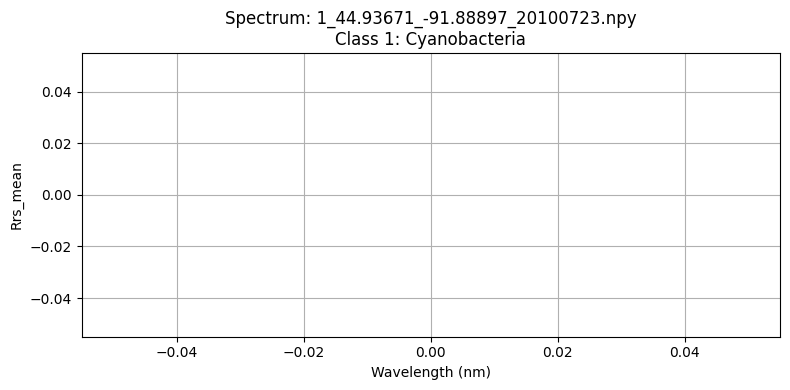

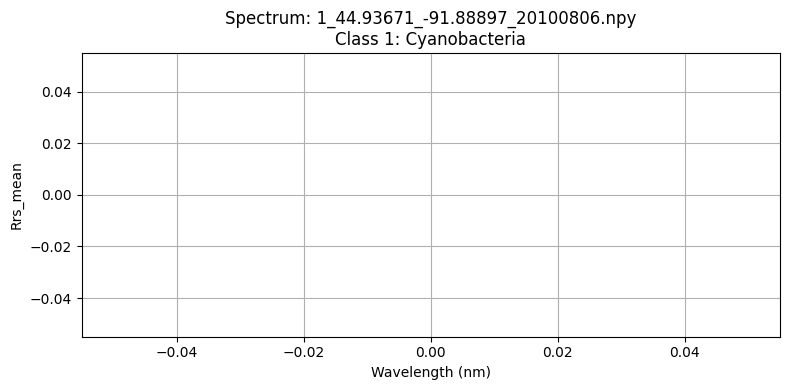

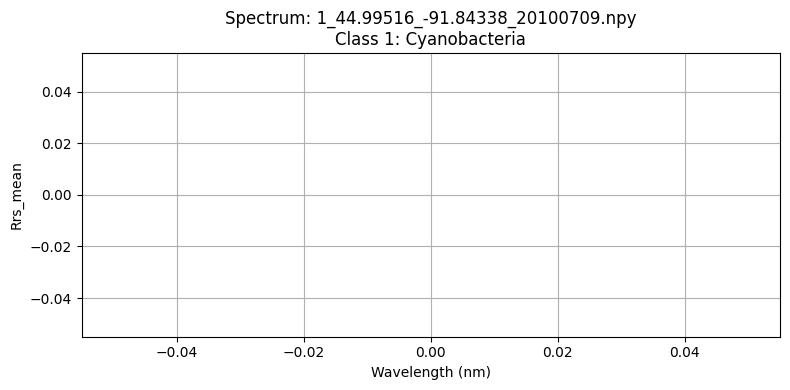

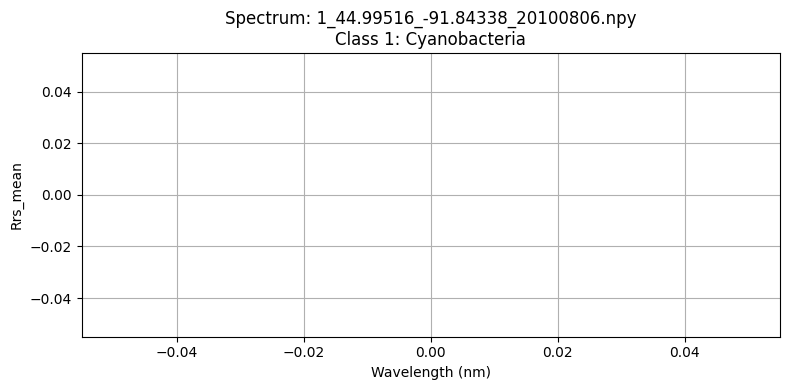

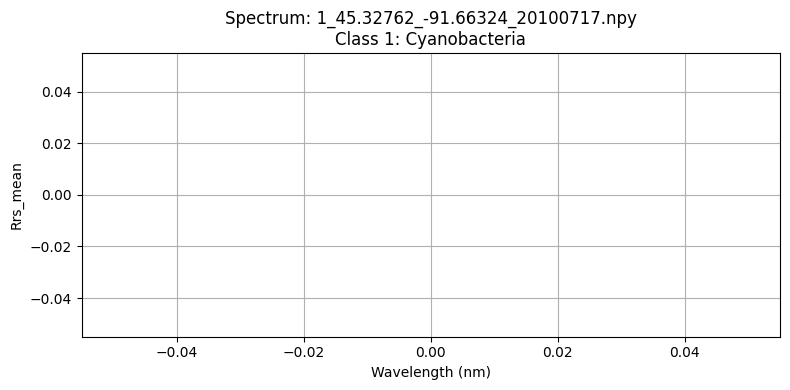

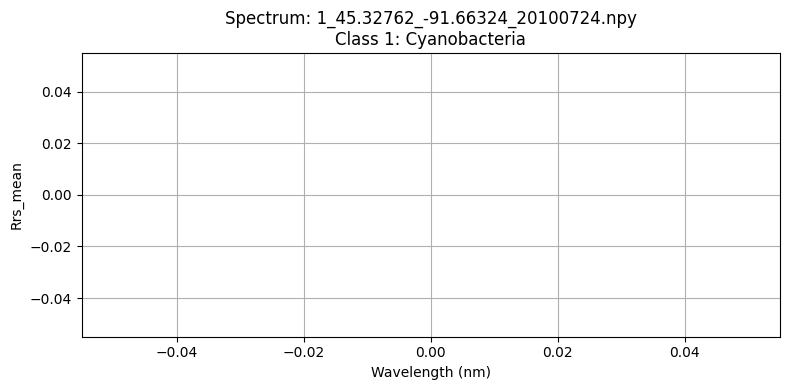

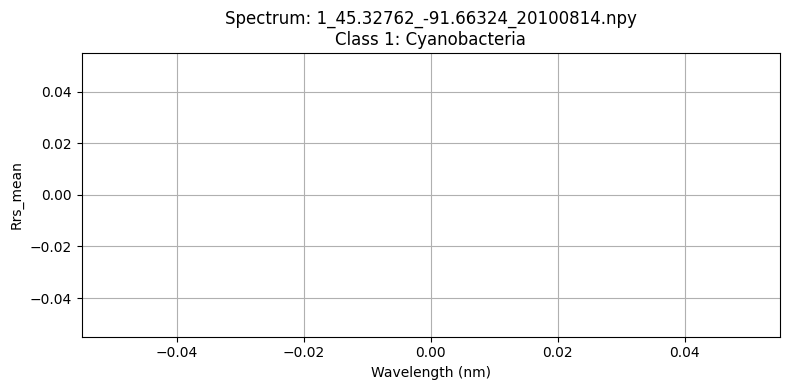

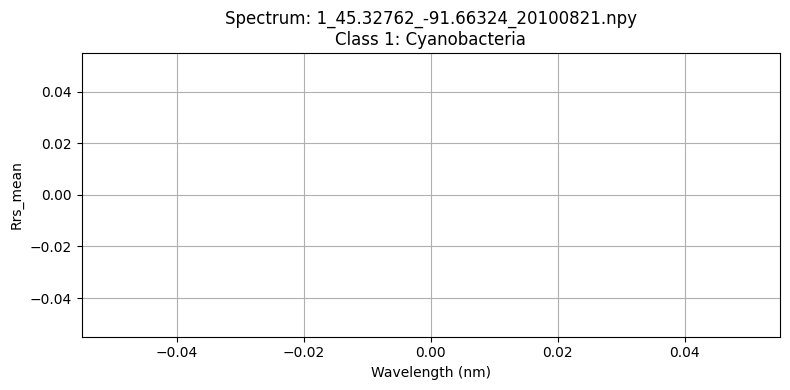

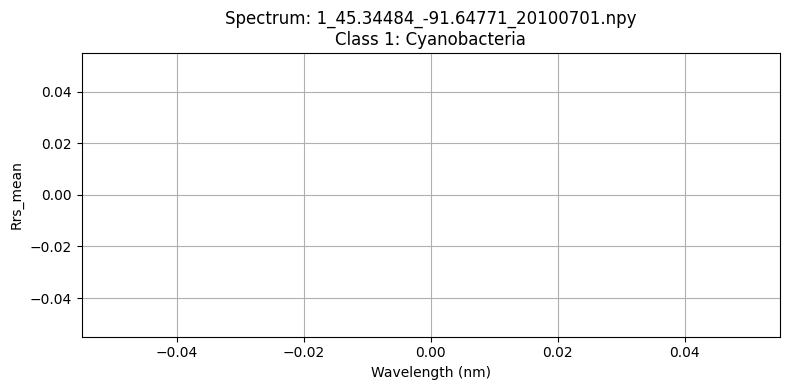

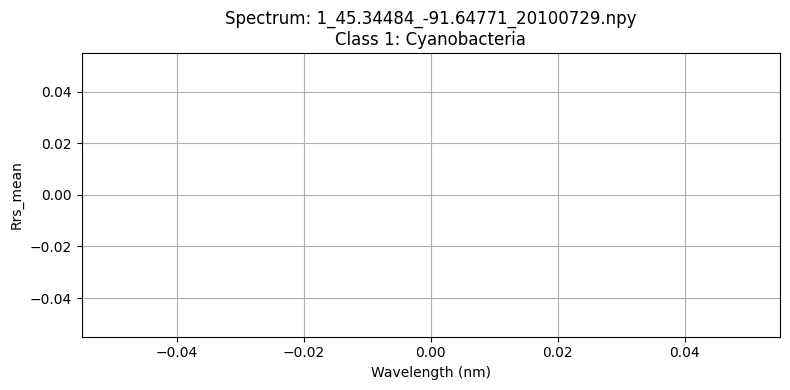

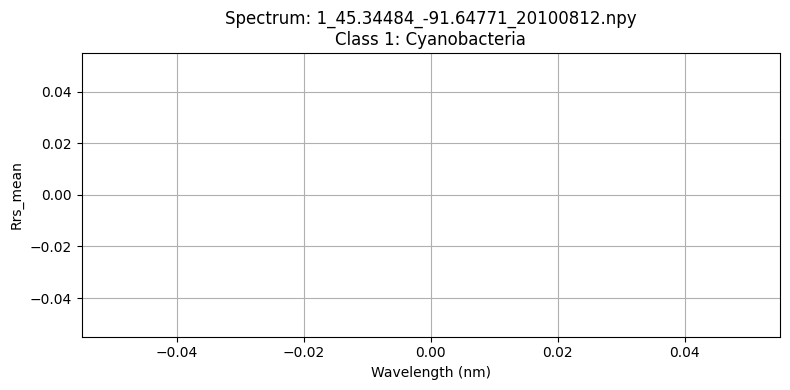

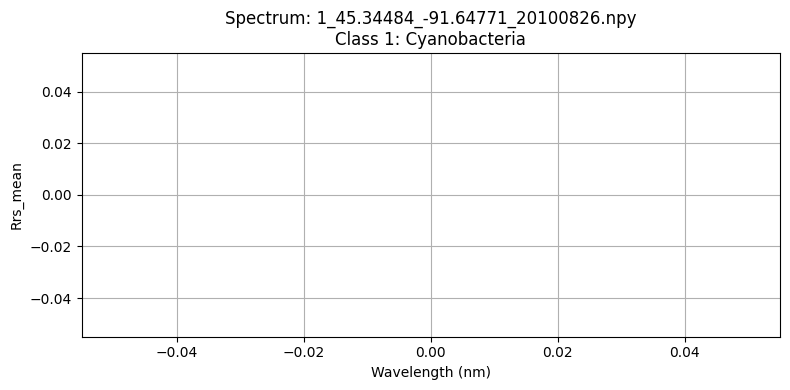

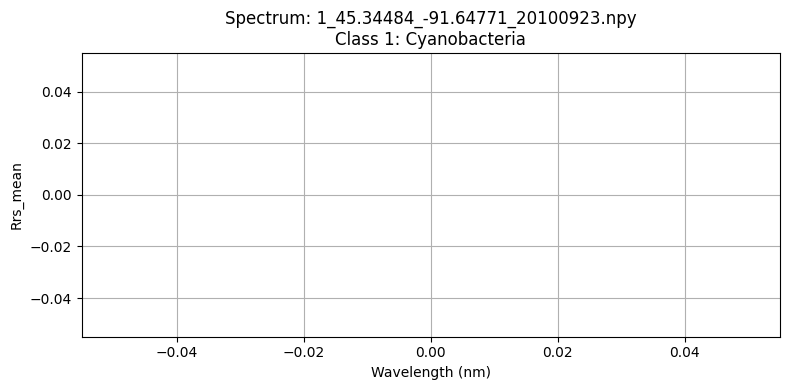

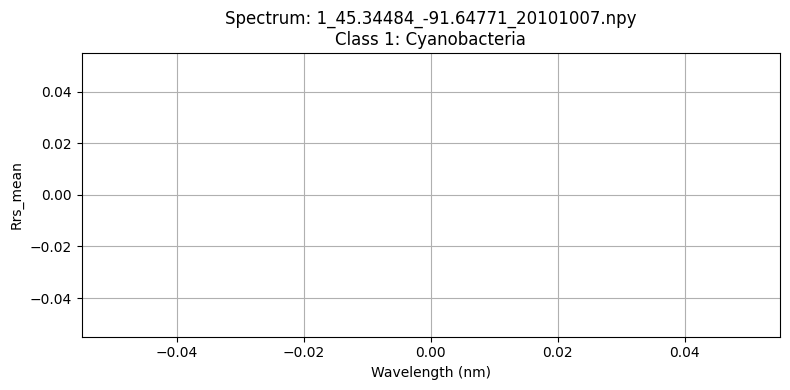

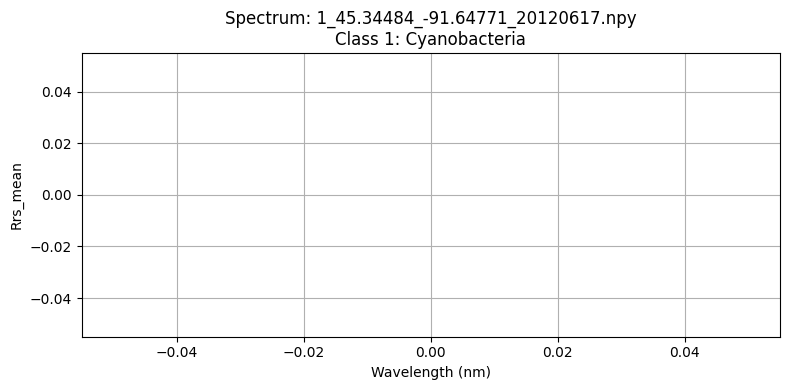

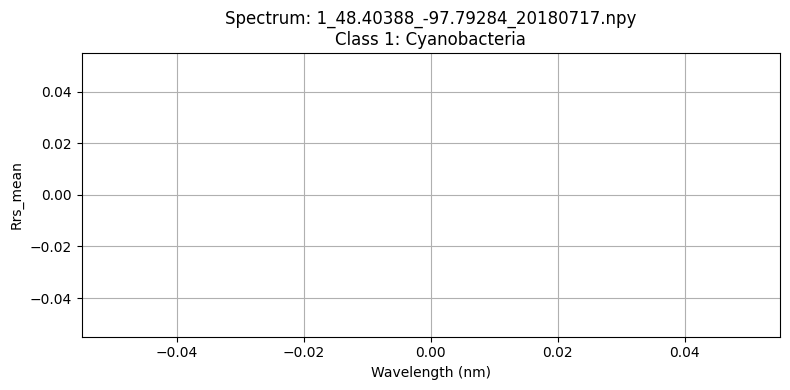

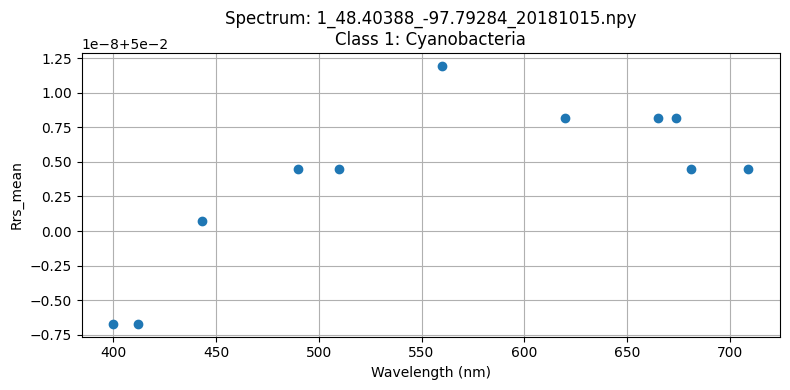

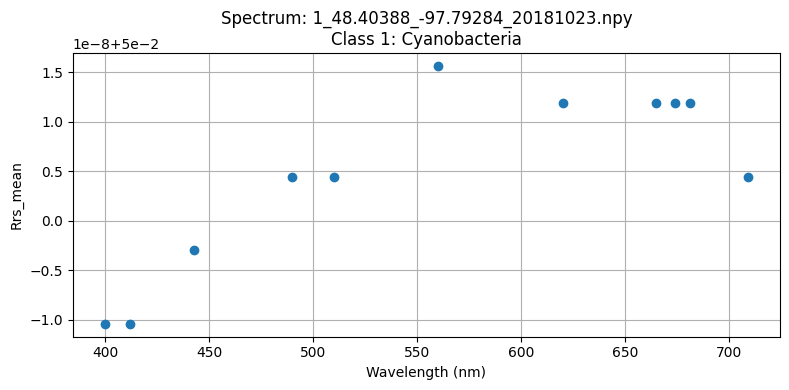

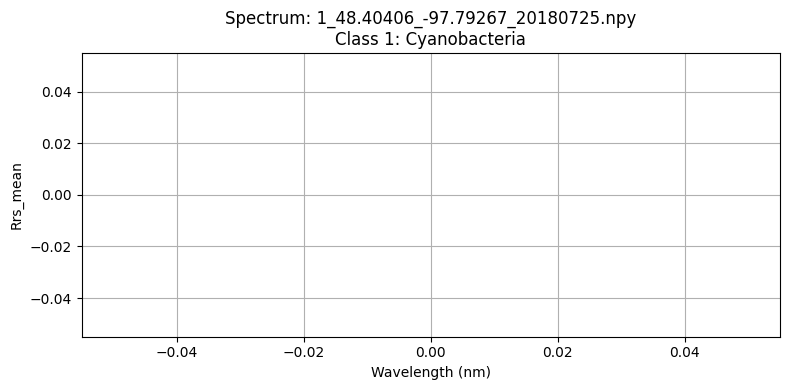

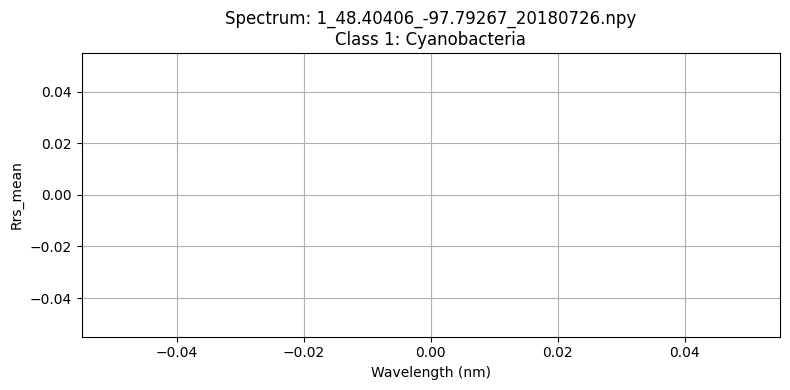

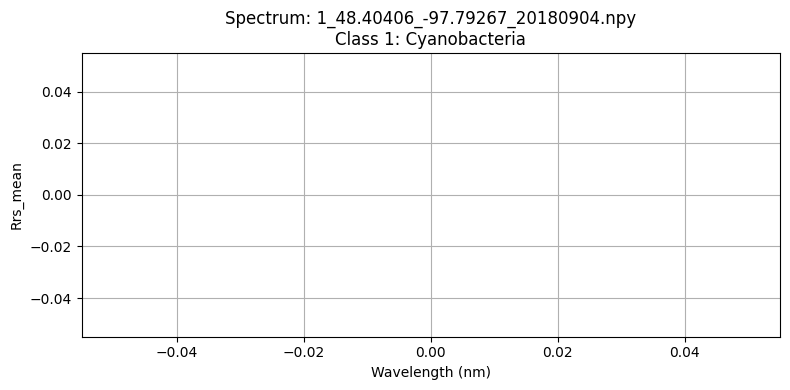

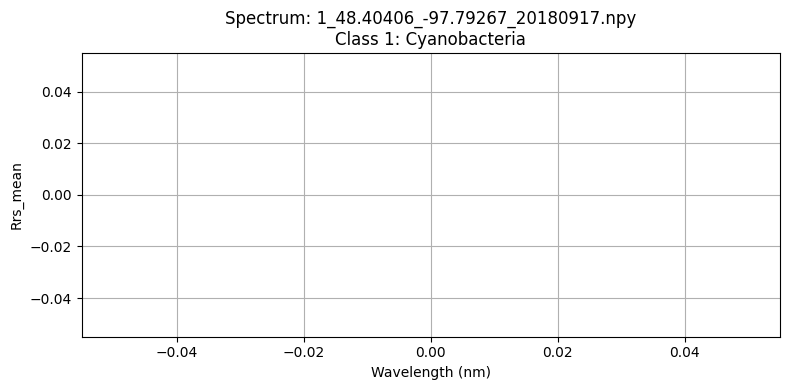

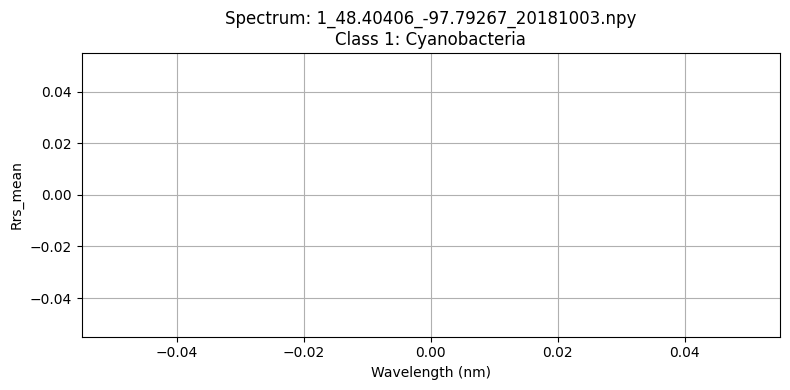

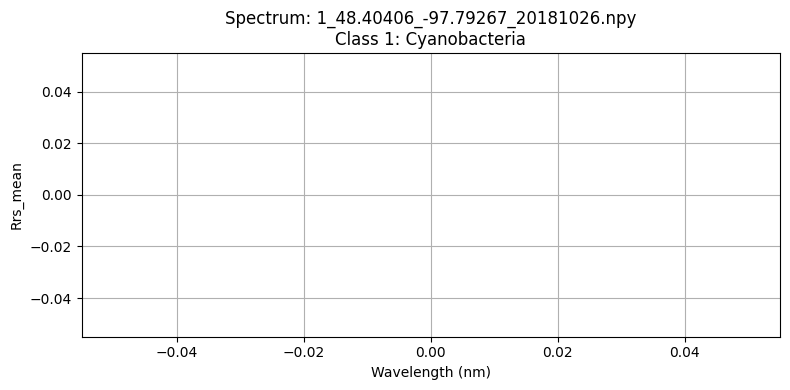

In [48]:
import numpy as np
import os
import glob
import json
import matplotlib.pyplot as plt

# Notebook cell: iterate through all .npy files in the data directory
data_dir = "../LabelData/data/"
wavelengths_path = "../LabelData/combined_wavelengths.npy"
labels_path = "../LabelData/label_to_species.json"

# Load wavelengths
if not os.path.exists(wavelengths_path):
    raise FileNotFoundError(f"Wavelength file not found: {wavelengths_path}")
wavelengths = np.load(wavelengths_path)

# Load label map if available
label_map = {}
if os.path.exists(labels_path):
    try:
        with open(labels_path, "r") as f:
            label_map = json.load(f)
    except Exception as e:
        print(f"Warning: could not read label map: {e}")

# Find all .npy files
npy_files = sorted(glob.glob(os.path.join(data_dir, "*.npy")))
if not npy_files:
    print(f"No .npy files found in {data_dir}")
else:
    for file_path in npy_files:
        try:
            data = np.load(file_path, allow_pickle=True).item()
        except Exception as e:
            print(f"Skipping {file_path}: failed to load: {e}")
            continue

        if "algae_class" not in data or "Rrs_mean" not in data:
            print(f"Skipping {file_path}: unexpected contents: keys = {list(data.keys())}")
            continue

        class_id = data["algae_class"]
        spectrum = data["Rrs_mean"]
        class_name = label_map.get(str(class_id), str(class_id))

        # Plot spectrum
        plt.figure(figsize=(8, 4))
        plt.plot(wavelengths, spectrum, marker="o", linestyle="-")
        plt.title(f"Spectrum: {os.path.basename(file_path)}\nClass {class_id}: {class_name}")
        plt.xlabel("Wavelength (nm)")
        plt.ylabel("Rrs_mean")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [21]:
from netCDF4 import Dataset

data_dir = "../Data/"
for file in os.listdir(data_dir):
    if "201708" in file:
        print(file)
        print("##############")
        path = data_dir + file
        #path = "../Data/AQUA_MODIS.20170823T205001.L2.OC.nc"
        ds = Dataset(path, "r")
        
        # For MODIS: group 'geophysical_data', variable names like 'Rrs_488'
        # For Sentinel: same group
        group = ds.groups.get("geophysical_data", None)
        if group is None:
            print("No geophysical_data group found")
        else:
            for varname in group.variables:
                if varname.startswith("Rrs_"):
                    var = group.variables[varname]
                    print(f"Variable: {varname}")
                    # Attributes
                    for attr in ["_FillValue", "fill_value", "valid_range", "scale_factor", "add_offset"]:
                        if hasattr(var, "getncattr"):
                            try:
                                val = var.getncattr(attr)
                                print(f"  {attr}: {val}")
                            except Exception:
                                pass
                    # Also check data type
                    print(f"  dtype: {var.dtype}")
                    # Optionally read a small slice
                    data = var[:]
                    print(f"  Sample data (flattened) min/max: {data.flatten()[:10]} ...")
            ds.close()
        print()


AQUA_MODIS.20170825T204001.L2.OC.nc
##############
Variable: Rrs_412
  _FillValue: -32767
  scale_factor: 1.9999999949504854e-06
  add_offset: 0.05000000074505806
  dtype: int16
  Sample data (flattened) min/max: [-- -- -- -- -- -- -- -- -- --] ...
Variable: Rrs_443
  _FillValue: -32767
  scale_factor: 1.9999999949504854e-06
  add_offset: 0.05000000074505806
  dtype: int16
  Sample data (flattened) min/max: [-- -- -- -- -- -- -- -- -- --] ...
Variable: Rrs_469
  _FillValue: -32767
  scale_factor: 1.9999999949504854e-06
  add_offset: 0.05000000074505806
  dtype: int16
  Sample data (flattened) min/max: [-- -- -- -- -- -- -- -- -- --] ...
Variable: Rrs_488
  _FillValue: -32767
  scale_factor: 1.9999999949504854e-06
  add_offset: 0.05000000074505806
  dtype: int16
  Sample data (flattened) min/max: [-- -- -- -- -- -- -- -- -- --] ...
Variable: Rrs_531
  _FillValue: -32767
  scale_factor: 1.9999999949504854e-06
  add_offset: 0.05000000074505806
  dtype: int16
  Sample data (flattened) min/

In [ ]:
from netCDF4 import Dataset

path = "../Data/AQUA_MODIS.20170823T205001.L2.OC.nc"
ds = Dataset(path, "r")

# For MODIS: group 'geophysical_data', variable names like 'Rrs_488'
# For Sentinel: same group
group = ds.groups.get("geophysical_data", None)
if group is None:
    print("No geophysical_data group found")
else:
    for varname in group.variables:
        if varname.startswith("Rrs_"):
            var = group.variables[varname]
            print(f"Variable: {varname}")
            # Attributes
            for attr in ["_FillValue", "fill_value", "valid_range", "scale_factor", "add_offset"]:
                if hasattr(var, "getncattr"):
                    try:
                        val = var.getncattr(attr)
                        print(f"  {attr}: {val}")
                    except Exception:
                        pass
            # Also check data type
            print(f"  dtype: {var.dtype}")
            # Optionally read a small slice
            data = var[:]
            print(f"  Sample data (flattened) min/max: {data.flatten()[:10]} ...")
    ds.close()
